#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">Introduction</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [3]:
# train = pd.read_csv("train.csv", nrows=10000)
train = pd.read_csv('train.csv', index_col="id")
test = pd.read_csv('test.csv', index_col="id")

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.EDA ( Exploratory Data Analysis)</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A1.Reading Data</p>

In [61]:
train.tail()

class  cap-diameter cap-shape cap-surface cap-color  \
id                                                            
3116940     e          9.29         f         NaN         n   
3116941     e         10.88         s         NaN         w   
3116942     p          7.82         x           e         e   
3116943     e          9.45         p           i         n   
3116944     p          3.20         x           s         g   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
id                                                                     
3116940                    t             NaN          NaN          w   
3116941                    t               d            c          p   
3116942                    f               a          NaN          w   
3116943                    t               e          NaN          p   
3116944                    f               d            c          w   

         stem-height  stem-width stem-root stem-surface stem-color veil-type  \
id                                                                             
3116940        12.14       18.81         b          NaN          w         u   
3116941         6.65       26.97       NaN          NaN          w       NaN   
3116942         9.51       11.06       NaN          NaN          y       NaN   
3116943         9.13       17.77       NaN            y          w       NaN   
3116944         2.82        7.79       NaN          NaN          w       NaN   

        veil-color has-ring ring-type spore-print-color habitat season  
id                                                                      
3116940          w        t         g               NaN       d      u  
3116941        NaN        f         f               NaN       d      u  
3116942          w        t         z               NaN       d      a  
3116943        NaN        t         p               NaN       d      u  
3116944        NaN        f         f               NaN       g      u

In [62]:
train['class'].unique()

array(['e', 'p'], dtype=object)

In [63]:
train = pd.concat([
                    train[train['class']=='e'].sample (5000),
                    train[train['class']=='p'].sample (5000)
                  ], axis=0).sample(frac=1)

In [64]:
# Look at the target distribution
classes = train['class'].value_counts()
classes

class
e    5000
p    5000
Name: count, dtype: int64

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A2.Data Size</p>

In [8]:
train.shape

(10000, 21)

In [7]:
print(f'{train.memory_usage().sum()/(1000000)} MB')

1.76 MB


 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A3.Data Types</p>

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 512846 to 2434276
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 10000 non-null  object 
 1   cap-diameter          10000 non-null  float64
 2   cap-shape             10000 non-null  object 
 3   cap-surface           7799 non-null   object 
 4   cap-color             10000 non-null  object 
 5   does-bruise-or-bleed  10000 non-null  object 
 6   gill-attachment       8302 non-null   object 
 7   gill-spacing          6040 non-null   object 
 8   gill-color            10000 non-null  object 
 9   stem-height           10000 non-null  float64
 10  stem-width            10000 non-null  float64
 11  stem-root             1133 non-null   object 
 12  stem-surface          3614 non-null   object 
 13  stem-color            10000 non-null  object 
 14  veil-type             545 non-null    object 
 15  veil-color       

In [53]:
# train.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

#### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A4.Summary Statistics</p>

In [27]:
train.describe()

cap-diameter   stem-height    stem-width
count  10000.000000  10000.000000  10000.000000
mean       6.470823      6.345962     11.299986
std        5.014123      2.623659      8.045552
min        0.540000      0.000000      0.000000
25%        3.390000      4.710000      5.312500
50%        5.820000      5.910000      9.830000
75%        8.312500      7.400000     15.820000
max       55.940000     27.070000     73.440000

<Axes: xlabel='class', ylabel='count'>

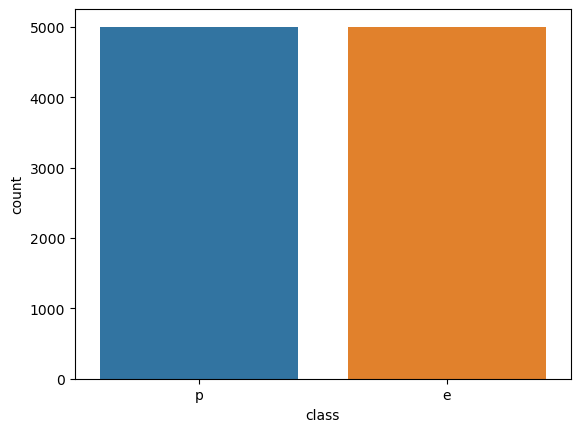

In [8]:
sns.countplot(x='class',data=train)

In [11]:
# donut plot visualization of target class : e - edible , p - poisonous
fig = go.Figure(data=[go.Pie(labels=['Poisonous','Edible'], values=classes.values,hole = .4,marker = dict(colors = ['red','green']))])
fig.update_layout(title_text='Classes of Mushroom')
fig.show()

In [12]:
class_counts = train["class"].value_counts(normalize=True)
class_counts

class
p    0.5
e    0.5
Name: proportion, dtype: float64

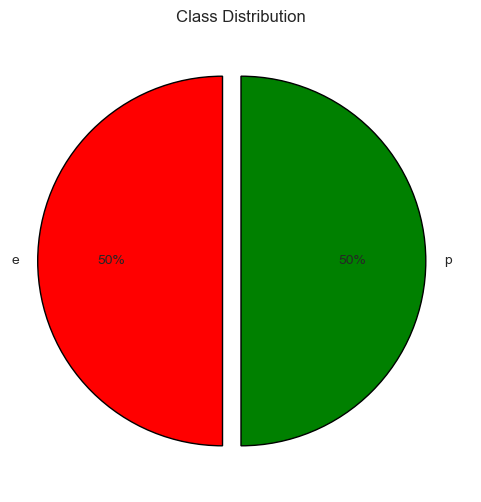

In [190]:
plt.figure(figsize=(6, 6))
plt.pie(class_counts, 
        labels=class_counts.index, 
        autopct='%1.0f%%', 
        colors=['red','green'], 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'},
        explode=(0.1, 0))
plt.title('Class Distribution');

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Correlation Matrics</p>

In [13]:
object_columns = train.select_dtypes(include=['object'])

In [14]:
matrix = train.copy()
for i in object_columns:
    matrix[i]  = matrix[i].rank(method='dense')

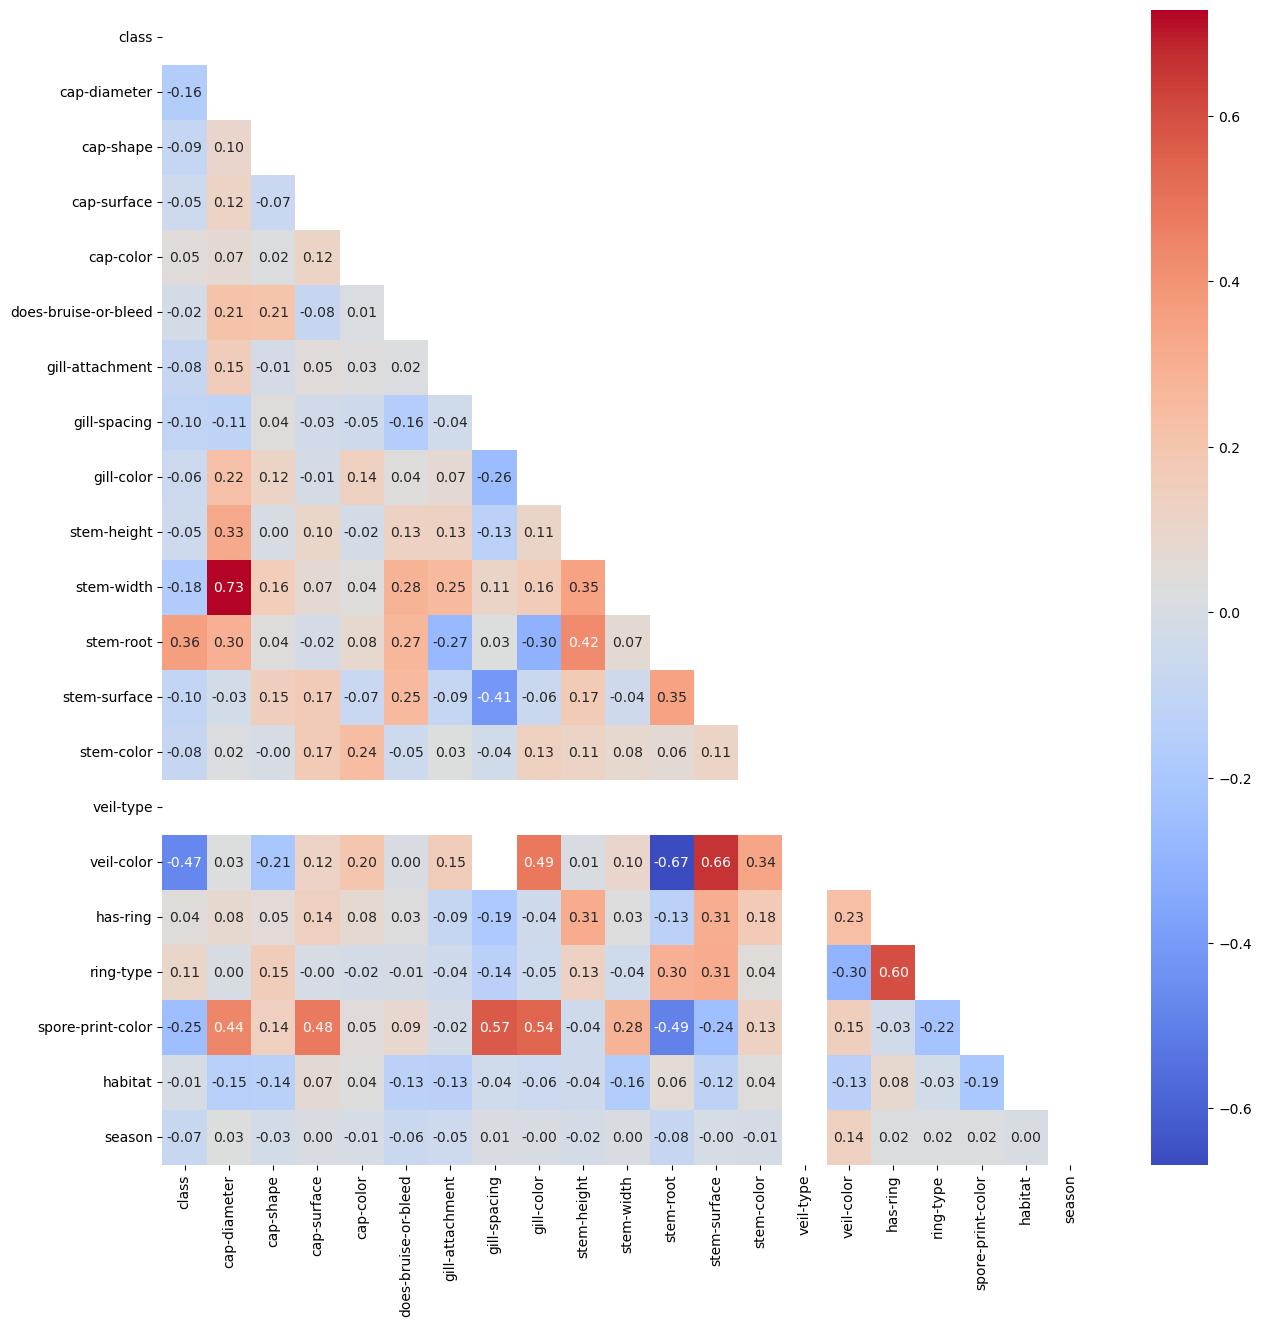

In [15]:
cor_mat = matrix.corr(method="pearson")
mask = np.triu(np.ones_like(cor_mat))

plt.figure(figsize=(15, 15))
sns.heatmap(cor_mat, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.show()

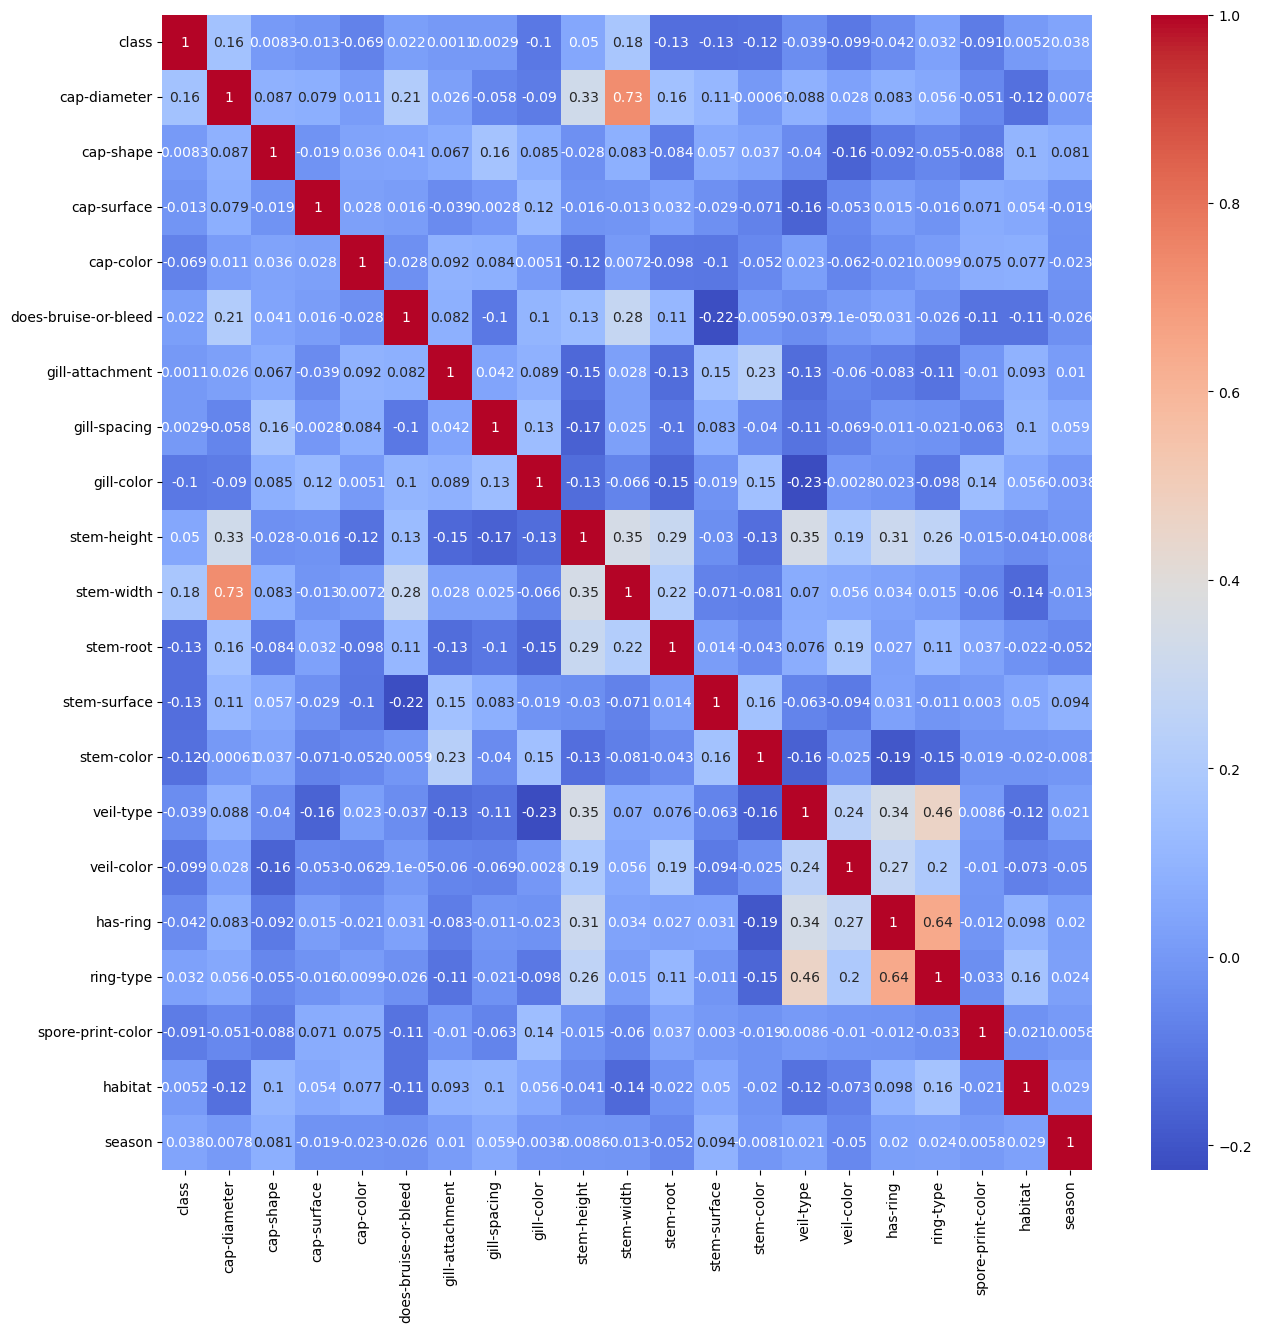

In [16]:
matrix = train.copy()
plt.figure(figsize=(15,15))
temp= matrix
# temp=train.drop('id',axis=1)
temp=temp.apply(lambda x : pd.factorize(x)[0] if x.dtype=='object'else x)
sns.heatmap(temp.corr(),annot=True,cmap='coolwarm')
plt.show()

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Pairplot</p>

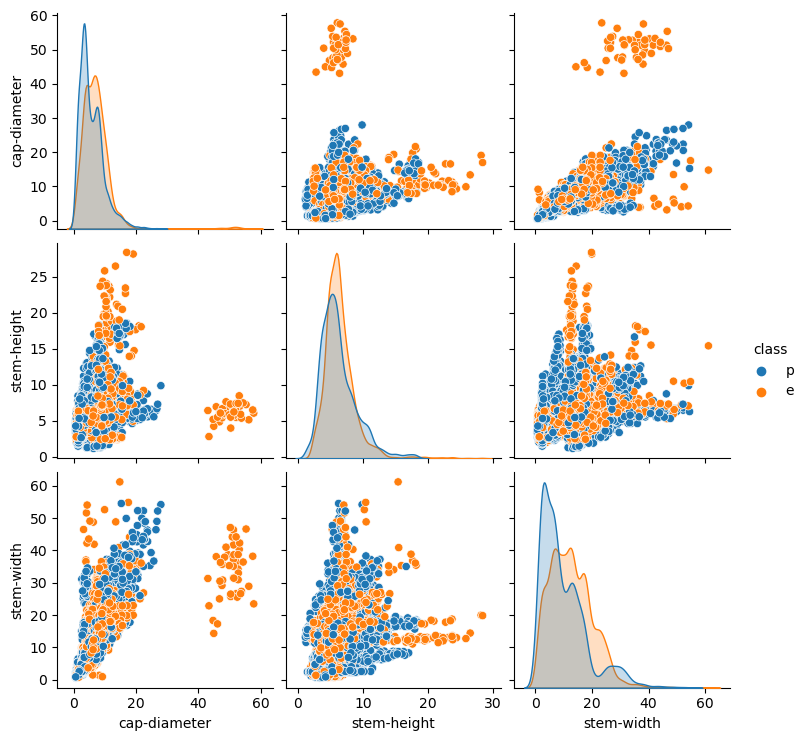

In [326]:
sns.pairplot(train, hue='class')

pairplot for categorical

In [315]:
# object_columns = train.select_dtypes(include=['object'])

In [316]:
# matrix = train.copy()
# for i in object_columns:
#     matrix[i]  = matrix[i].rank(method='dense')

In [318]:
# sns.pairplot(matrix, hue='class')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000015312333C40> (for post_execute):


KeyboardInterrupt: 

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Data Pre-processing</p>

#### <p style="background-color: #fdefff;color:#c12eff;display: inline-block;padding:.6rem;border-radius:.5rem">Separate features and target</p>

In [21]:
df_train = train.iloc[: , 1:]
# df_train = train.iloc[: , :-1]

In [65]:
y = train['class']
# y = train.iloc[: , 0:1]

X = train.drop(columns=['class'])
# X = train.drop('class', axis=1).copy()
# X = train_df.iloc[: , 1:]

#### <p style="background-color: #fdefff;color:#c12eff;display: inline-block;padding:.6rem;border-radius:.5rem">Transform target object into decimal values 0 or 1 (e,p)</p>

In [186]:
from sklearn.preprocessing import LabelEncoder
# encode the target calss into numeric
label_encoder = LabelEncoder()
y =label_encoder.fit_transform(y)
# train['class'] =label.fit_transform(train['class'])
y = y.astype('int8')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B1.Missing Values</p>

In [26]:
X.isnull().sum().sort_values(ascending=False)

veil-type               9502
spore-print-color       9165
stem-root               8825
veil-color              8766
stem-surface            6383
gill-spacing            4139
cap-surface             2133
gill-attachment         1658
ring-type                418
cap-color                  1
habitat                    0
has-ring                   0
cap-diameter               0
stem-color                 0
cap-shape                  0
stem-width                 0
stem-height                0
gill-color                 0
does-bruise-or-bleed       0
season                     0
dtype: int64

In [27]:
def null_percent(df):
    per=((df.isnull().sum()/len(df))*100).round(5)
    per.sort_values(ascending=False,inplace =True)
    return per
print("Nan Values in Train data")
print(null_percent(X))
# print("Nan Values in Test data")
# print(null_percent(test))

Nan Values in Train data
veil-type               95.02
spore-print-color       91.65
stem-root               88.25
veil-color              87.66
stem-surface            63.83
gill-spacing            41.39
cap-surface             21.33
gill-attachment         16.58
ring-type                4.18
cap-color                0.01
habitat                  0.00
has-ring                 0.00
cap-diameter             0.00
stem-color               0.00
cap-shape                0.00
stem-width               0.00
stem-height              0.00
gill-color               0.00
does-bruise-or-bleed     0.00
season                   0.00
dtype: float64


In [28]:
Missing = null_percent(X)
print("High missing columns in Train data")
High_missing_columns = Missing[Missing>60]
High_missing_columns.reset_index()
High_missing_columns

High missing columns in Train data


veil-type            95.02
spore-print-color    91.65
stem-root            88.25
veil-color           87.66
stem-surface         63.83
dtype: float64

In [30]:
# standardizing the Missing Data with null values to make it easier to handle
X = X.fillna(np.nan)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B2.Remove Duplicates and Unnecessary Columns</p>

In [31]:
print("There are {} duplicates in train dataset.".format(X.duplicated().sum()))

There are 0 duplicates in train dataset.


In [32]:
# columns with the missing values more than 85% of Data
colums_to_drop = X.columns[Missing>95]
X = X.drop(columns = colums_to_drop)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B3.Filling Nulls</p>

In [67]:
categorical_cols = X.select_dtypes(include=['object', 'category'])
numerical_cols = X.select_dtypes(exclude=['object', 'category'])

def fill_empty_categorical(df):
    for i in categorical_cols:
        df[i].fillna(df[i].mode()[0], inplace=True)
    return df

def fill_empty_numerical(df):
    for i in numerical_cols:
        df[i].fillna(df[i].median(), inplace=True)  
    return df

X = fill_empty_categorical(X)
X = fill_empty_numerical(X)

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2074674 to 1747205
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          10000 non-null  float64
 1   cap-shape             10000 non-null  object 
 2   cap-surface           10000 non-null  object 
 3   cap-color             10000 non-null  object 
 4   does-bruise-or-bleed  10000 non-null  object 
 5   gill-attachment       10000 non-null  object 
 6   gill-spacing          10000 non-null  object 
 7   gill-color            10000 non-null  object 
 8   stem-height           10000 non-null  float64
 9   stem-width            10000 non-null  float64
 10  stem-root             10000 non-null  object 
 11  stem-surface          10000 non-null  object 
 12  stem-color            10000 non-null  object 
 13  veil-type             10000 non-null  object 
 14  veil-color            10000 non-null  object 
 15  has-ring        

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B4.Aggregate Categorical and Numerical</p>

In [69]:
to_boolen = [i for i in X.columns if 
             X[i].nunique() < 3 and
             (X[i].dtype =='object'or
              X[i].dtype =='int64' or
              X[i].dtype =='float64')
            ]

object_to_categorical = [i for i in X.columns if
                         X[i].nunique() >=3 and
                         X[i].dtype =='object']

numerical_int = X.select_dtypes(include=['int64'])

numerical_float = X.select_dtypes(include=['float64'])


categorical_dummies = [i for i in X.columns if
                       X[i].nunique() >=3 and
                       X[i].nunique() <11 and
                       X[i].dtype =='object']

In [70]:
to_boolen

['does-bruise-or-bleed', 'veil-type', 'has-ring']

In [71]:
object_to_categorical

['cap-shape',
 'cap-surface',
 'cap-color',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B5.Convert Types (Downcasting)</p>

In [39]:
print(f'{X.memory_usage().sum()/(1000000)} MB')

1.6 MB


In [72]:
def convert_types (df):
    for i in to_boolen:
         df[i] = df[i].astype('bool')
    for i in object_to_categorical:
         df[i] = df[i].astype('category')
    for i in numerical_int:
         df[i] = df[i].astype('int32')  
    for i in numerical_float:
         df[i] = df[i].astype('float32') 
    return df
X = convert_types(X)

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2074674 to 1747205
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   cap-diameter          10000 non-null  float32 
 1   cap-shape             10000 non-null  category
 2   cap-surface           10000 non-null  category
 3   cap-color             10000 non-null  category
 4   does-bruise-or-bleed  10000 non-null  bool    
 5   gill-attachment       10000 non-null  category
 6   gill-spacing          10000 non-null  category
 7   gill-color            10000 non-null  category
 8   stem-height           10000 non-null  float32 
 9   stem-width            10000 non-null  float32 
 10  stem-root             10000 non-null  category
 11  stem-surface          10000 non-null  category
 12  stem-color            10000 non-null  category
 13  veil-type             10000 non-null  bool    
 14  veil-color            10000 non-null  category
 15 

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B6.Feature Distribution</p>

<p style="background-color: #EDE7F6; color: black; display:inline-block;padding:.6rem;border-radius:.25rem;">B6.1.Numerical Features</p>

In [43]:
yy=train['class'].copy()

In [74]:
yy=pd.DataFrame(yy)
yy

0
0     0
1     0
2     1
3     1
4     1
...  ..
9995  1
9996  1
9997  0
9998  1
9999  0

[10000 rows x 1 columns]

In [45]:
# numerical_features = X.select_dtypes(include=['int32','int64','float32','float64'])
numerical_features = X.select_dtypes(include=['number'])
numerical_features

stem-height  stem-width
id                              
1109558     6.180000   16.990000
1663177     3.900000    2.830000
1988079     7.720000   21.410000
1096698    16.469999   16.700001
876683      3.640000   12.200000
...              ...         ...
2217407    10.070000   17.059999
2697947     4.150000    6.550000
673758      4.840000    3.580000
2509235     6.060000   11.330000
1066716     3.380000    7.850000

[10000 rows x 2 columns]

In [46]:
XX = numerical_features.merge(yy, how='left', on='id')
XX

stem-height  stem-width class
id                                    
1109558     6.180000   16.990000     p
1663177     3.900000    2.830000     e
1988079     7.720000   21.410000     e
1096698    16.469999   16.700001     p
876683      3.640000   12.200000     p
...              ...         ...   ...
2217407    10.070000   17.059999     e
2697947     4.150000    6.550000     e
673758      4.840000    3.580000     p
2509235     6.060000   11.330000     e
1066716     3.380000    7.850000     e

[10000 rows x 3 columns]

KeyError: 'cap-diameter'

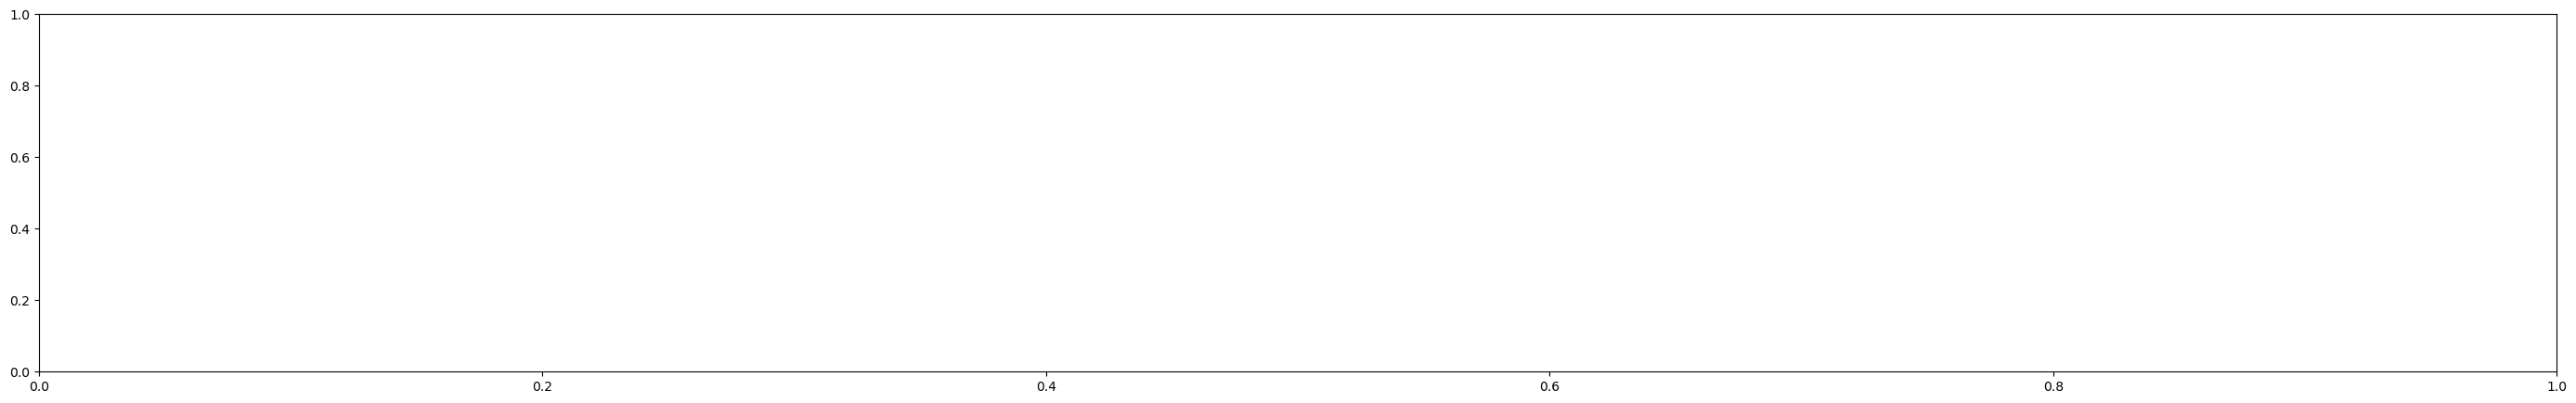

In [47]:
plt.figure(figsize = (35, 5))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = XX["cap-diameter"], y = XX["class"],
              palette = "tab20"
           );

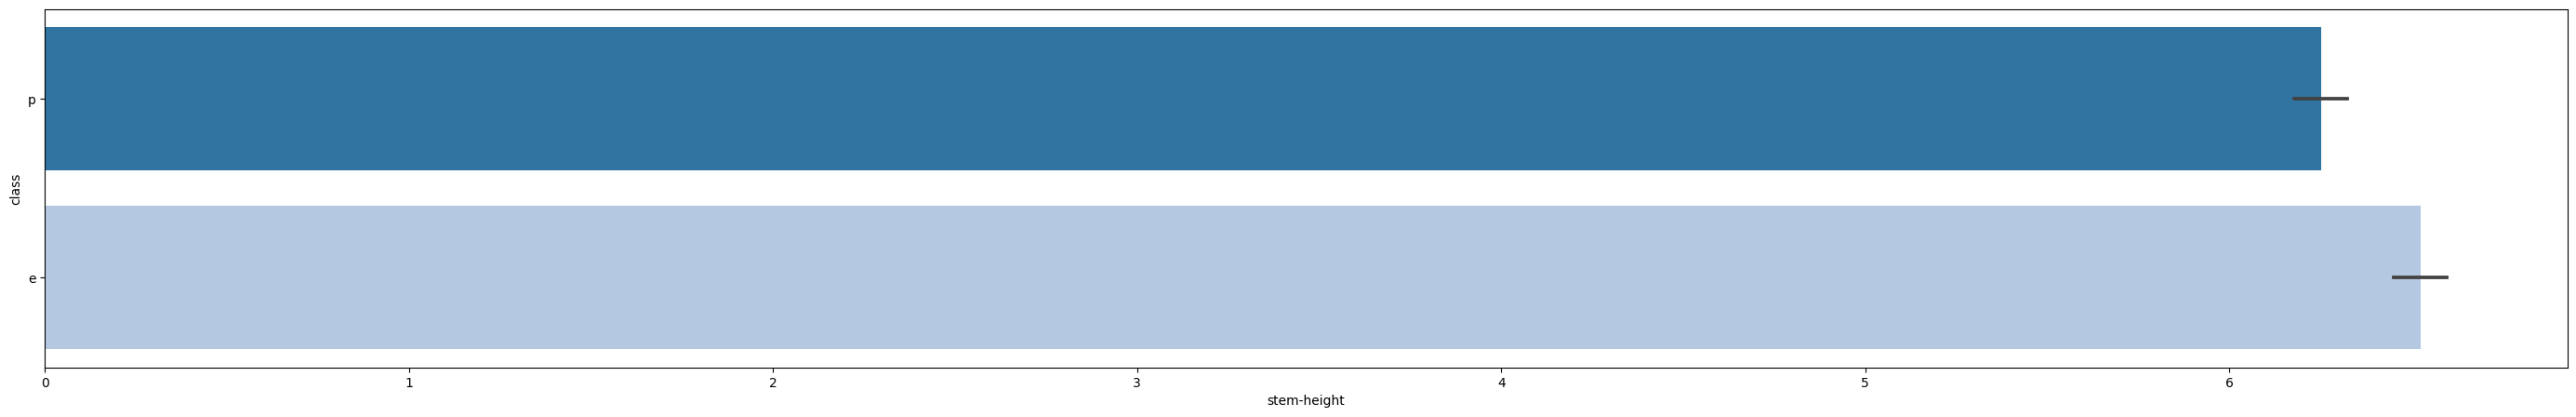

In [48]:
plt.figure(figsize = (35, 5))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = XX["stem-height"], y = XX["class"],
              palette = "tab20"
           );

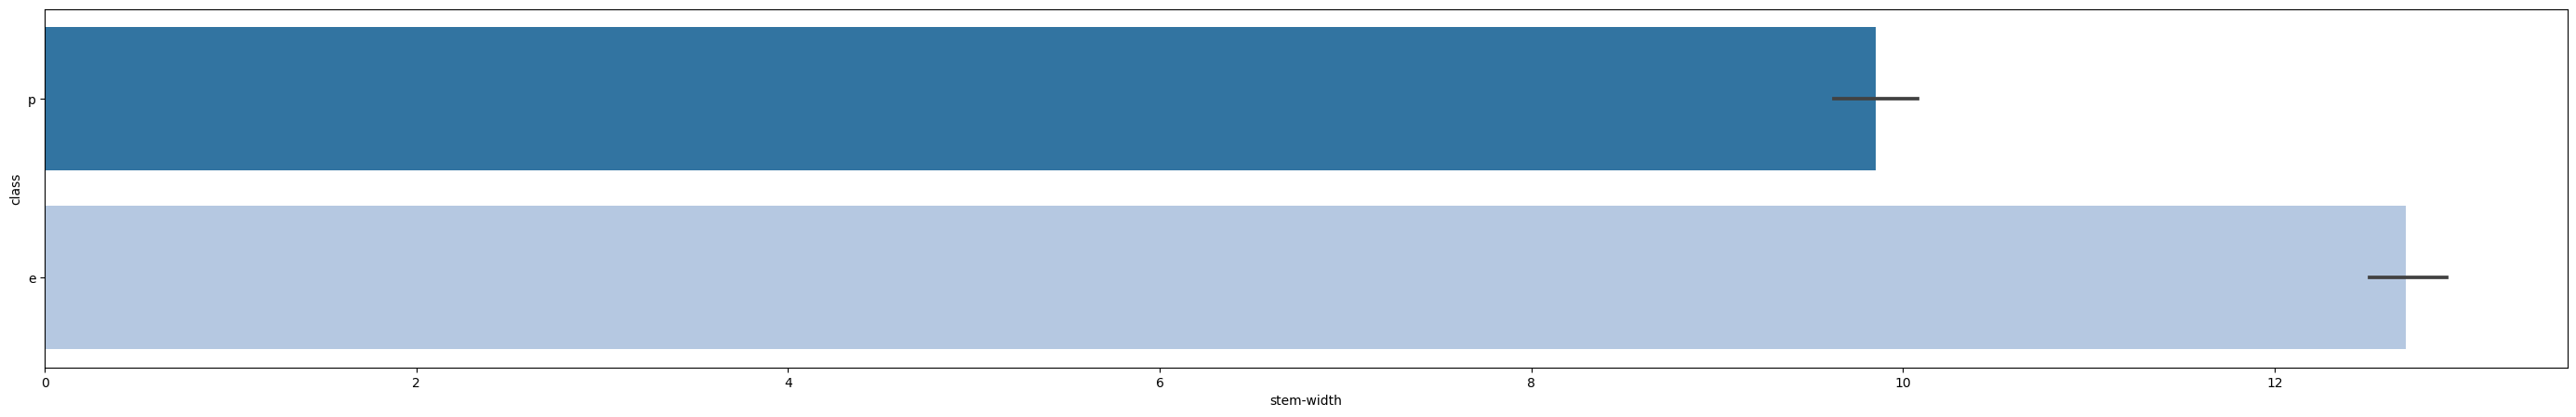

In [49]:
plt.figure(figsize = (35, 5))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = XX["stem-width"], y = XX["class"],
              palette = "tab20"
           );

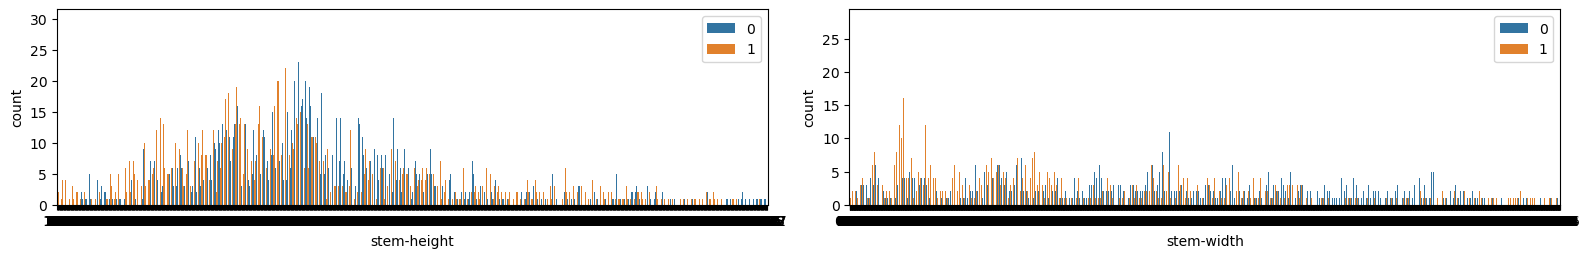

In [50]:
# background_color2 = '#FFFFFF'
# sns.set_style("whitegrid", {"axes.facecolor": background_color2})

plt.figure(figsize=(16, 20))
for i, col in enumerate(numerical_features):
    plt.subplot(8, 2, i+1) # ile wykresów na wysokości, ile na szerokości nrows, ncols, index
    sns.countplot(data=X, x=col,hue=y,
#                  palette='rainbow',
#                  order=X[col].value_counts().index
                 )
plt.tight_layout()
plt.show()

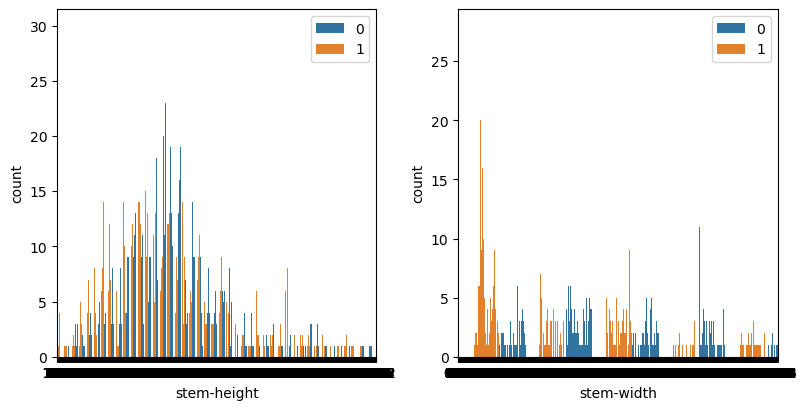

In [51]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 4, i+1)
    sns.countplot(data=X, x=col, hue=y)
plt.tight_layout()
plt.show()

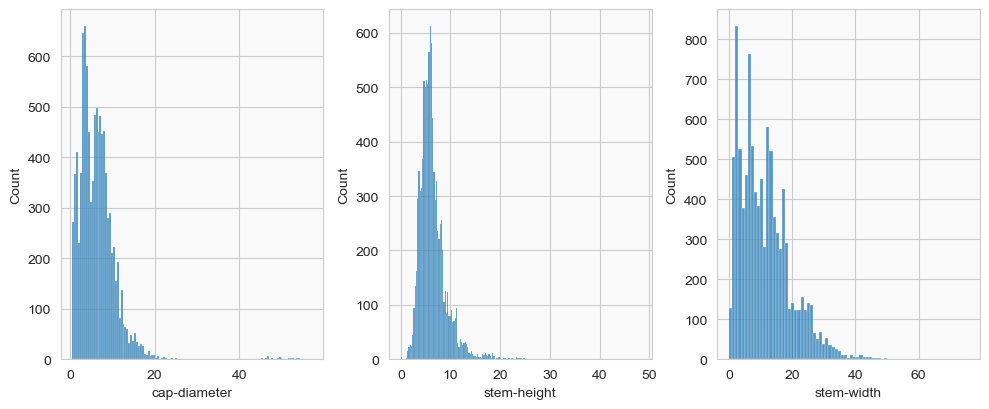

In [87]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=X, x=col, 
#                  hue=df['SalePrice']
                 palette='magma'
                )
plt.tight_layout()
plt.show()

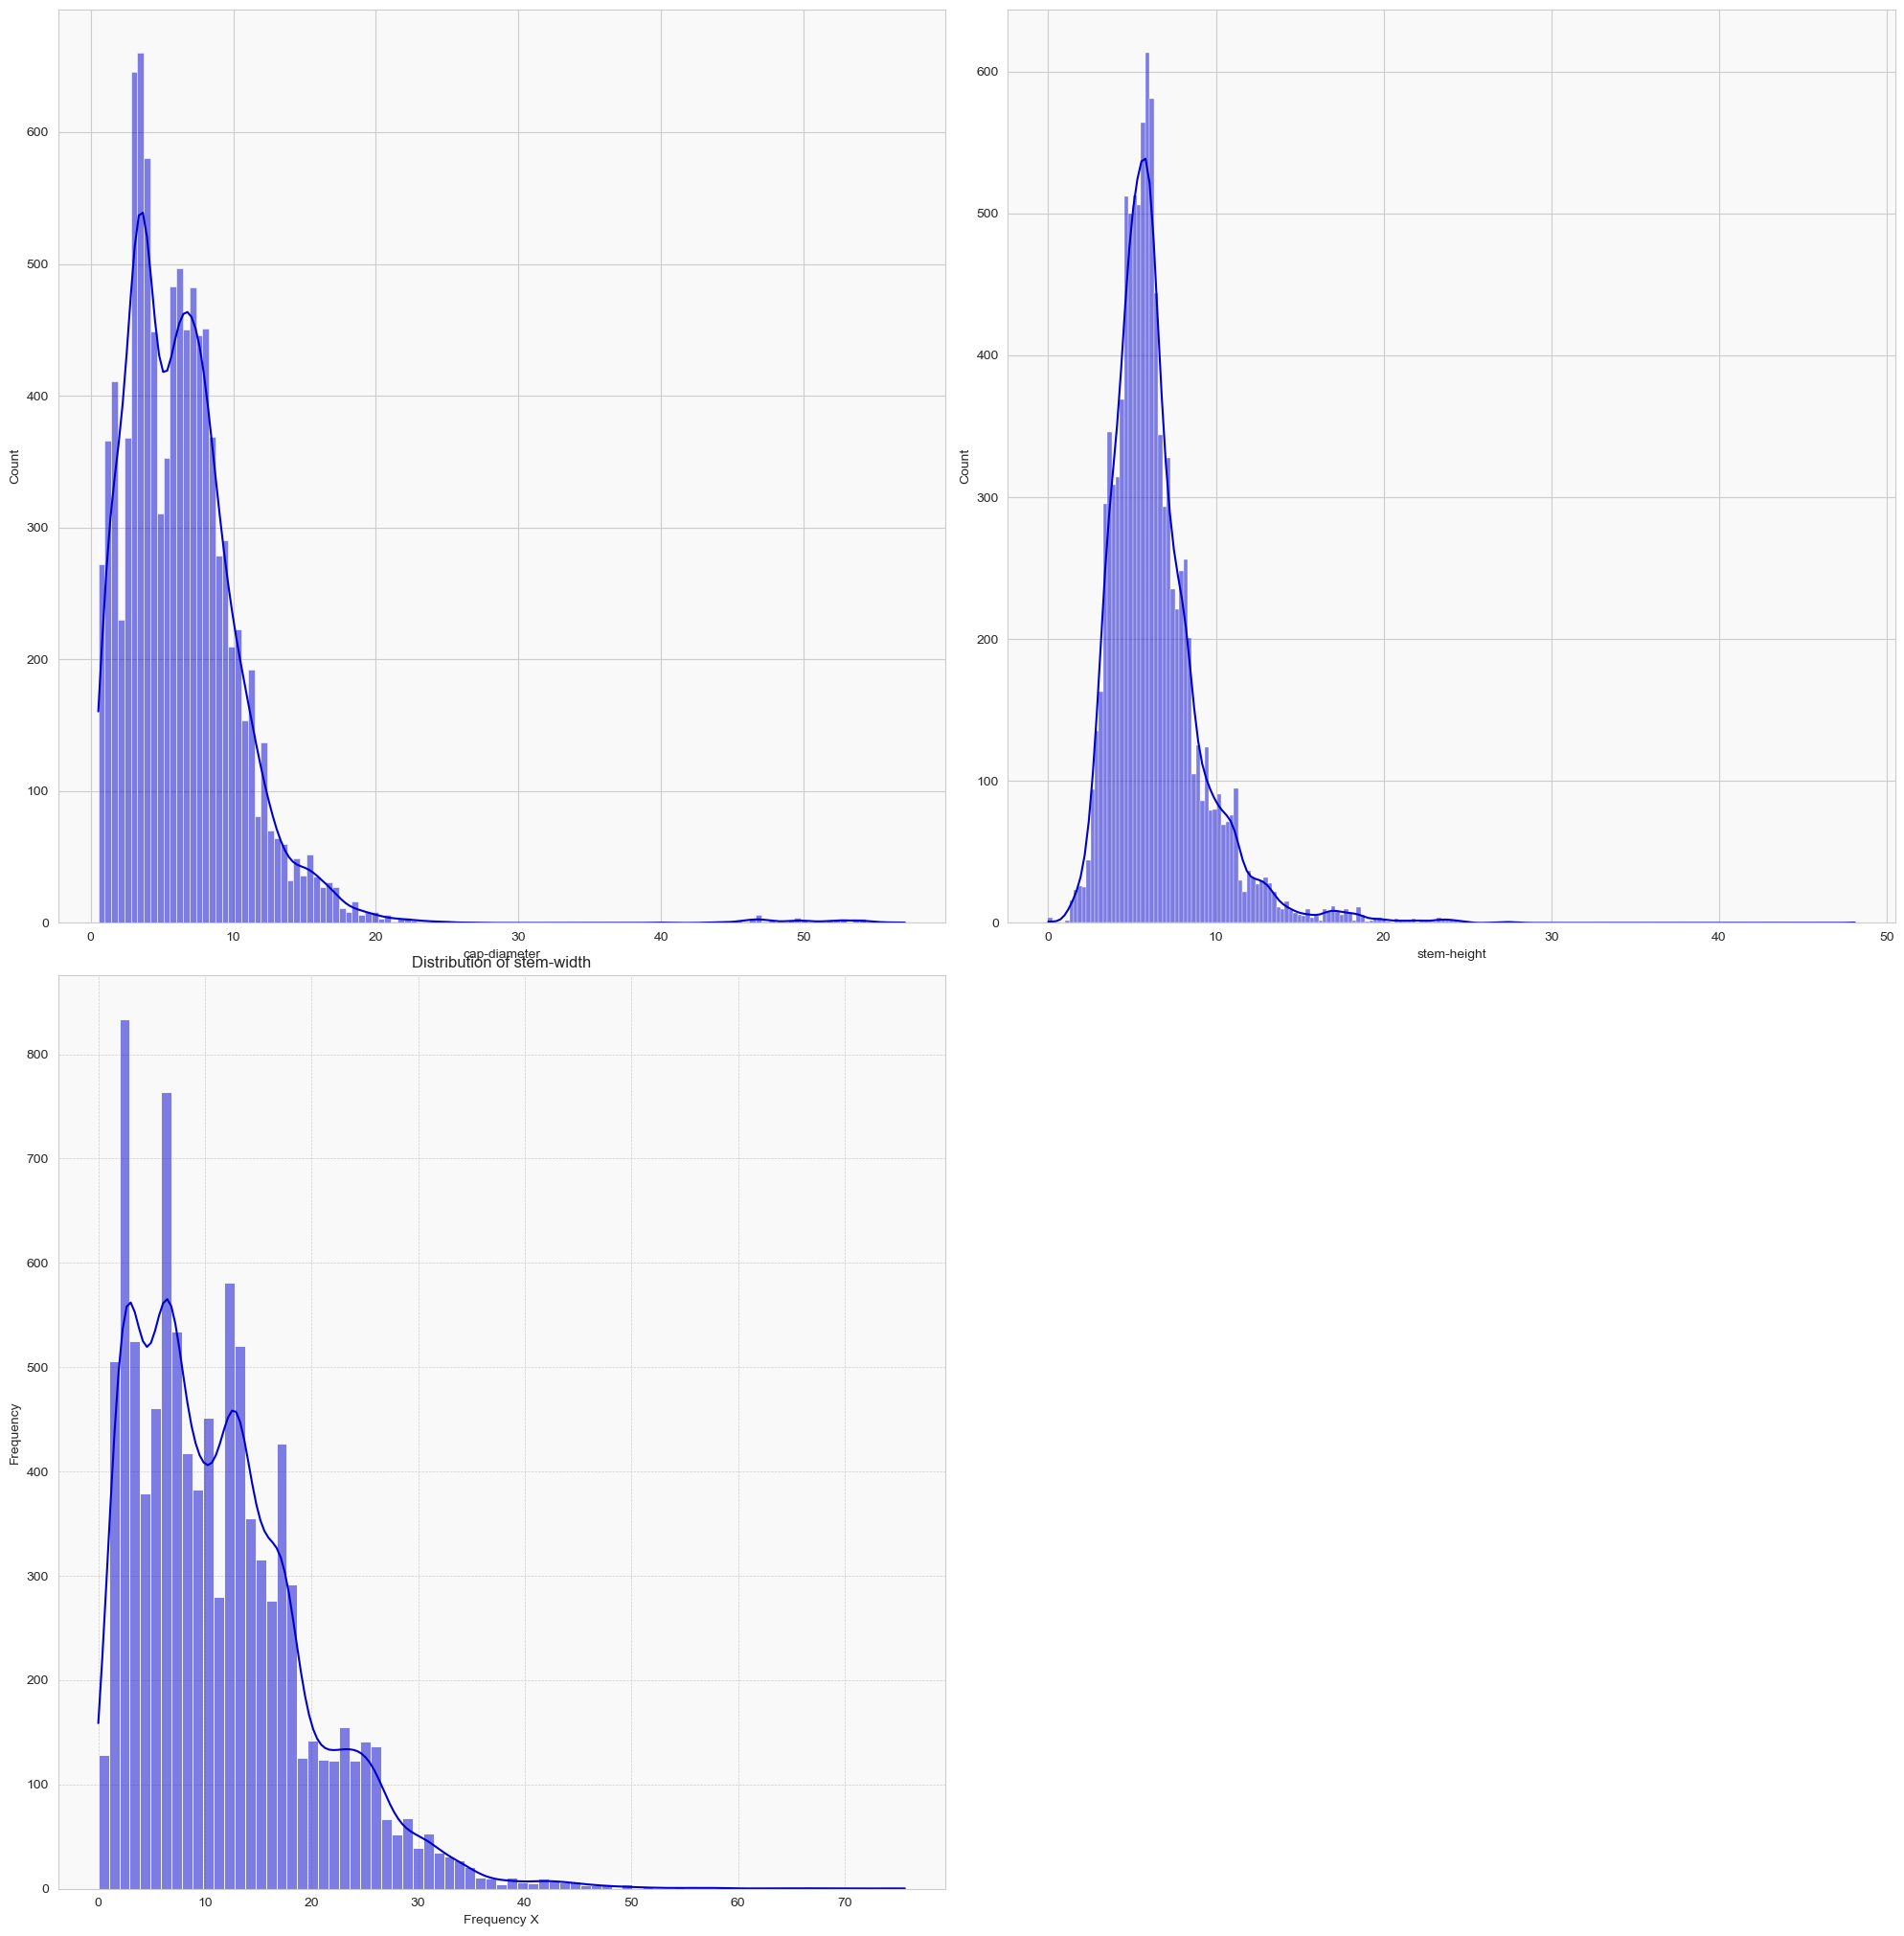

In [99]:
background_color = '#f9f9f9'
sns.set_style("whitegrid", {"axes.facecolor": background_color})

plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i+1) # ile wykresów na wysokości, ile na szerokości nrows, ncols, index
    sns.histplot(data=X, x=col,
                 kde=True,
                   color ='mediumblue',
#                      palette='magma', 
#                       edgecolor='black', 
#                      linewidth=1
                 )
plt.tight_layout()
plt.title(f"Distribution of {col}")
plt.xlabel('Frequency X')
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [117]:
numerical_features_DF = numerical_features.columns

In [118]:
len(numerical_features_DF)

3

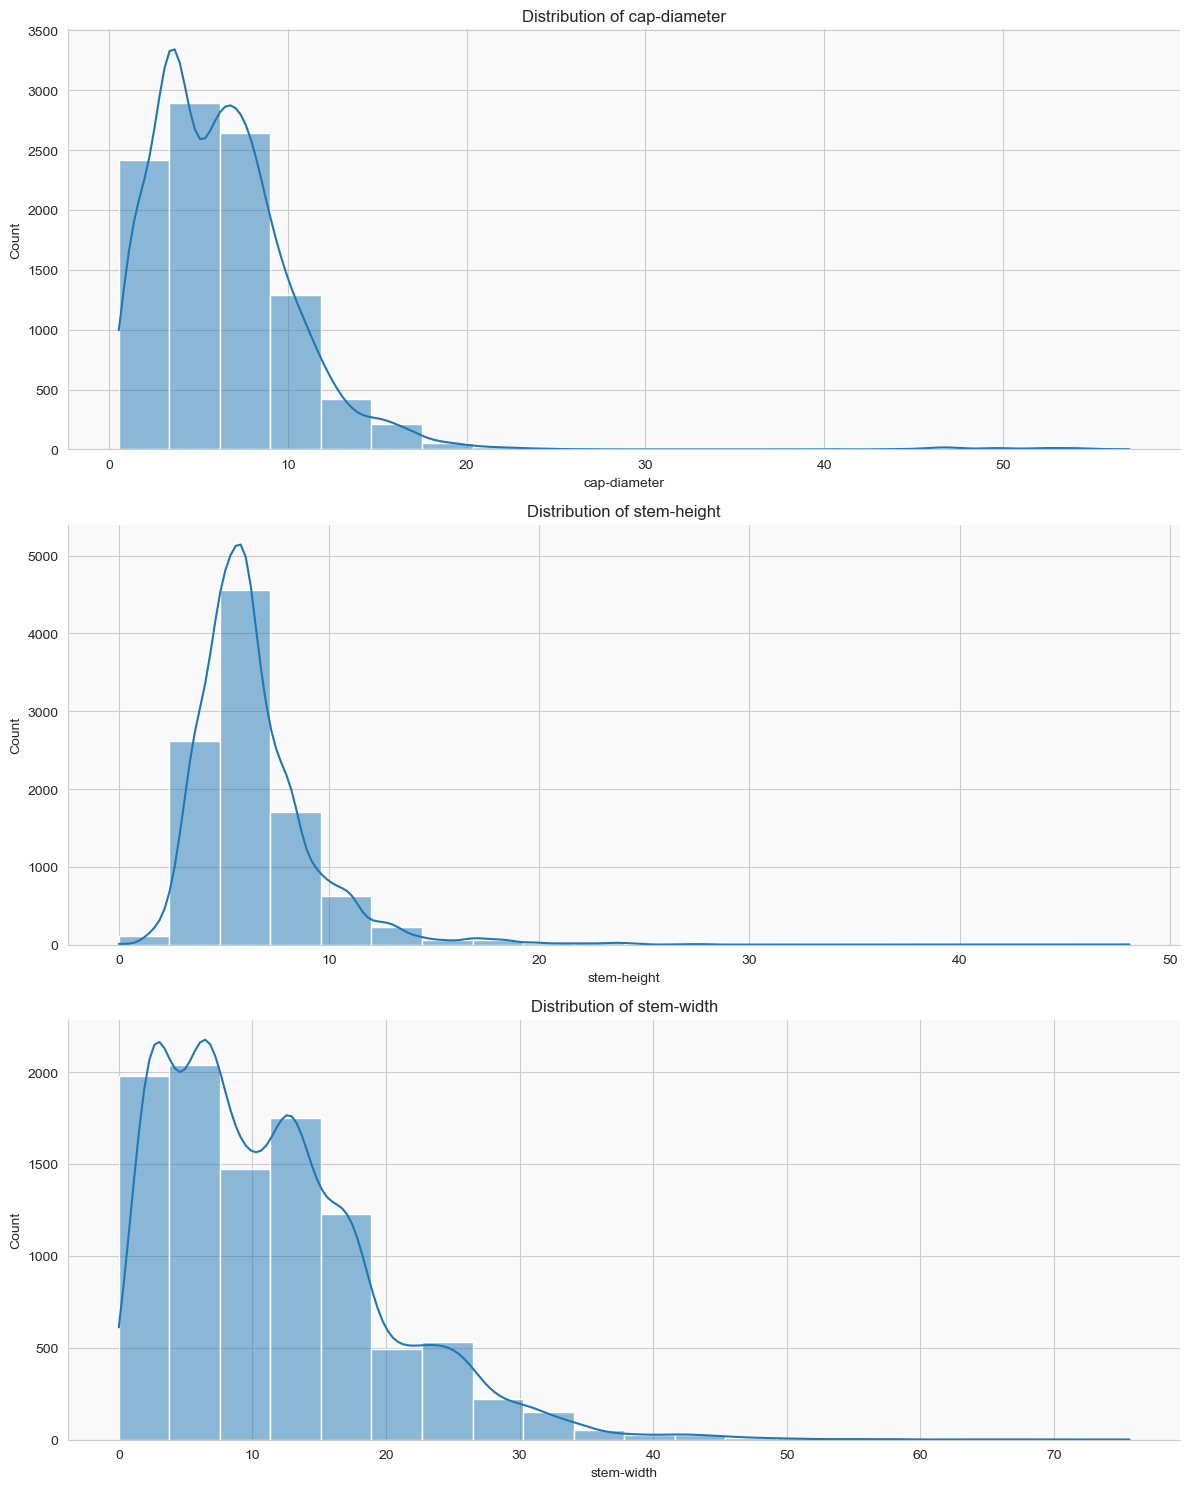

In [119]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(12, 15))  

for i, column in enumerate(numerical_features_DF, 1):
    plt.subplot(len(numerical_features_DF), 1, i)
    sns.histplot(data=X, x=column, kde=True, bins=20)
    sns.despine()
    plt.title(f'Distribution of {column}')


plt.tight_layout()  
plt.show()

In [121]:
XX

cap-diameter  stem-height  stem-width class
id                                                  
1104462          7.06        11.03       17.39     e
1939230         17.80         6.90       30.38     p
2105660          3.21         6.28        3.63     p
3076897          5.49         4.65        7.13     e
521465          54.34         4.07       27.36     e
...               ...          ...         ...   ...
724809           2.88         5.40        3.75     e
2682909          9.31         6.65       17.49     p
2796309          9.19         5.79       16.65     e
2290677          2.05         4.41        2.72     p
747356           5.14         5.35       12.50     e

[10000 rows x 4 columns]

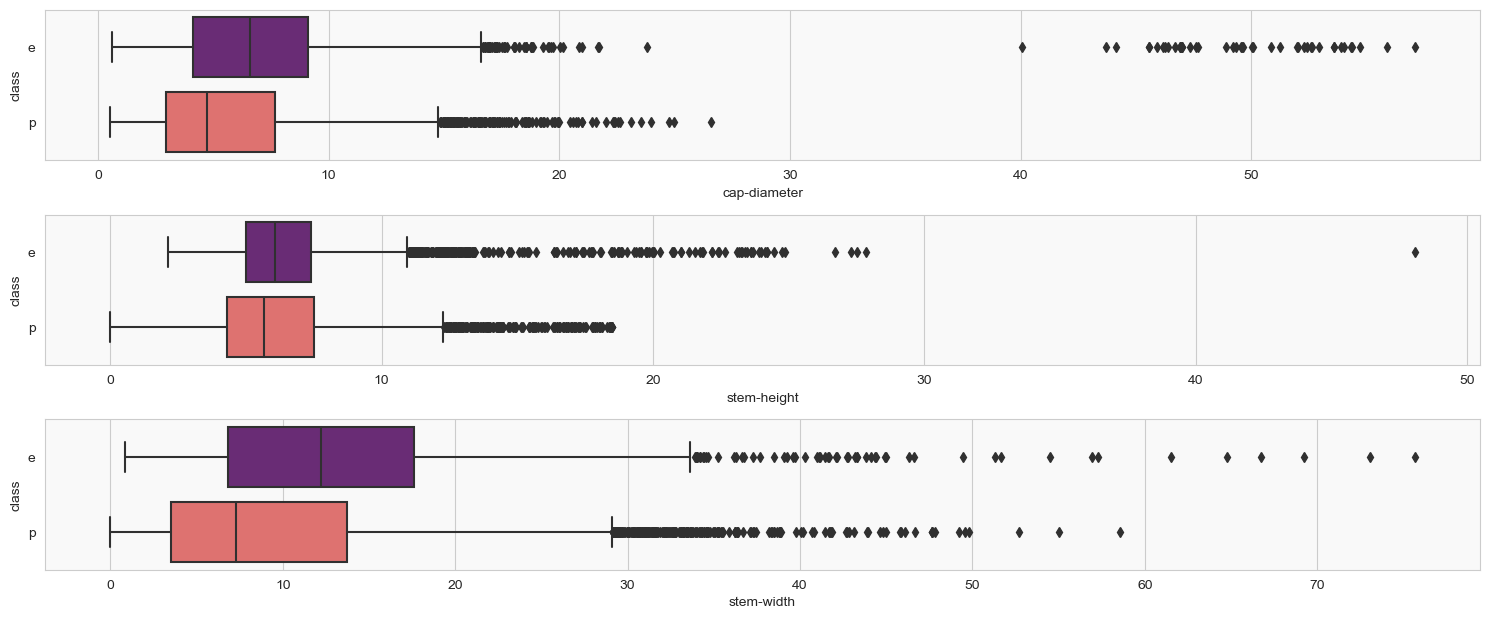

In [152]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_DF):
    plt.subplot(5, 1, i+1)
    sns.boxplot(data=XX, x=col, y=XX['class'],
                palette='magma'
               )
plt.tight_layout()
plt.show()

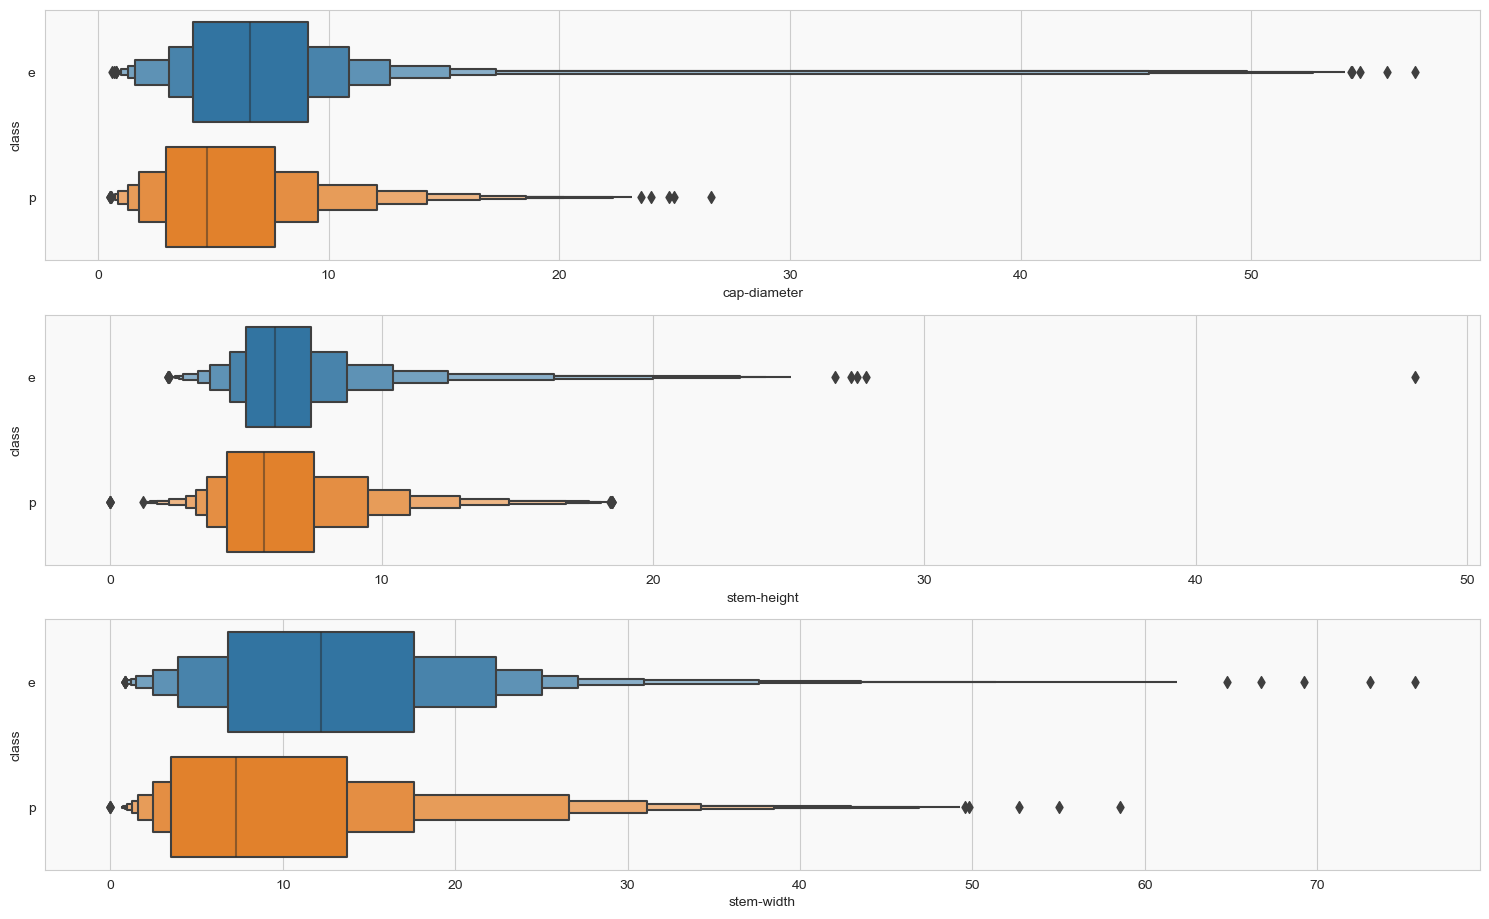

In [157]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_features_DF):
    plt.subplot(5, 1, i+1)
    sns.boxenplot(data=XX, x=col, y=XX['class'],
#                 palette='magma'
               )
plt.tight_layout()
plt.show()

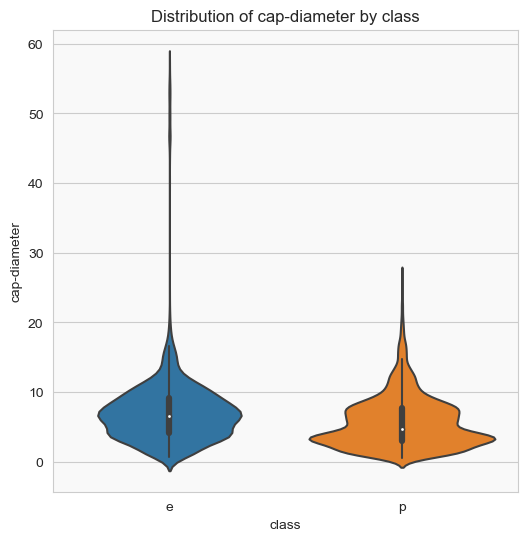

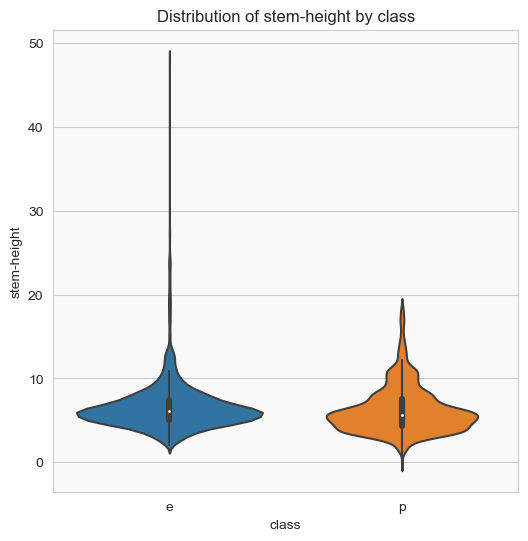

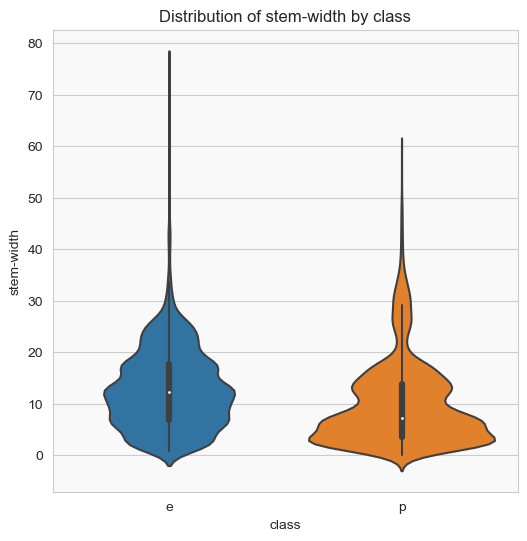

In [172]:
for column in numerical_features_DF:
    plt.figure(figsize=(6, 6))
    sns.violinplot(data=XX, x='class', y=column) 
    plt.title(f'Distribution of {column} by class')

    plt.show()

<p style="background-color: #EDE7F6; color: black; display:inline-block;padding:.6rem;border-radius:.25rem;">B6.2.Categorical Features</p>

In [52]:
categorical_features = X.select_dtypes(include=['category'])

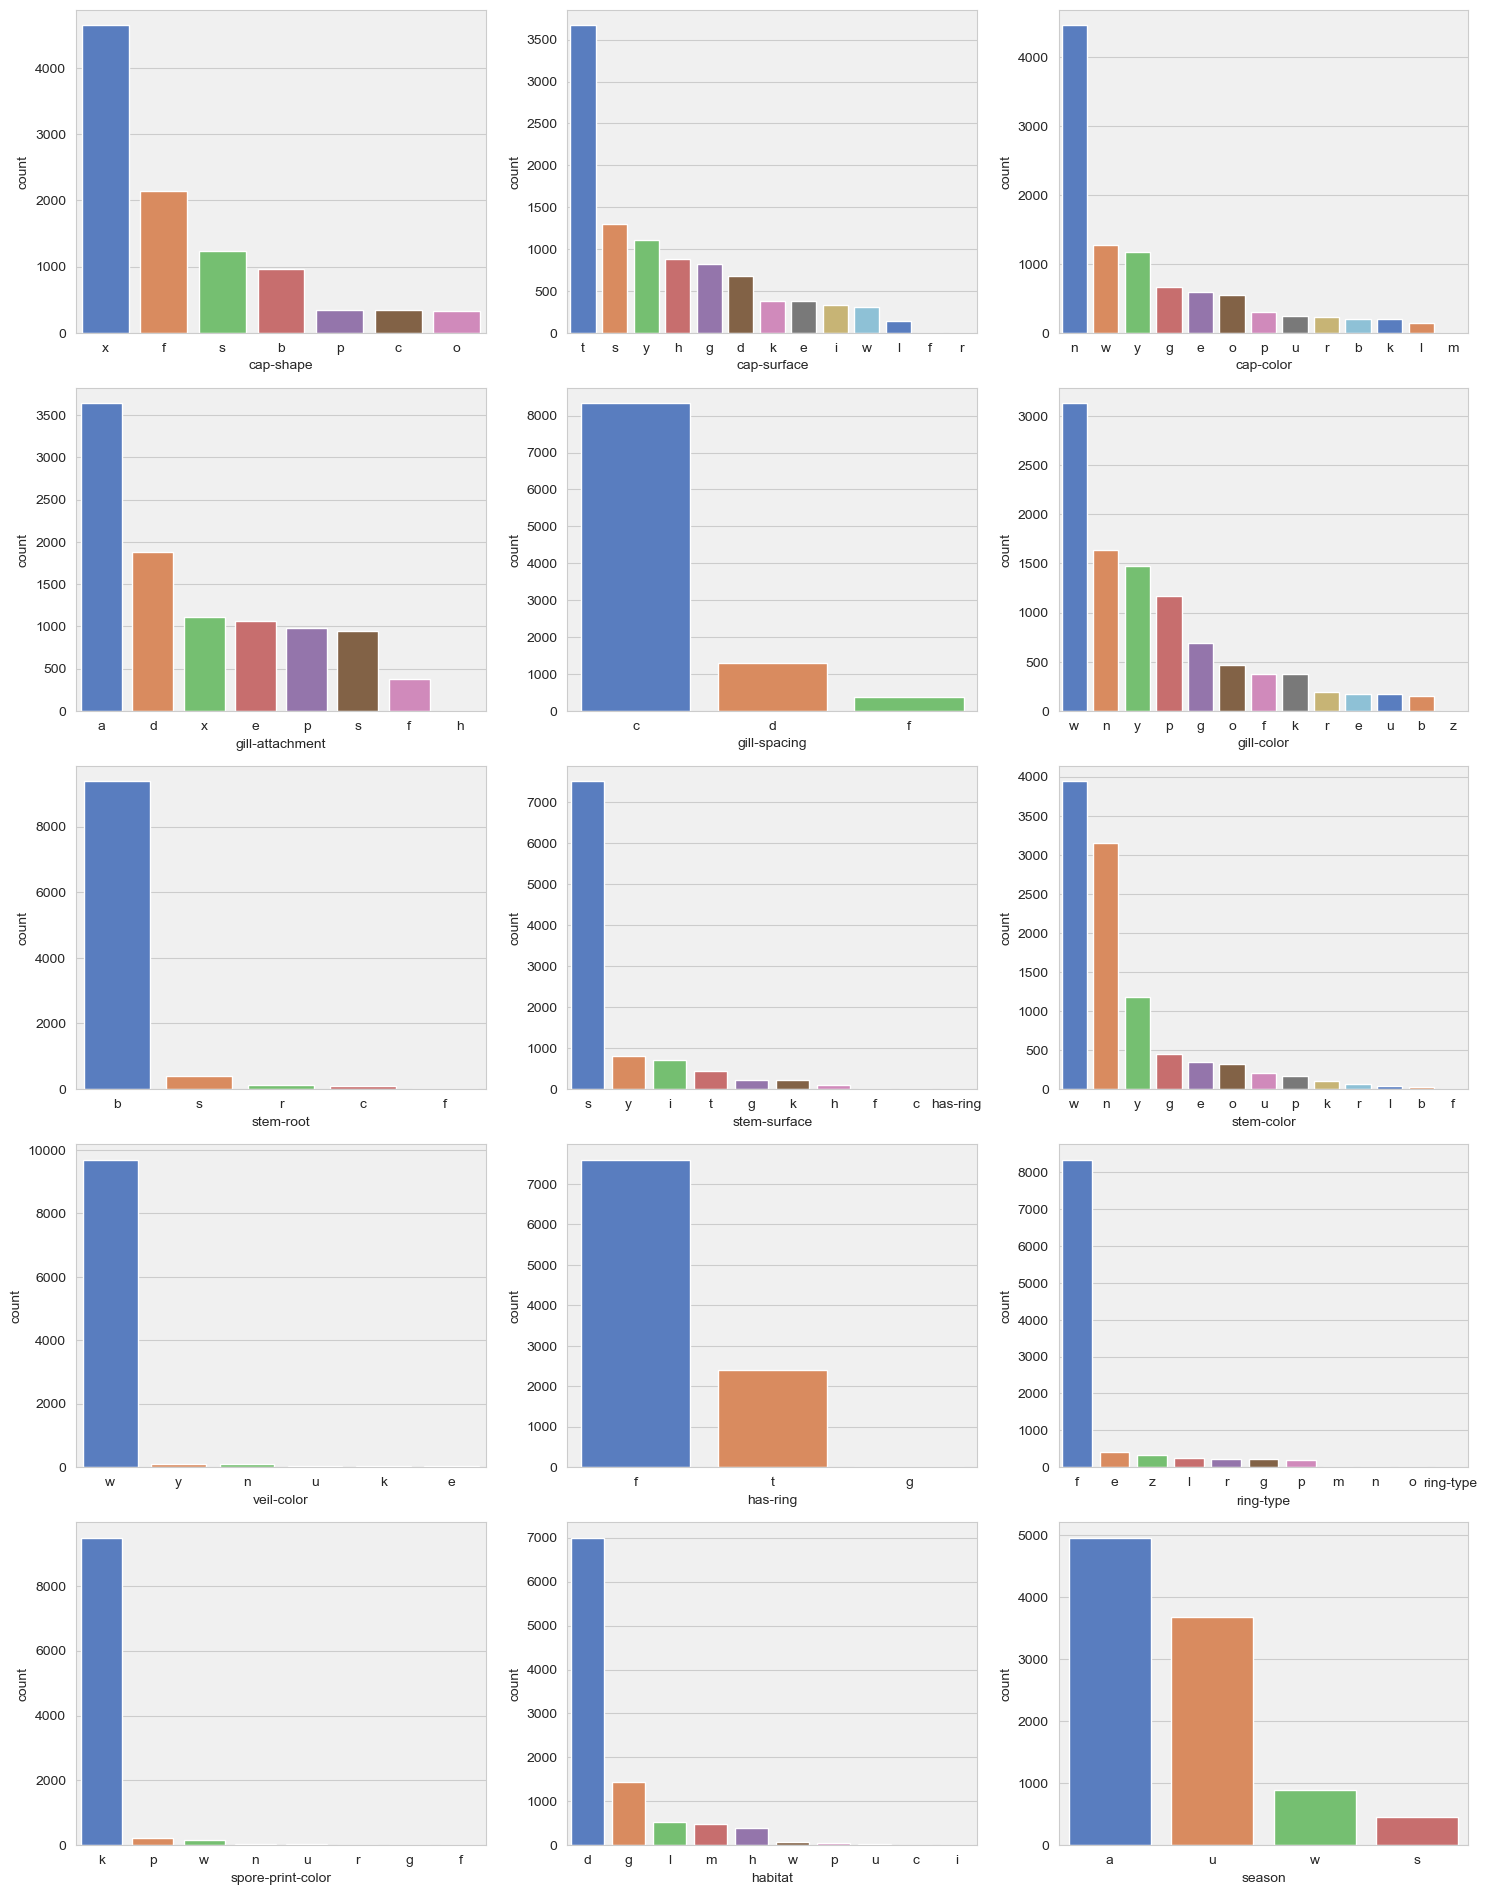

In [90]:
background_color = '#f0f0f0'
sns.set_style("whitegrid", {"axes.facecolor": background_color})

plt.figure(figsize=(15, 30))
for i, col in enumerate(categorical_features):
    plt.subplot(8, 3, i+1) # ile wykresów na wysokości, ile na szerokości nrows, ncols, index
    sns.countplot(data=X, x=col,
                  palette='muted',
#                   palette='magma',
#                  edgecolor='black', 
                 linewidth=1,
                 order=X[col].value_counts().index
                 )
plt.tight_layout()
plt.show()

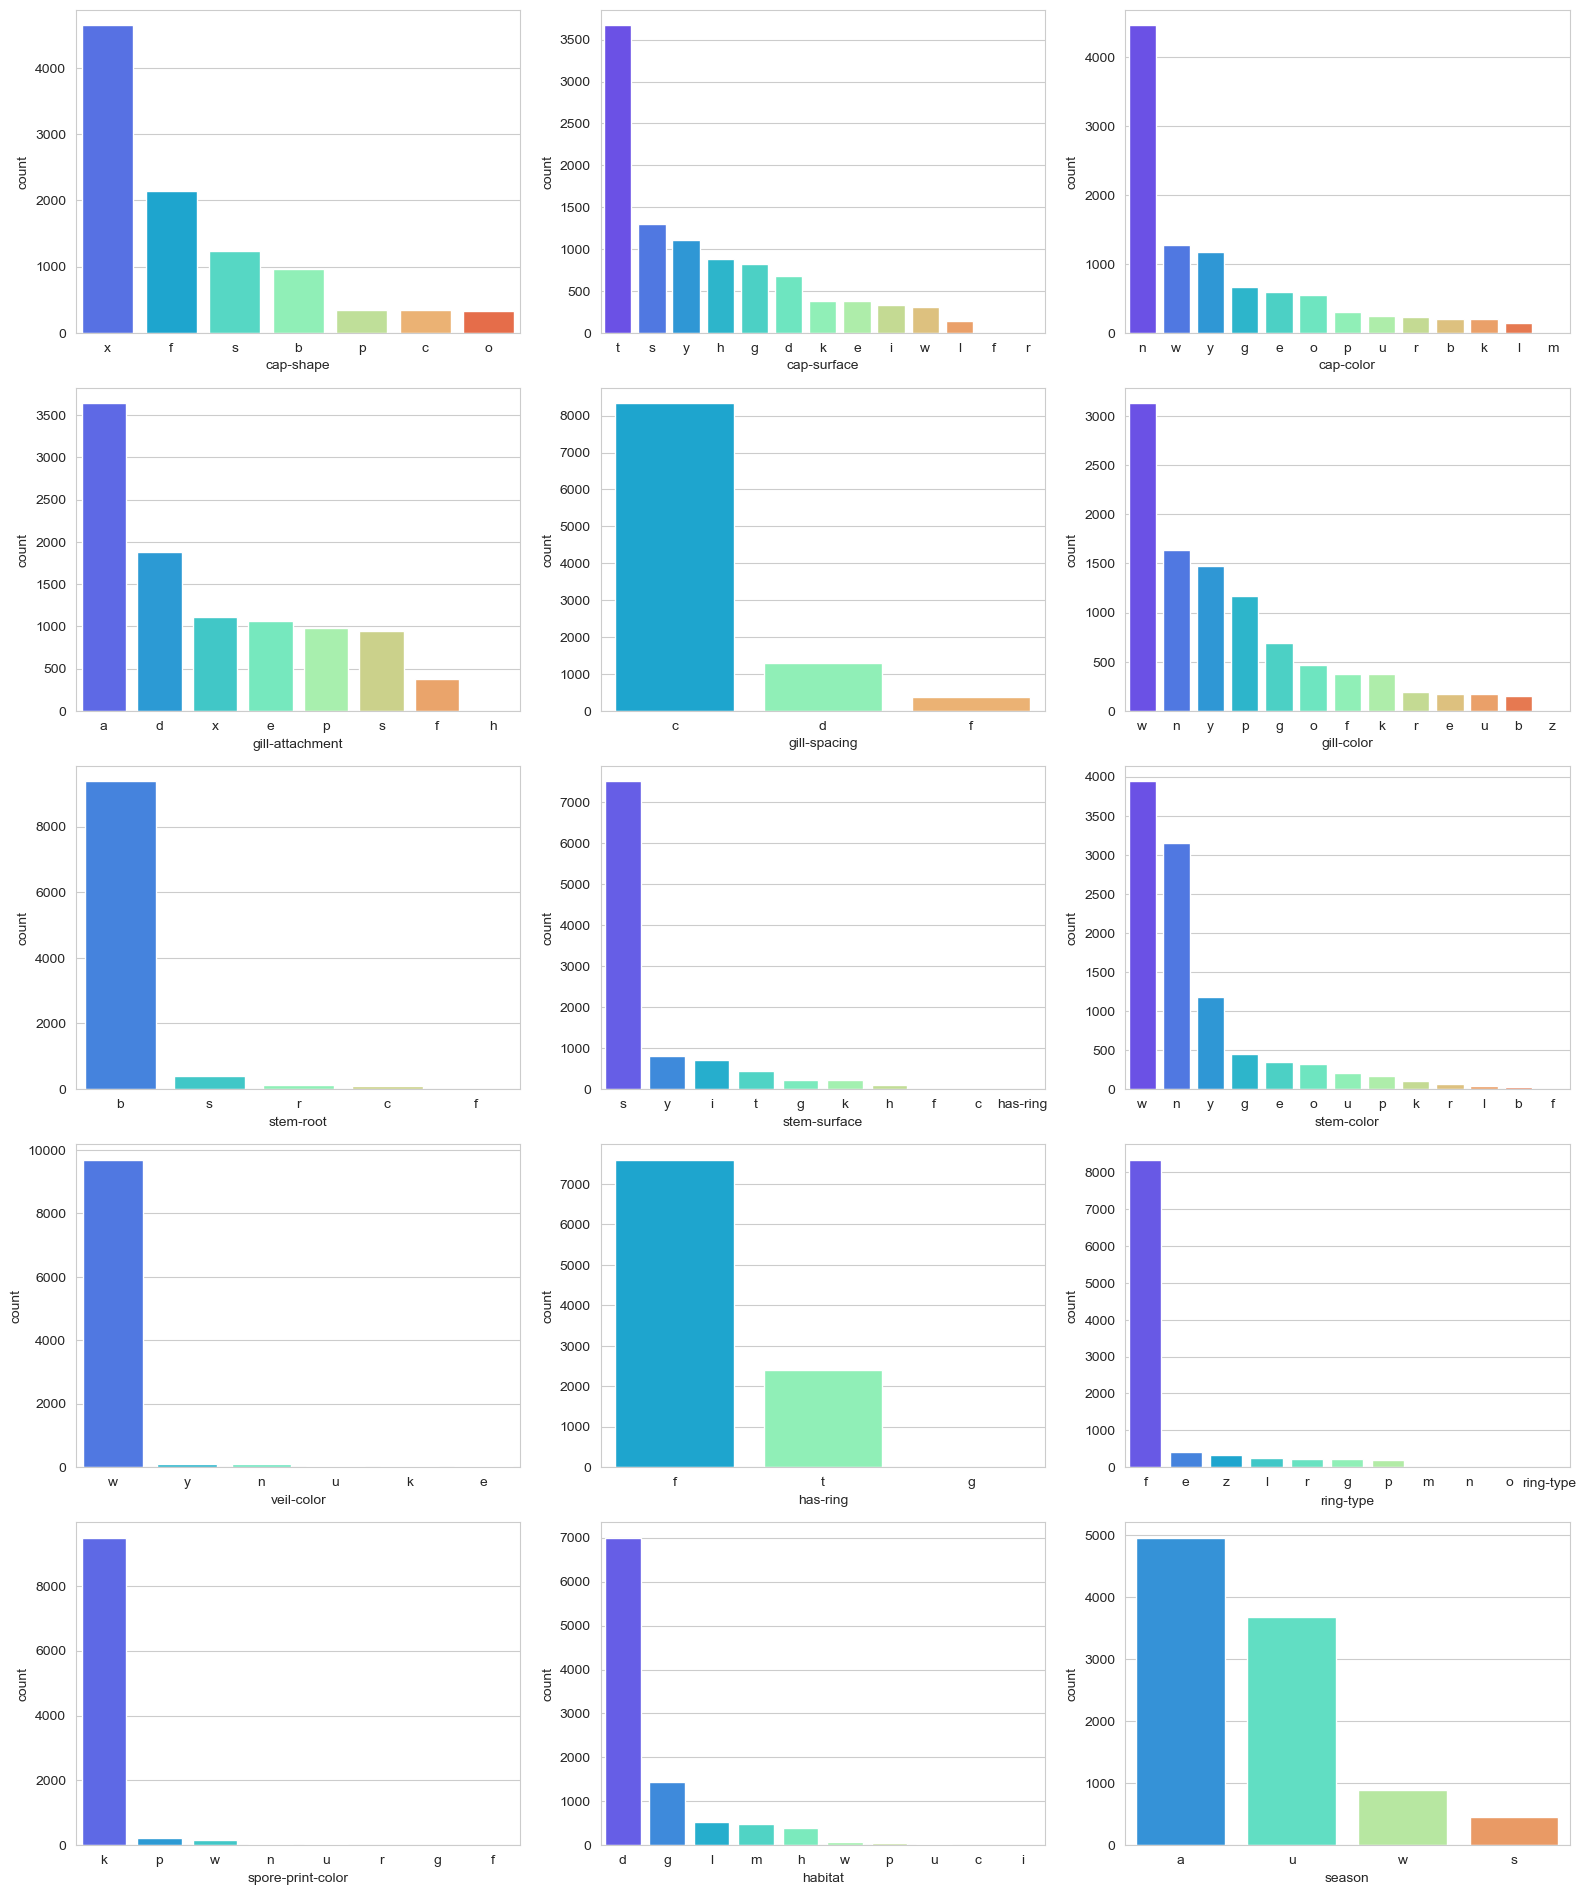

In [60]:
background_color2 = '#FFFFFF'
sns.set_style("whitegrid", {"axes.facecolor": background_color2})

plt.figure(figsize=(16, 30))
for i, col in enumerate(categorical_features):
    plt.subplot(8, 3, i+1) # ile wykresów na wysokości, ile na szerokości nrows, ncols, index
    sns.countplot(data=XXX, x=col,
                 palette='rainbow',
                 order=XXX[col].value_counts().index
                 )
plt.tight_layout()
plt.show()

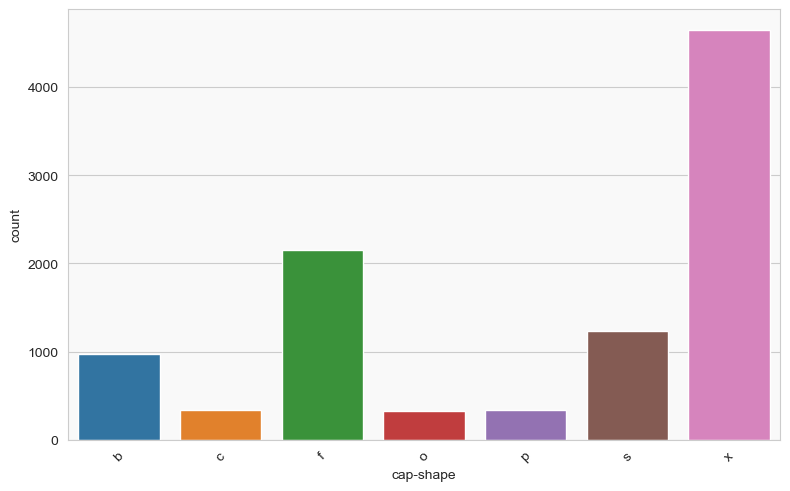

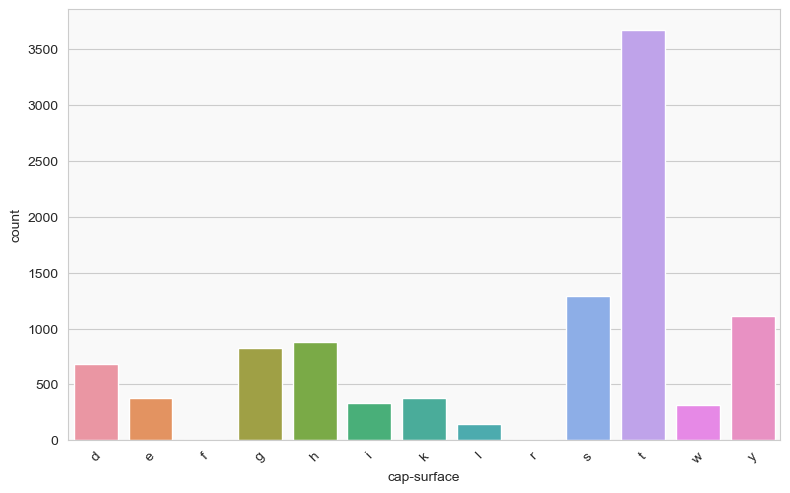

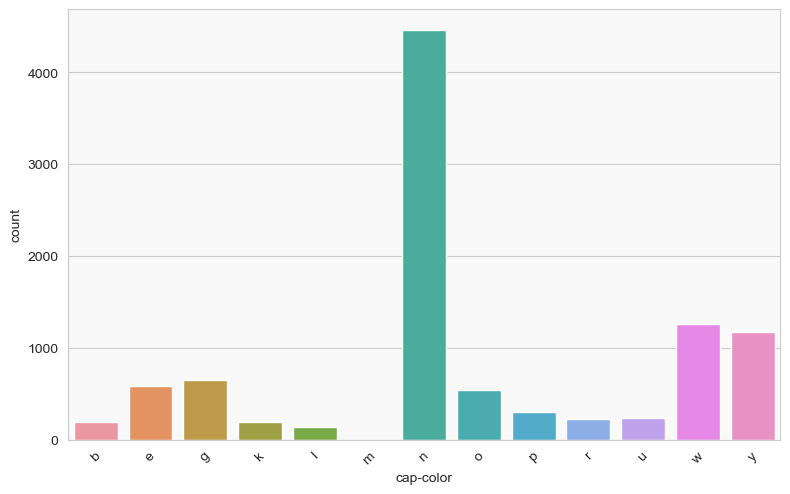

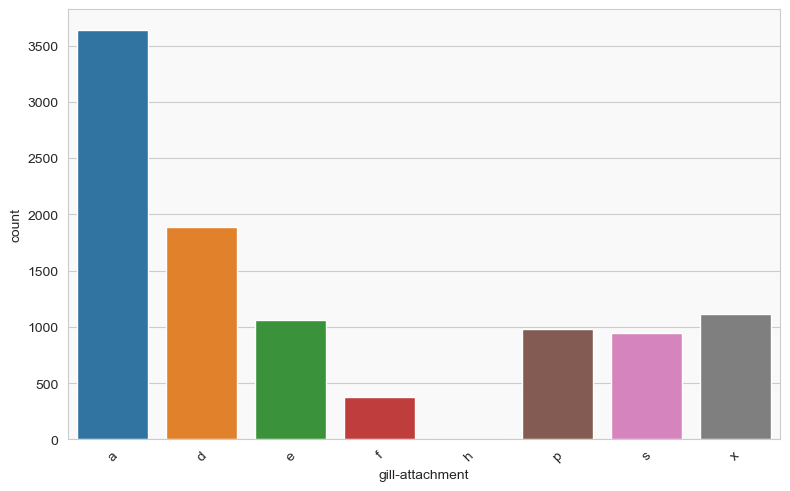

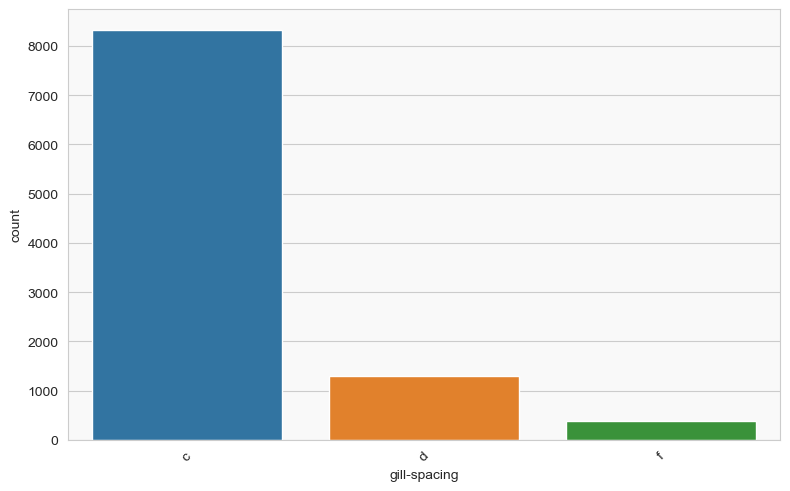

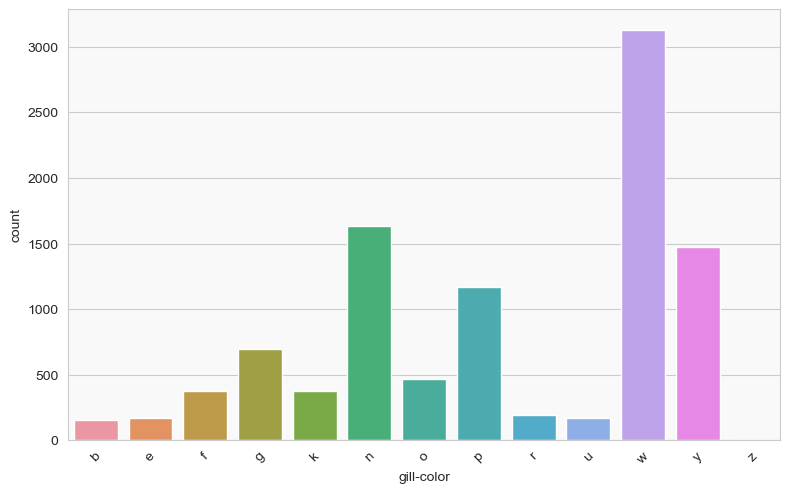

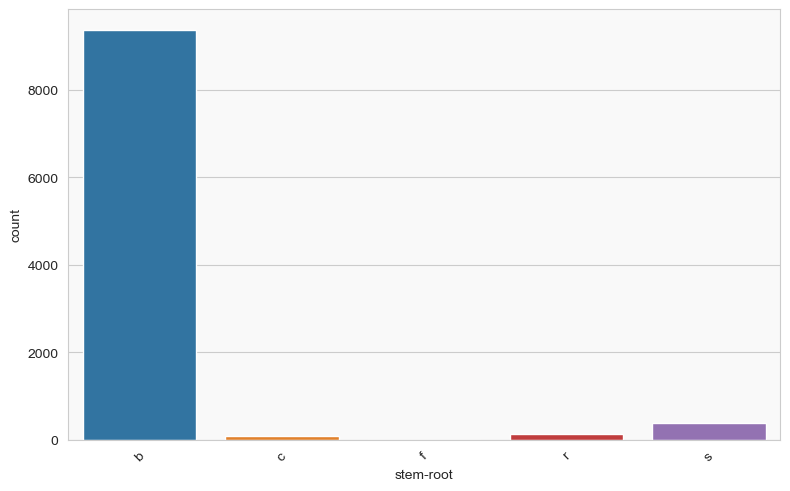

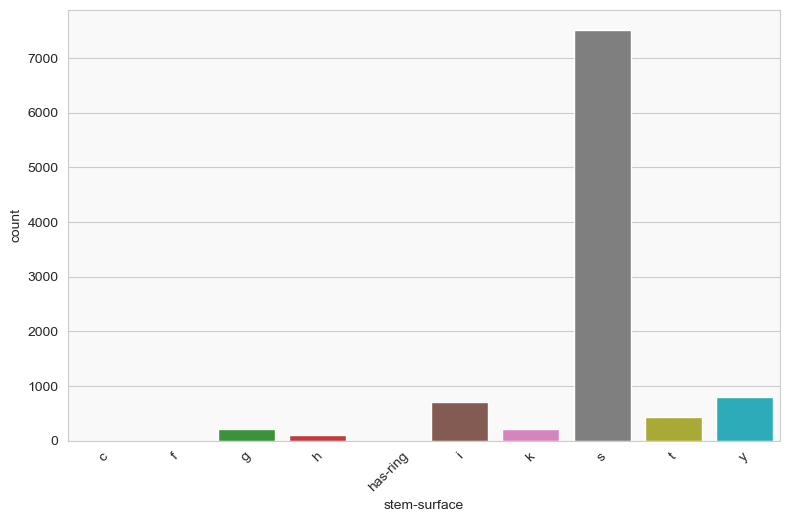

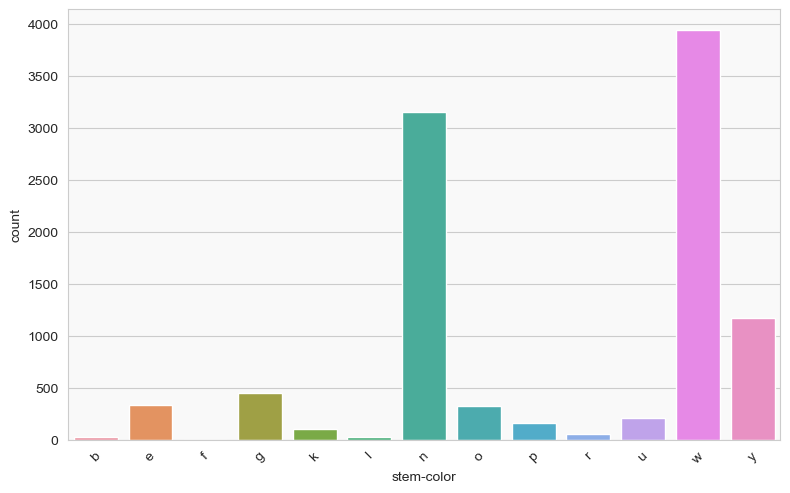

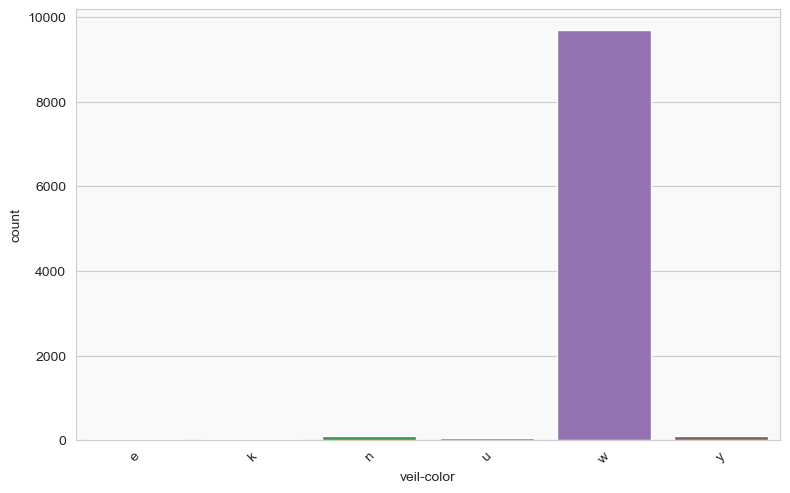

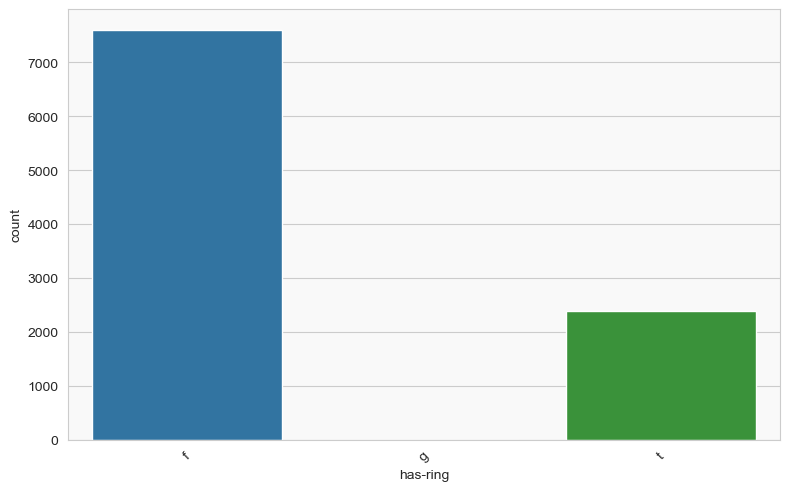

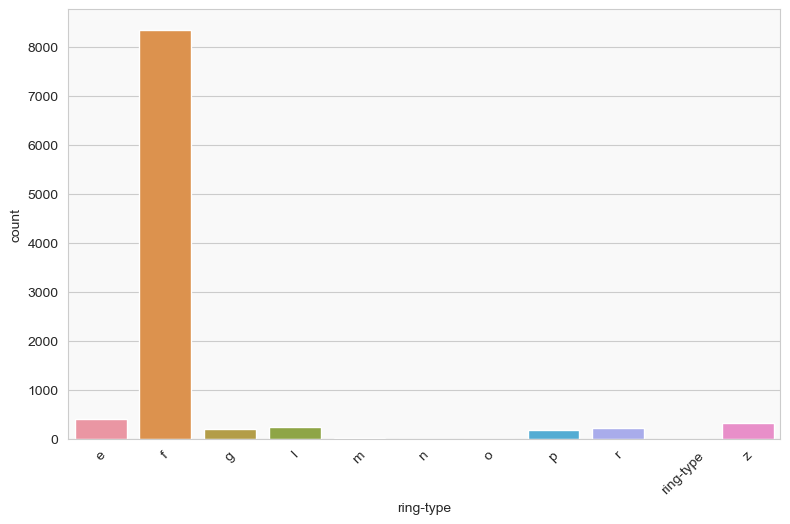

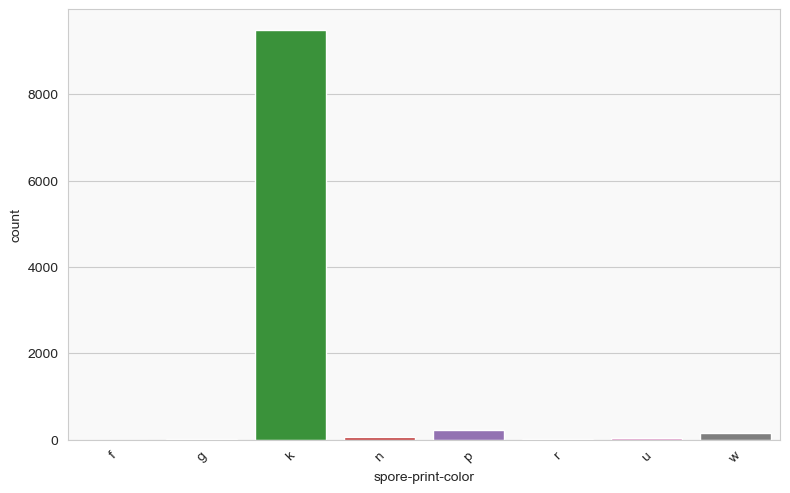

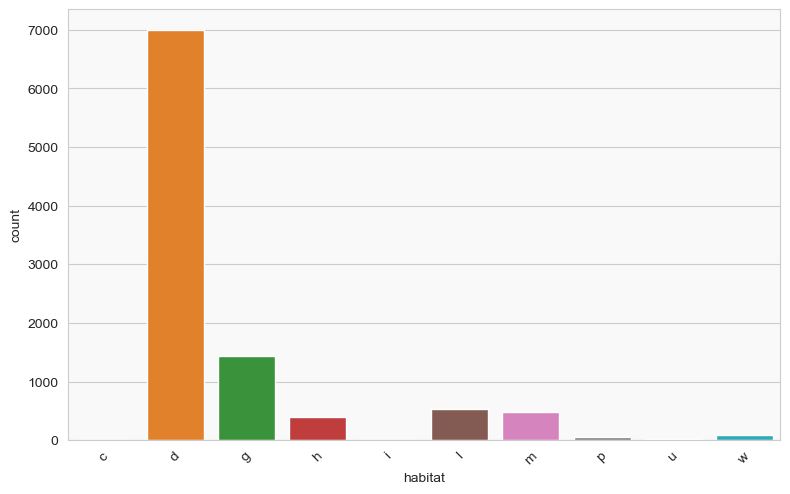

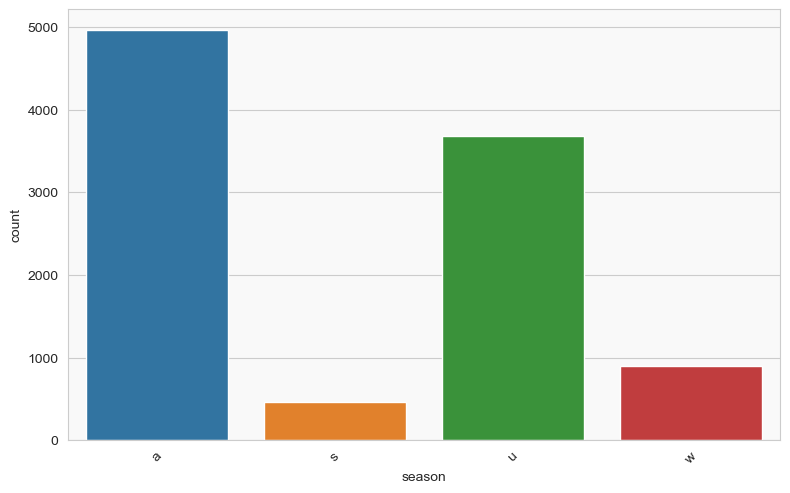

In [169]:
for col in categorical_features:
    df = X[col].value_counts().reset_index()
#     df.columns = [col, 'count']
#     df = X.sort_values(by='count', ascending=False).head(7)
 
    plt.figure(figsize=(8,5))
    sns.barplot(data=df, x=col, y='count')
    plt.tight_layout()


    plt.xticks(rotation=45)
    plt.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Data Processing</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C1.Checking Unique Categories</p>

In [75]:
categorical_columns = X.select_dtypes(include=['category', 'object']).columns
unique_values2 = {col: X[col].nunique() for col in categorical_columns}
# for col, unique_count in unique_values.items():
#     print(f"{col}: {unique_count} unique values")

In [76]:
unique_values2

{'cap-shape': 7,
 'cap-surface': 13,
 'cap-color': 12,
 'gill-attachment': 9,
 'gill-spacing': 3,
 'gill-color': 15,
 'stem-root': 5,
 'stem-surface': 8,
 'stem-color': 14,
 'veil-color': 6,
 'ring-type': 10,
 'spore-print-color': 7,
 'habitat': 8,
 'season': 4}

In [209]:
X.apply(lambda col: ', '.join(map(str, col.unique())))

cap-diameter            6.73, 10.44, 13.39, 7.79, 10.54, 3.0, 3.41, 1.03, 2.63, 2.95, 3.17, 2.8, 8.26, 4.23, 9.36, 5.45, 9.2, 12.48, 2.97, 9.63, 5.55, 5.42, 4.57, 1.9, 2.35, 4.82, 1.06, 1.23, 10.27, 7.42, 5.38, 3.85, 2.79, 9.27, 6.84, 3.74, 3.14, 5.78, 5.68, 4.42, 9.34, 4.68, 3.28, 0.69, 0.91, 7.81, 3.59, 4.12, 5.11, 3.18, 1.41, 10.12, 10.61, 3.95, 6.12, 15.09, 6.37, 14.57, 8.12, 3.24, 12.86, 8.22, 10.67, 6.49, 8.38, 6.76, 9.38, 12.61, 3.88, 1.71, 7.6, 7.69, 7.72, 9.46, 17.57, 8.56, 7.38, 5.7, 15.62, 3.68, 3.09, 3.92, 1.5, 2.75, 10.75, 6.93, 12.22, 9.02, 6.43, 3.8, 7.1, 3.67, 8.27, 2.87, 1.29, 3.19, 7.07, 18.89, 11.61, 6.18, 1.38, 2.47, 2.9, 4.73, 3.77, 7.64, 6.69, 7.41, 6.99, 2.85, 1.39, 5.72, 7.92, 9.79, 6.97, 3.84, 5.89, 5.09, 6.64, 6.29, 9.44, 1.42, 2.68, 2.18, 10.38, 15.85, 3.45, 4.71, 4.08, 9.74, 3.13, 1.56, 10.66, 5.15, 11.07, 8.51, 1.0, 12.1, 3.53, 5.98, 3.83, 7.62, 7.59, 9.04, 4.55, 2.49, 2.69, 9.23, 2.19, 1.45, 7.65, 5.26, 6.45, 2.42, 4.16, 2.67, 8.93, 8.18, 4.67, 4.91, 5.06,

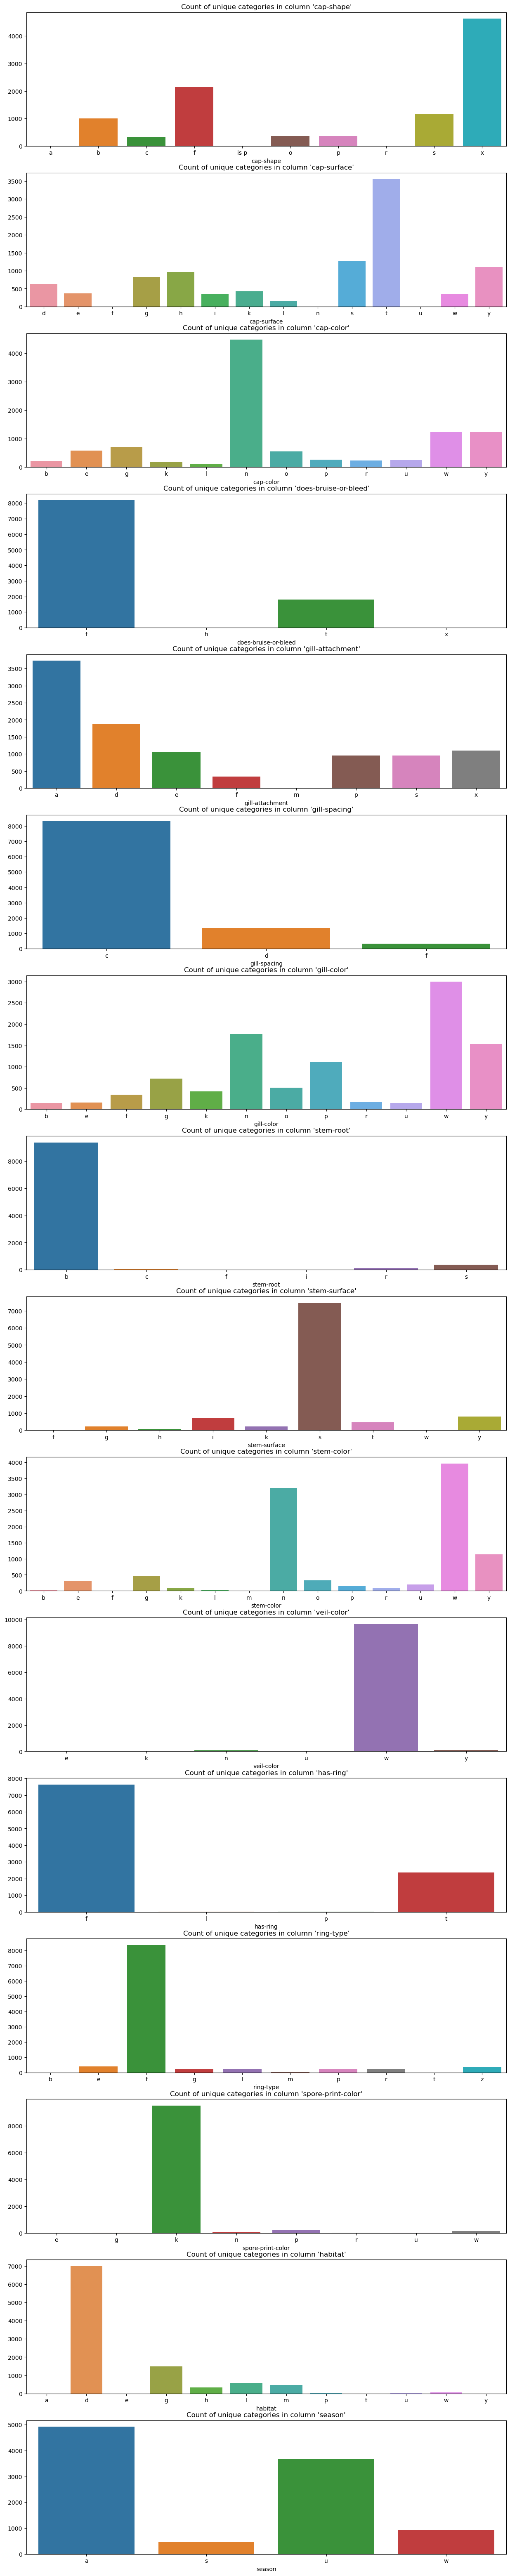

In [56]:
def count_cat(df):
#     cat_col=df.select_dtypes(include=['category']).columns
    uni_col={col: df[col].value_counts() for col in categorical_columns}
    plt.figure(figsize=(15,len(categorical_columns)*5))
    for i ,(col,count) in enumerate(uni_col.items(),1):
        plt.subplot(len(categorical_columns),1,i)
        sns.barplot(x=count.index,y=count.values)
        plt.title(f"Count of unique categories in column '{col}'")
    plt.show()
count_cat(X)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C2.Handling Less Frequent Categories</p>

In [77]:
def less_freq_cat_to_noise(df):   
    threshold = 100  # less than 100 
    for i in df:
        if df[i].dtype.name == 'category':
#             df[i] = df[i].cat.add_categories(['noise'])        
#             df[i] = df[i].fillna(df[i].mode()[0])  
            count = df[i].value_counts(dropna=False)
            less_freq = count[count < threshold].index
        
            df[i] = df[i].apply(lambda x: 'noise' if x in less_freq else x)
            df[i] = df[i].astype('category')
    return df

X = less_freq_cat_to_noise(X)

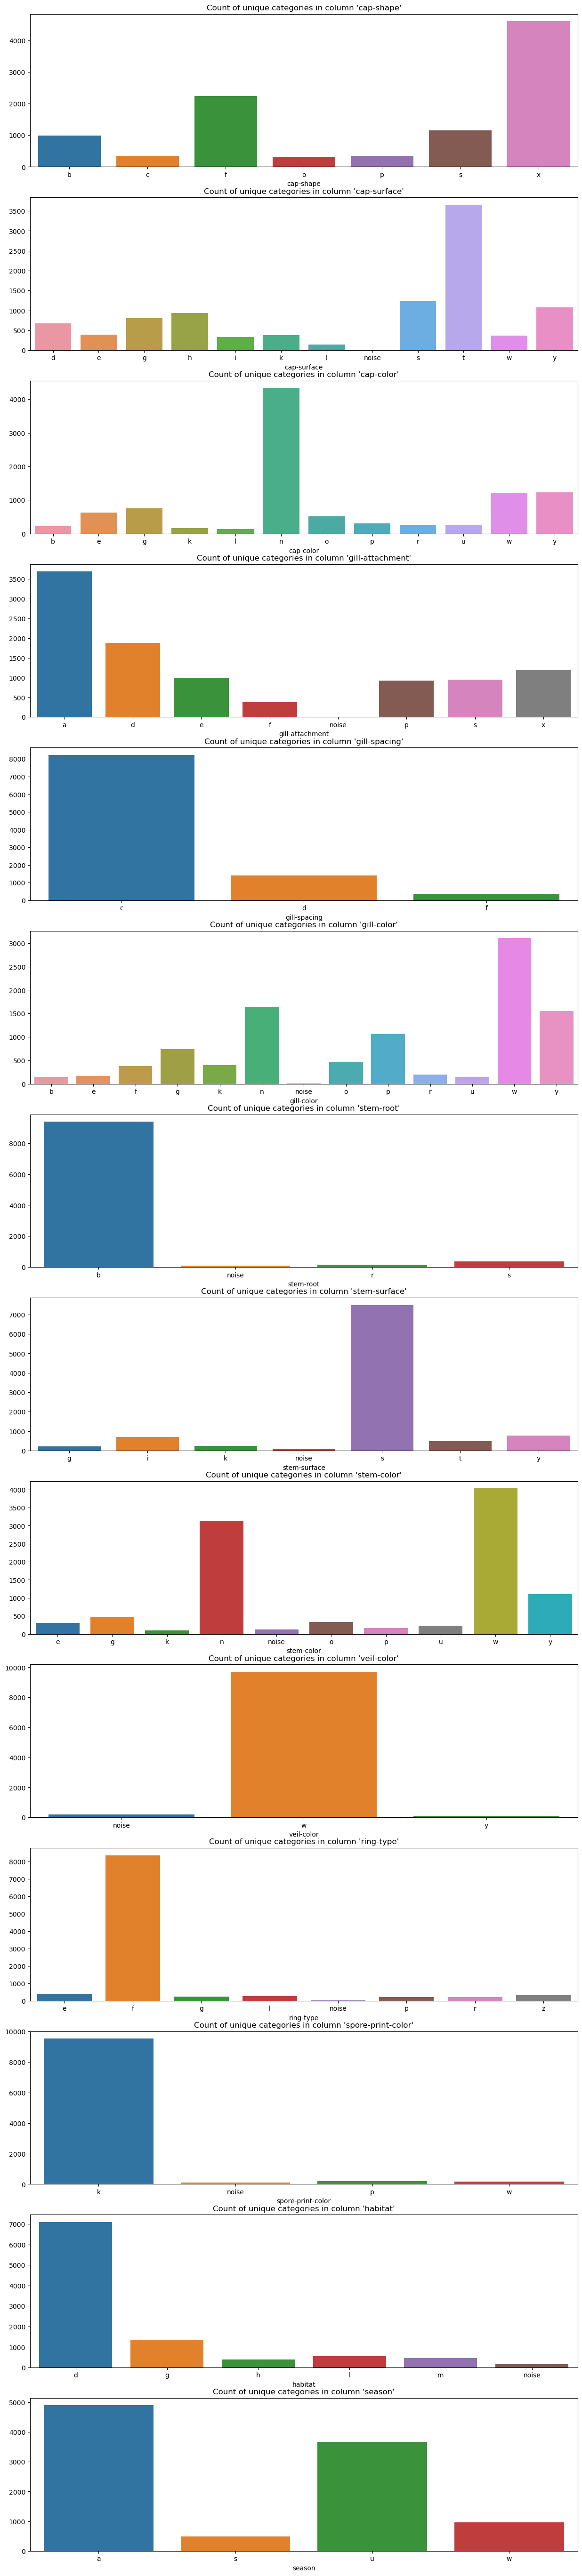

In [78]:
count_cat(X)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C3.Skewness of distributions</p>

In [79]:
numerical_columns = X.select_dtypes(include=['number']).columns
numerical_columns

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')

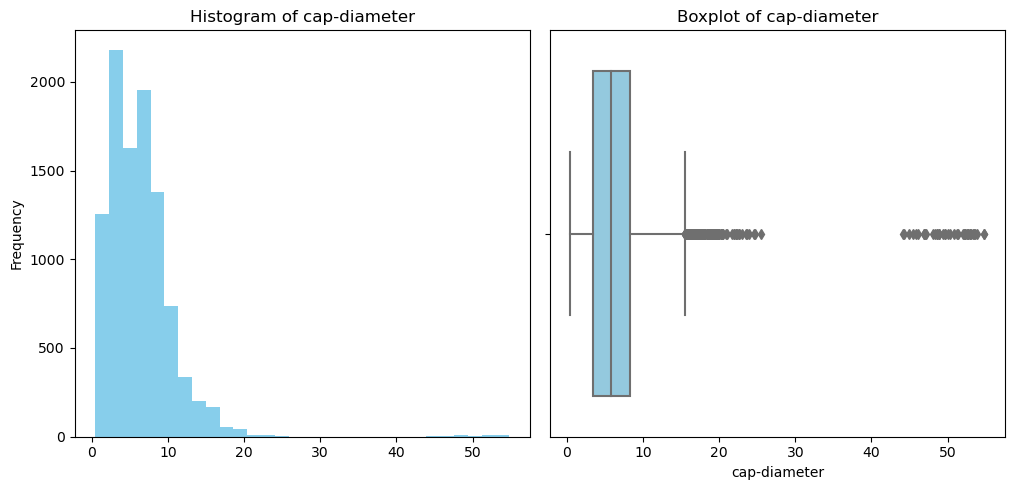

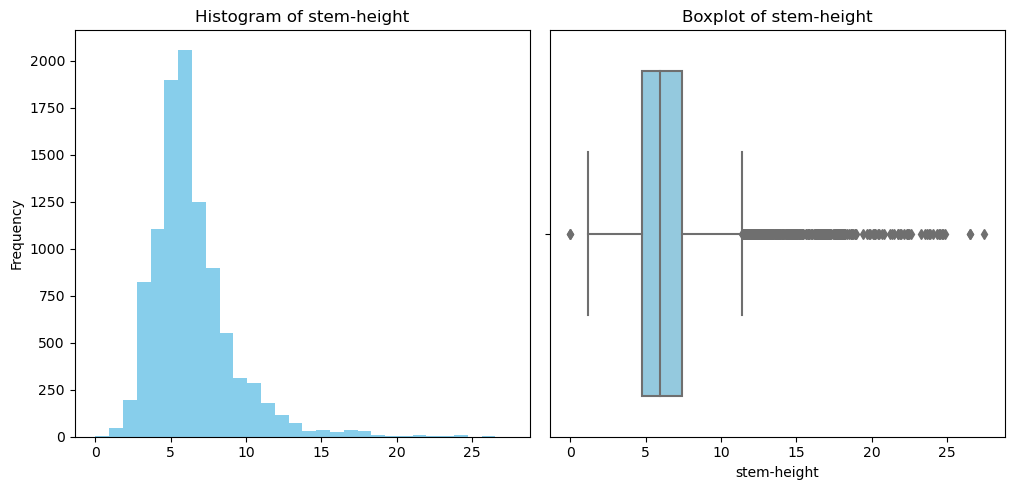

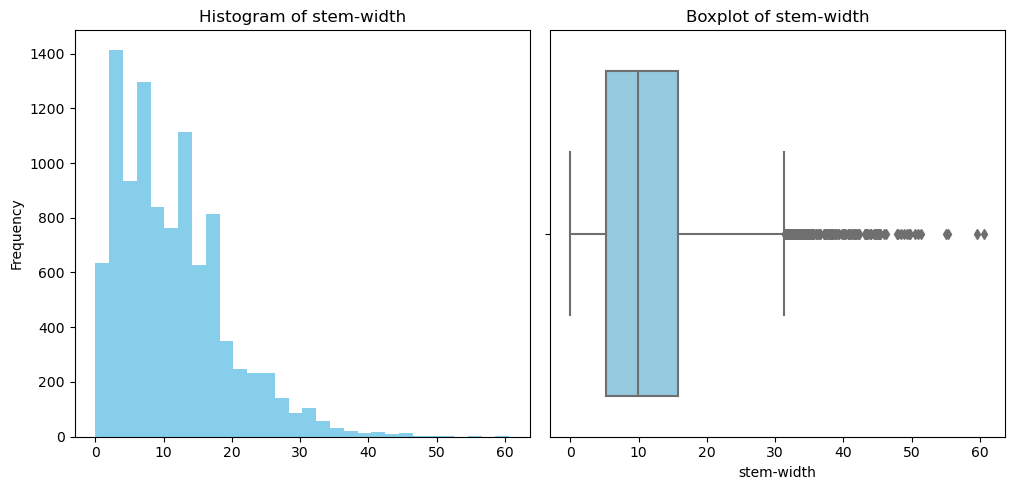

In [81]:
# Plot the numerical columns usin Box-Plot to detect the outliers.
def plot_detect_outliers (columns=numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(15, 5))

        # Histogram
        plt.subplot(1, 3, 1)
        X[col].plot.hist(bins=30, color='skyblue')
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=X[col],color='skyblue')
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()
        
plot_detect_outliers (numerical_columns)

In [82]:
# Handle the Skeweness
from scipy.stats import boxcox

def apply_boxcox(df, columns):
    df_transformed = df.copy()
    
    for col in columns:
        # Ensure the data is strictly positive
        if (df[col] > 0).any():
            # Shift the data if there are zero or negative values
            shift = abs(df[col].min()) + 1
            df_transformed[col] = df[col] + shift
        else:
            shift = 0
        
        df_transformed[col], best_lambda = boxcox(df_transformed[col])
        
    return df_transformed

X = apply_boxcox(X,numerical_columns)

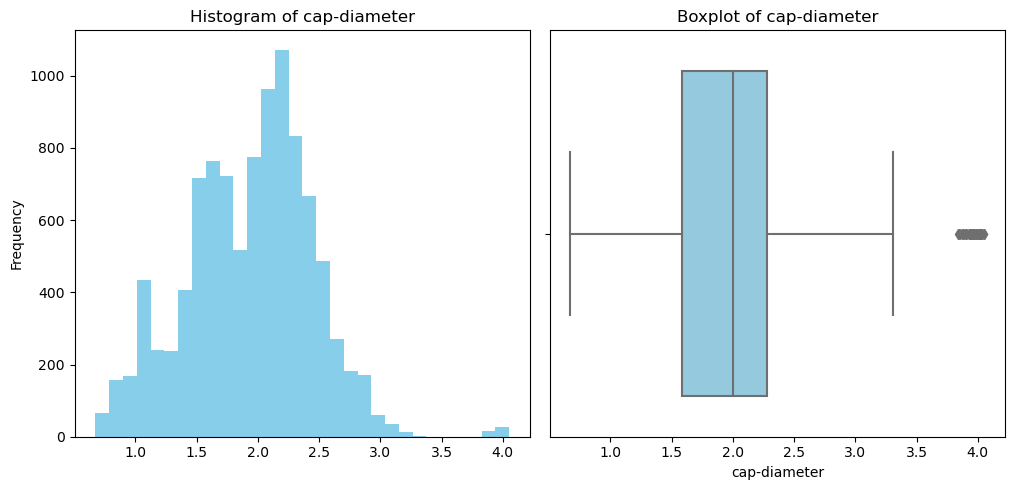

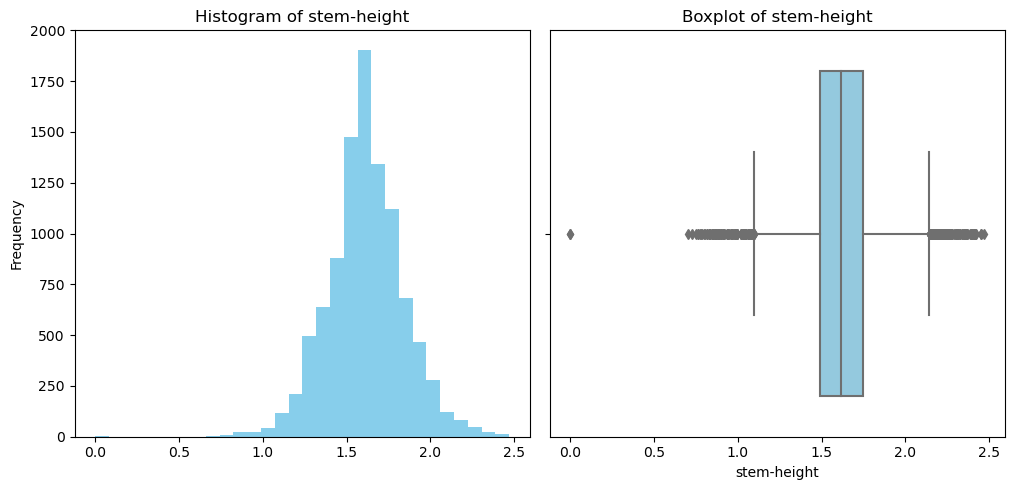

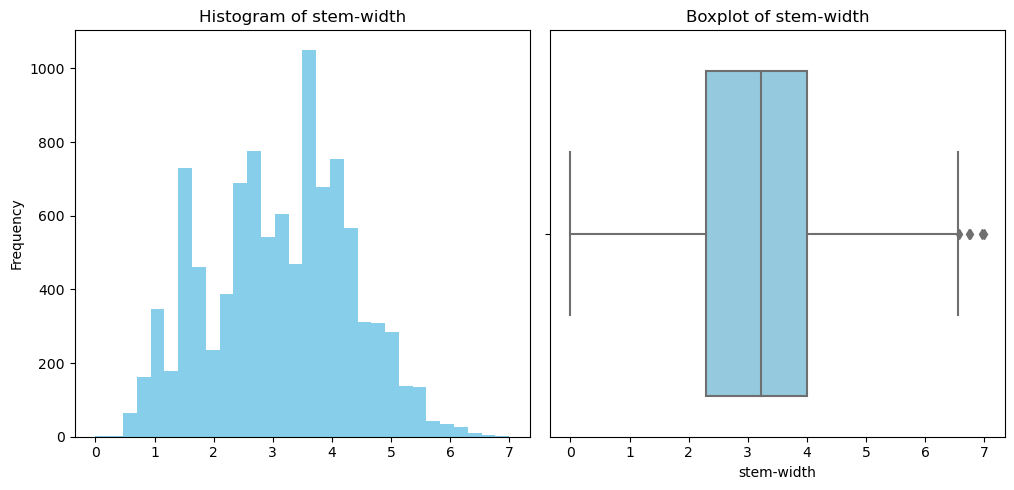

In [83]:
plot_detect_outliers (numerical_columns)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C4.Detect Outliers</p>

In [84]:
def calculate_outliers_percentage(df):

    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")


calculate_outliers_percentage(X)

Percentage of outliers in cap-diameter: 0.42%
Percentage of outliers in stem-height: 2.87%
Percentage of outliers in stem-width: 0.05%


In [36]:
# We will handle the outliers usin the Z-score.
# def handle_outliers_zscore(df, columns, threshold=3):
#     for col in columns:
        
#         mean = df[col].mean()
#         std_dev = df[col].std()
        
#         z_scores = (df[col] - mean) / std_dev

#         df_clean = df.loc[abs(z_scores) <= threshold].copy()
    
#     return df_clean
# X = handle_outliers_zscore(X, numerical_columns)
# X.shape

(9905, 20)

In [85]:
def handle_outliers(df):
    
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    #clip: everything smaller than lower_bound = lower_bound / everything grater than upper_bound = upper_bound
    return df

X = handle_outliers(X)

In [86]:
calculate_outliers_percentage(X)

Percentage of outliers in cap-diameter: 0.00%
Percentage of outliers in stem-height: 0.00%
Percentage of outliers in stem-width: 0.00%


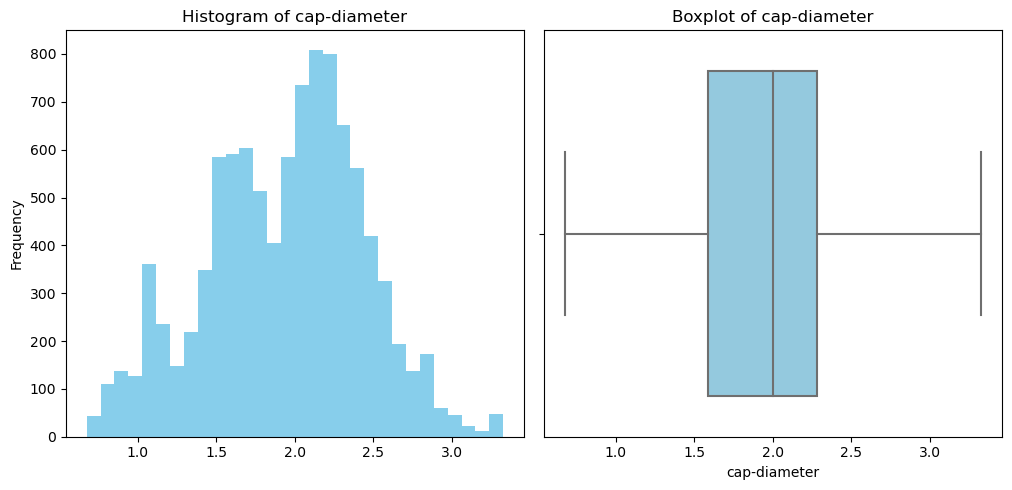

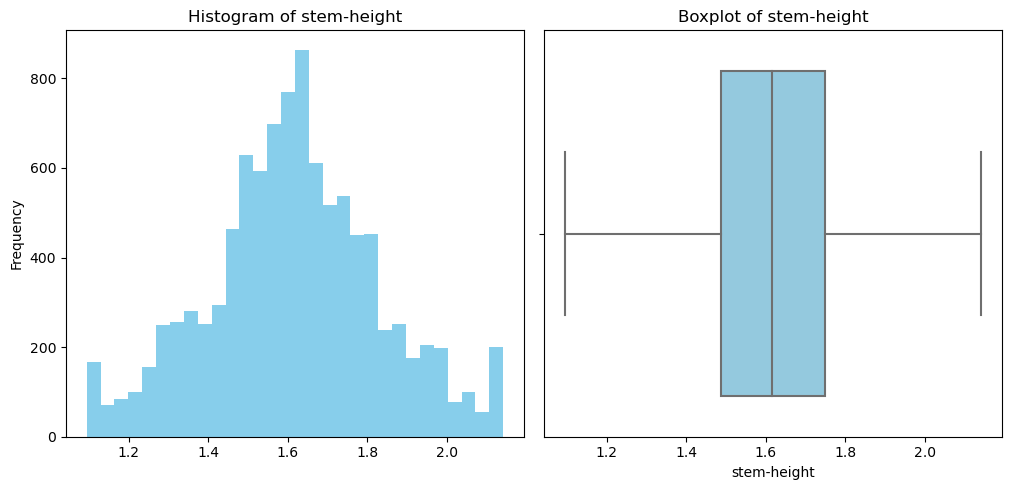

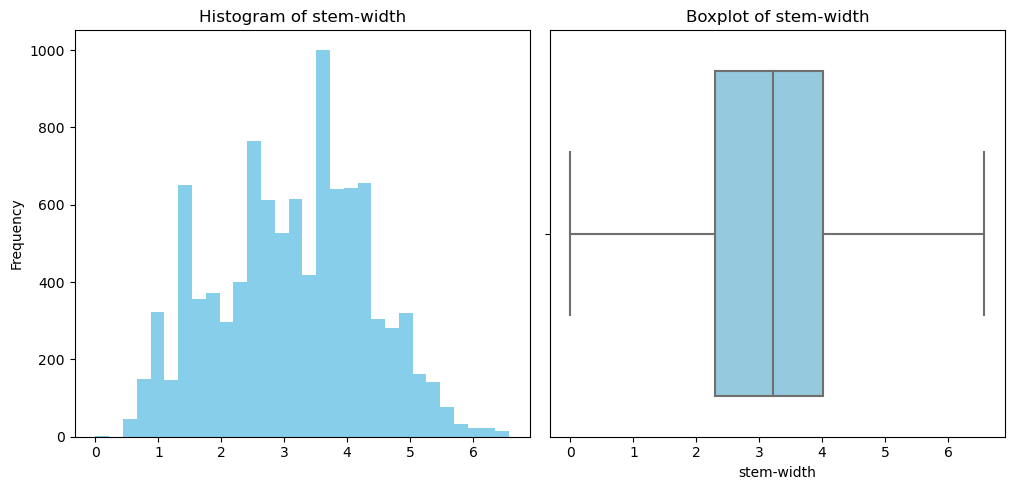

In [87]:
plot_detect_outliers (numerical_columns)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C5.Feature Engineering (optional)</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C6.Imbalanced Data -Oversampling - SMOTE</p>

In [89]:
class_counts = train["class"].value_counts(normalize=True)
class_counts

class
e    0.5
p    0.5
Name: proportion, dtype: float64

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C7.Encoding Categorical/ Dummies</p>

In [90]:
categorical_cols3 = [cname for cname in X.columns if  
                        X[cname].dtype in ['category'] and X[cname].nunique() <11]
categorical_cols3

['cap-shape',
 'gill-attachment',
 'gill-spacing',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [98]:
# X = pd.get_dummies(X, columns=categorical_dummies)

# inny zapis tego co wyżej
def converting_to_dummies (df):
    categorical_cols = [cname for cname in df.columns if  
                        df[cname].dtype in ['category'] and df[cname].nunique() <11]

    df = pd.get_dummies(df, columns=categorical_cols)
    return df
X = converting_to_dummies(X)
# test = converting_to_dummies(X)

In [102]:
categorical_columns = X.select_dtypes(include=['category', 'object']).columns
categorical_columns

Index(['cap-surface', 'cap-color', 'gill-color'], dtype='object')

In [103]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X[categorical_columns] = encoder.fit_transform(X[categorical_columns].astype(str))

# Apply the same encoder to our test data columns
# test_df[reduced_cat_cols] = encoder.transform(test_df[reduced_cat_cols].astype(str))

In [ ]:
from sklearn.preprocessing import LabelEncoder
# for i in categorical_columns:
#     X[i] =label_encoder.fit_transform(X[i])

def encode(df):
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df

df_encoded= encode(X)
# test_encoded = encode(test)

In [104]:
X.head(3)

cap-diameter  cap-surface  cap-color  does-bruise-or-bleed  \
id                                                                    
2074674      2.477527          3.0        5.0                  True   
993513       2.779626          1.0       11.0                  True   
1801134      1.066304          3.0        5.0                  True   

         gill-color  stem-height  stem-width  veil-type  has-ring  \
id                                                                  
2074674        12.0     1.755681    4.649744       True      True   
993513         11.0     1.846668    5.171731       True      True   
1801134         5.0     1.462961    0.921106       True      True   

         cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_o  cap-shape_p  \
id                                                                         
2074674        False        False        False        False        False   
993513         False        False        False        False        False   
1801134         True        False        False        False        False   

         cap-shape_s  cap-shape_x  gill-attachment_a  gill-attachment_d  \
id                                                                        
2074674        False         True              False              False   
993513         False         True              False              False   
1801134        False        False               True              False   

         gill-attachment_e  gill-attachment_f  gill-attachment_noise  \
id                                                                     
2074674              False              False                  False   
993513               False              False                  False   
1801134              False              False                  False   

         gill-attachment_p  gill-attachment_s  gill-attachment_x  \
id                                                                 
2074674               True              False              False   
993513               False              False               True   
1801134              False              False              False   

         gill-spacing_c  gill-spacing_d  gill-spacing_f  stem-root_b  \
id                                                                     
2074674            True           False           False         True   
993513             True           False           False         True   
1801134            True           False           False         True   

         stem-root_noise  stem-root_r  stem-root_s  stem-surface_g  \
id                                                                   
2074674            False        False        False           False   
993513             False        False        False           False   
1801134            False        False        False           False   

         stem-surface_i  stem-surface_k  stem-surface_noise  stem-surface_s  \
id                                                                            
2074674           False           False               False            True   
993513            False           False               False            True   
1801134           False           False               False           False   

         stem-surface_t  stem-surface_y  stem-color_e  stem-color_g  \
id                                                                    
2074674           False           False         False         False   
993513            False           False         False         False   
1801134            True           False         False         False   

         stem-color_k  stem-color_n  stem-color_noise  stem-color_o  \
id                                                                    
2074674         False          True             False         False   
993513          False         False             False         False   
1801134         False          True             False         False   

         stem-color_p  stem-

In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2074674 to 1747205
Data columns (total 73 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cap-diameter             10000 non-null  float32
 1   cap-surface              10000 non-null  float64
 2   cap-color                10000 non-null  float64
 3   does-bruise-or-bleed     10000 non-null  bool   
 4   gill-color               10000 non-null  float64
 5   stem-height              10000 non-null  float64
 6   stem-width               10000 non-null  float32
 7   veil-type                10000 non-null  bool   
 8   has-ring                 10000 non-null  bool   
 9   cap-shape_b              10000 non-null  bool   
 10  cap-shape_c              10000 non-null  bool   
 11  cap-shape_f              10000 non-null  bool   
 12  cap-shape_o              10000 non-null  bool   
 13  cap-shape_p              10000 non-null  bool   
 14  cap-shape_s        

In [106]:
X.skew()

cap-diameter               -0.173998
cap-surface                -0.648825
cap-color                   0.191106
does-bruise-or-bleed        0.000000
gill-color                 -0.496172
stem-height                 0.042284
stem-width                 -0.040454
veil-type                   0.000000
has-ring                    0.000000
cap-shape_b                 2.678224
cap-shape_c                 5.085484
cap-shape_f                 1.322808
cap-shape_o                 5.291647
cap-shape_p                 5.151852
cap-shape_s                 2.409376
cap-shape_x                 0.159731
gill-attachment_a           0.542158
gill-attachment_d           1.598162
gill-attachment_e           2.676358
gill-attachment_f           4.847820
gill-attachment_noise      70.700069
gill-attachment_p           2.825772
gill-attachment_s           2.768857
gill-attachment_x           2.356691
gill-spacing_c             -1.688332
gill-spacing_d              2.076514
gill-spacing_f              4.862294
s

In [107]:
numerical_columns = X.select_dtypes(include=['number']).columns
numerical_columns

Index(['cap-diameter', 'cap-surface', 'cap-color', 'gill-color', 'stem-height',
       'stem-width'],
      dtype='object')

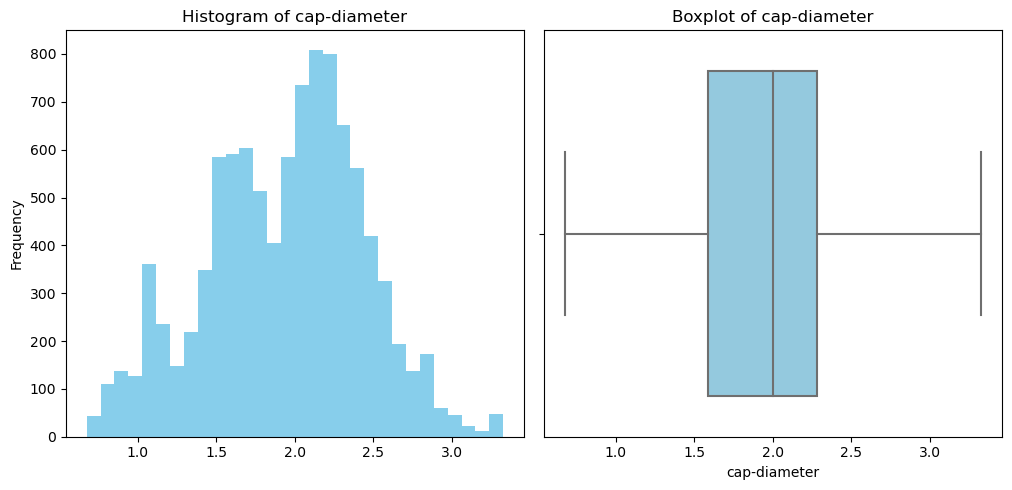

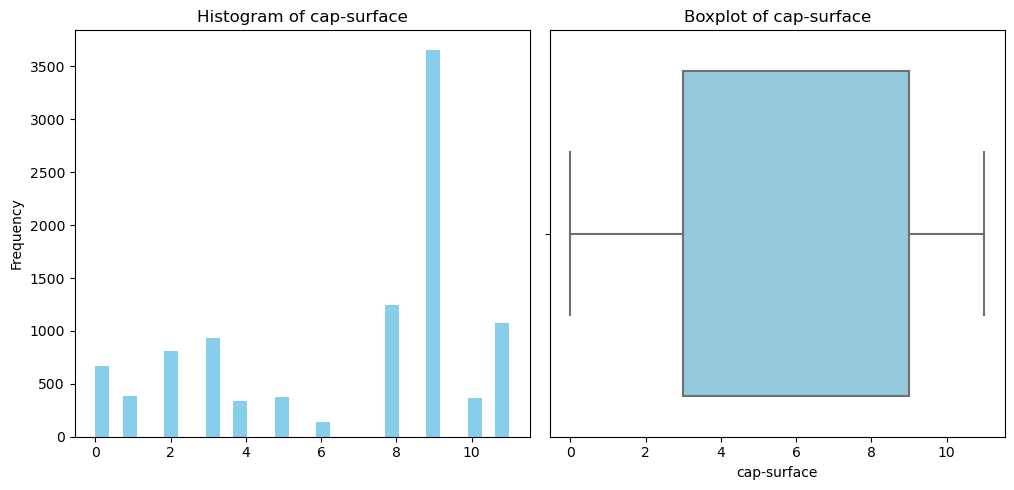

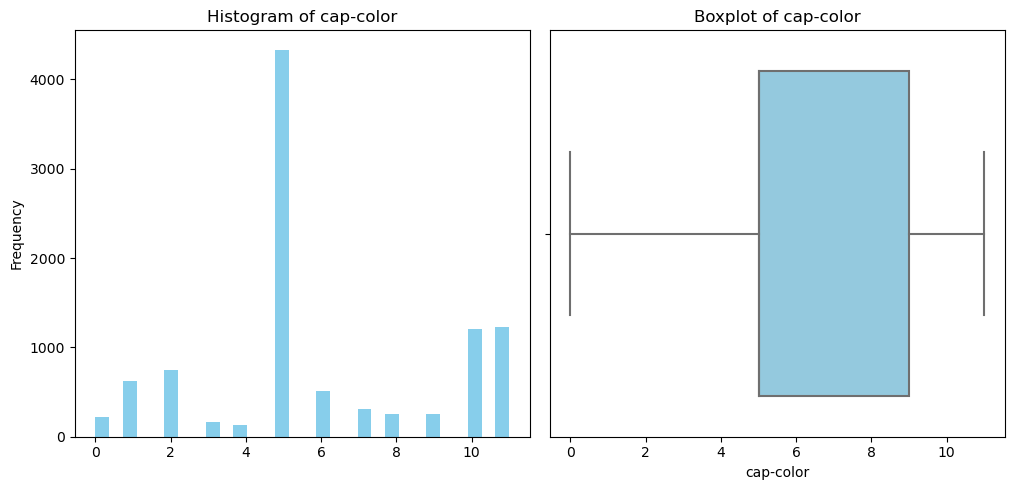

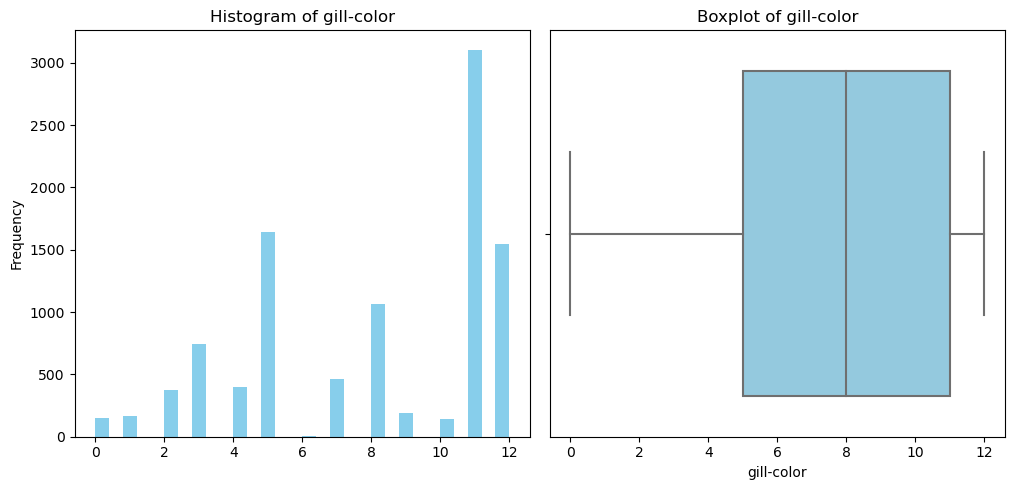

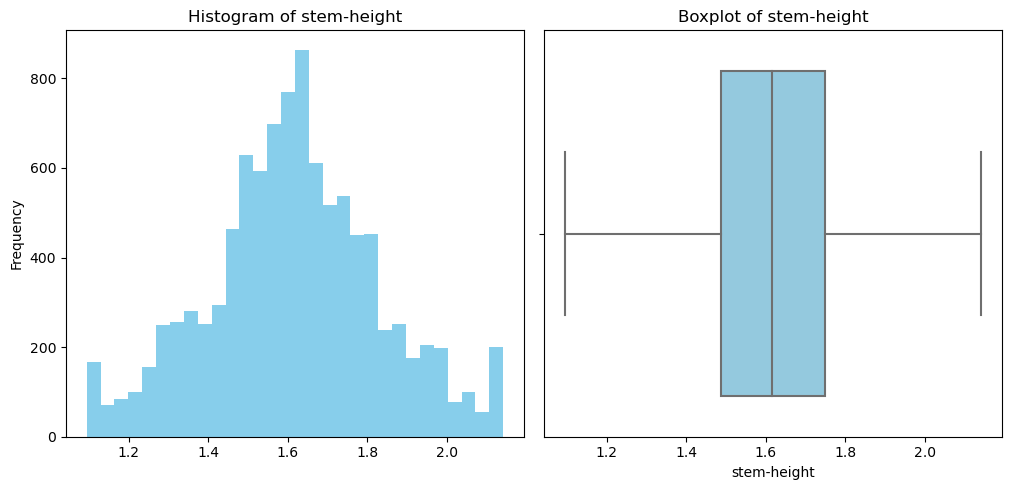

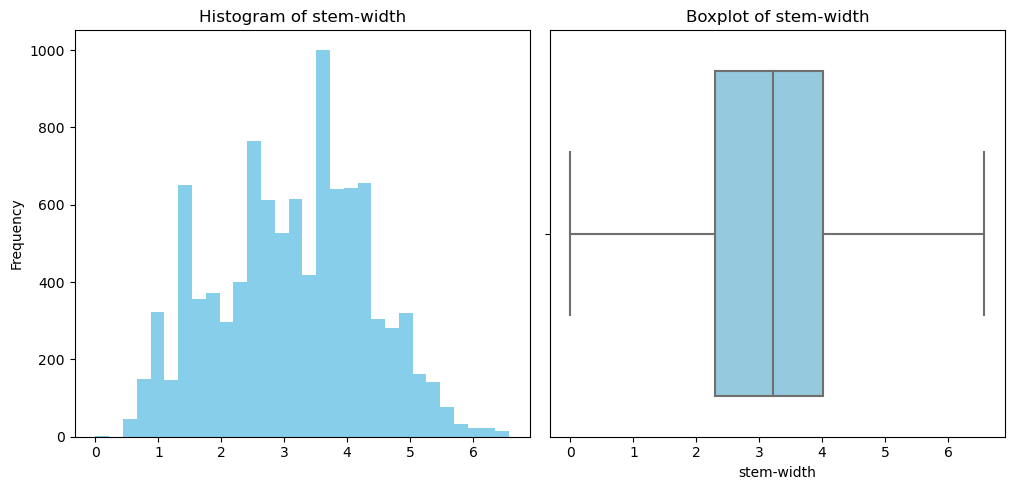

In [108]:
plot_detect_outliers (numerical_columns)

In [109]:
calculate_outliers_percentage(X)

Percentage of outliers in cap-diameter: 0.00%
Percentage of outliers in cap-surface: 0.00%
Percentage of outliers in cap-color: 0.00%
Percentage of outliers in gill-color: 0.00%
Percentage of outliers in stem-height: 0.00%
Percentage of outliers in stem-width: 0.00%


In [226]:
# X = handle_outliers(X)

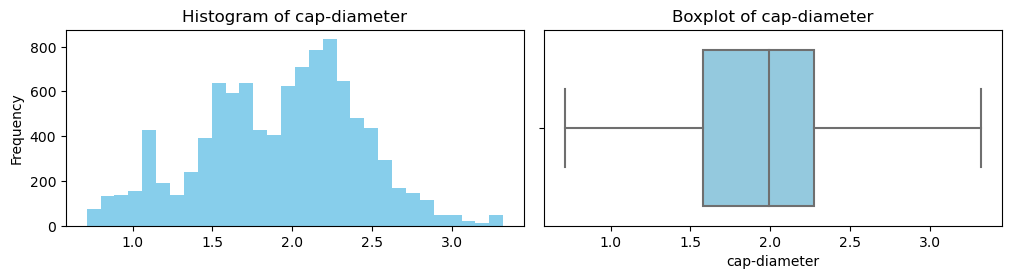

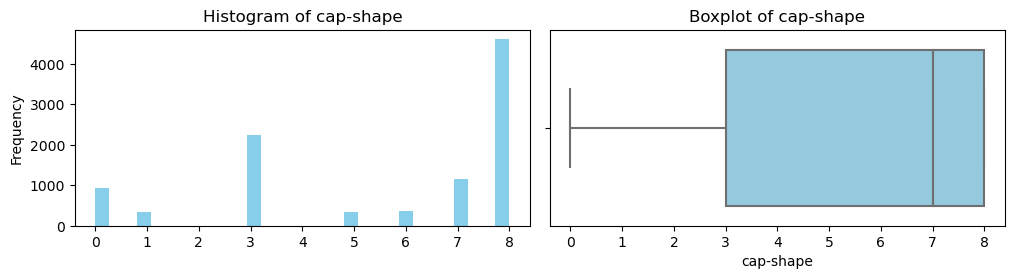

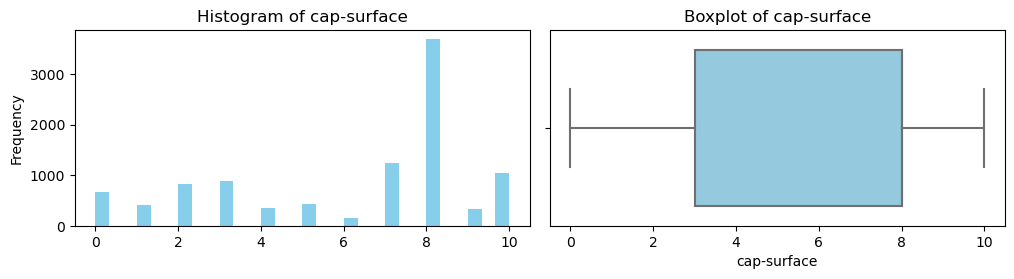

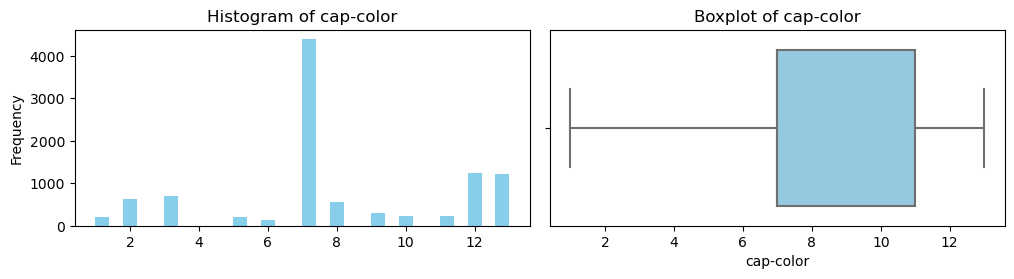

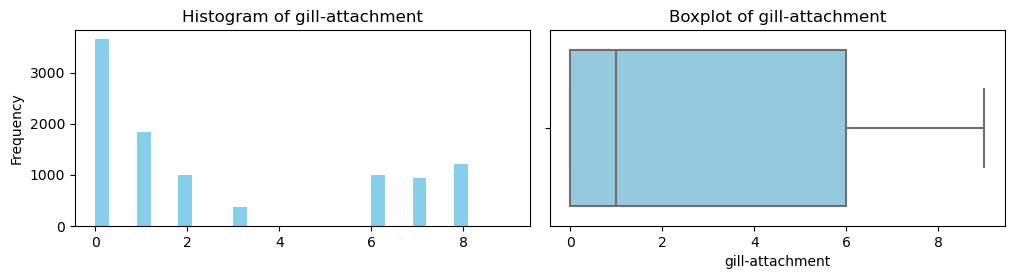

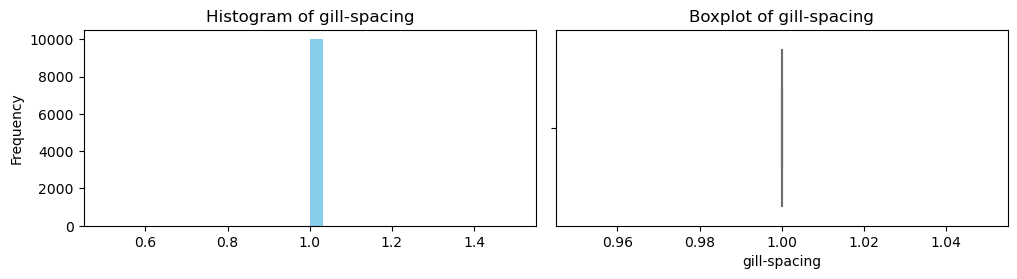

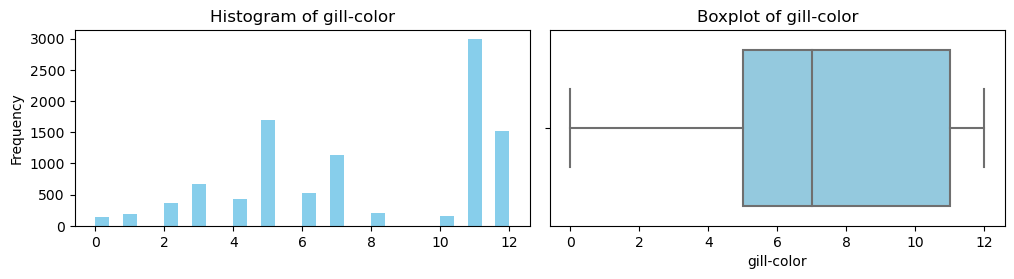

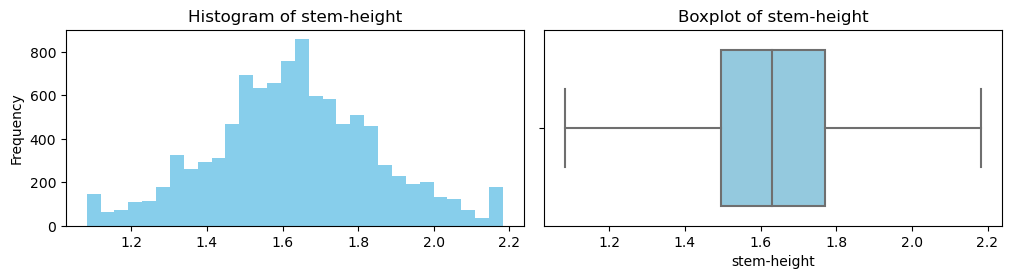

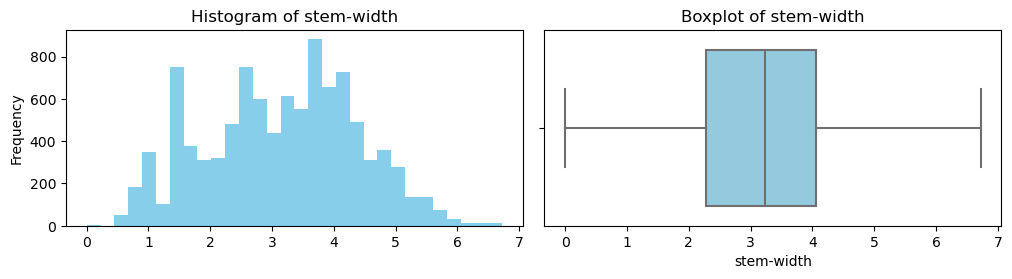

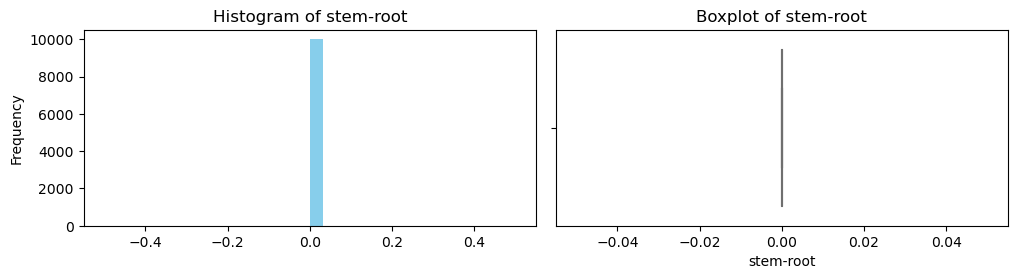

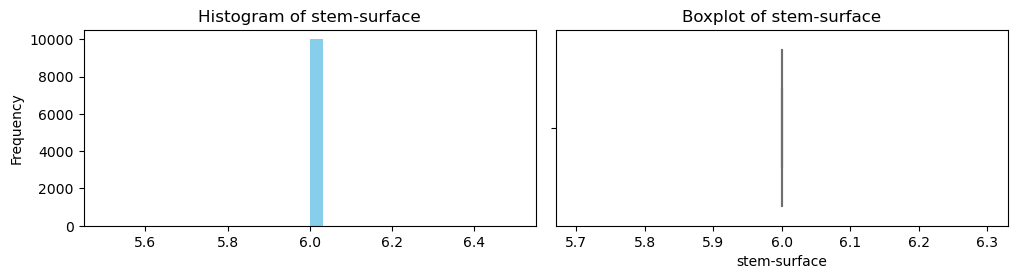

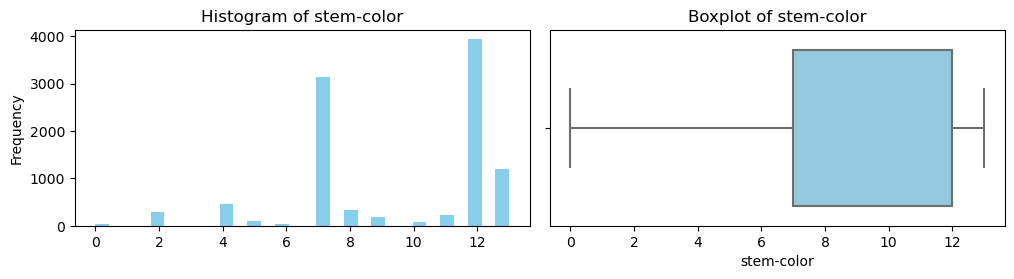

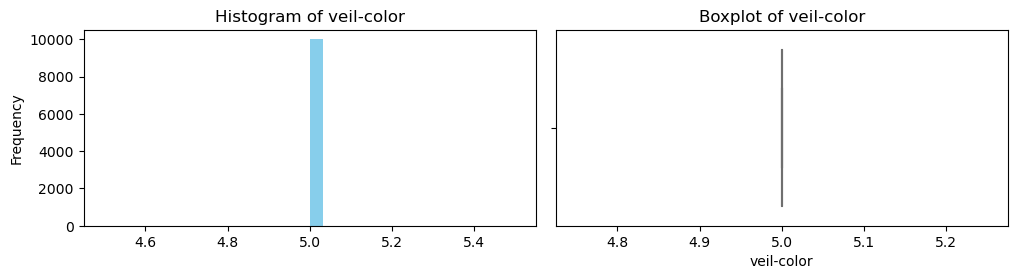

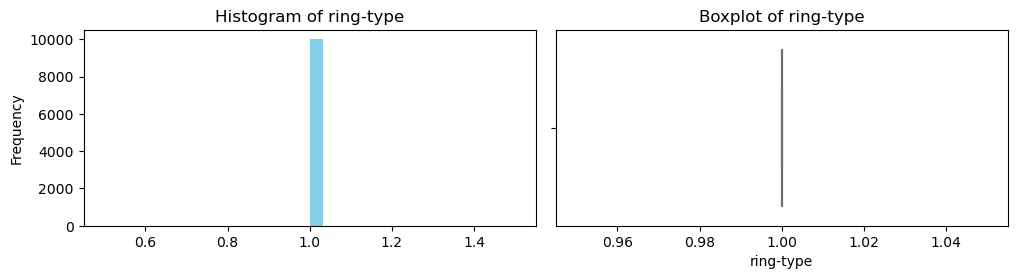

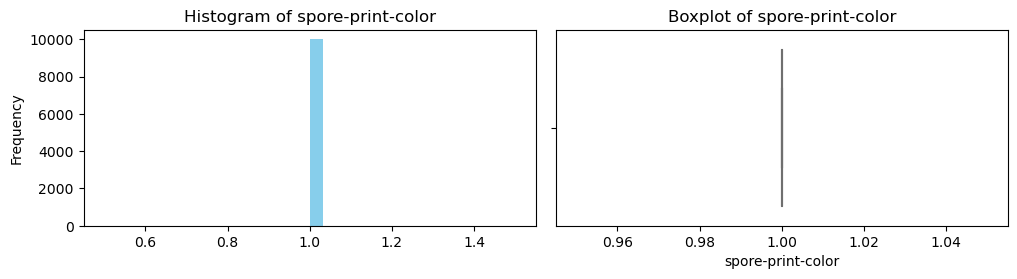

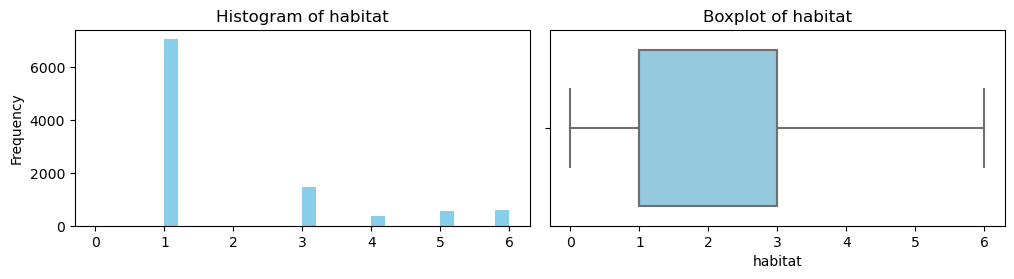

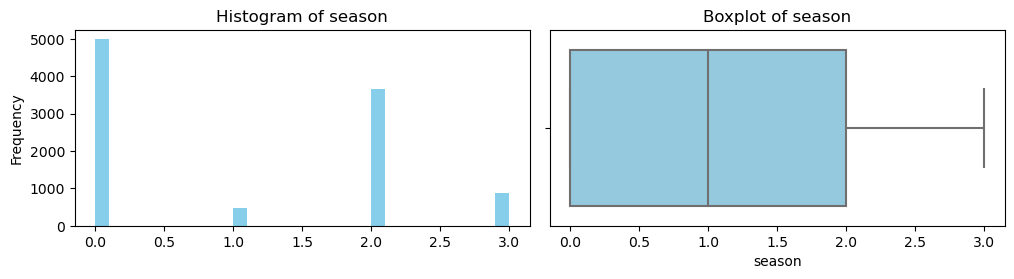

In [228]:
# plot_detect_outliers (numerical_columns)

In [110]:
X.var(axis=0)

cap-diameter                0.249430
cap-surface                12.233618
cap-color                   9.548955
does-bruise-or-bleed        0.000000
gill-color                 12.505173
stem-height                 0.046885
stem-width                  1.433890
veil-type                   0.000000
has-ring                    0.000000
cap-shape_b                 0.089529
cap-shape_c                 0.033499
cap-shape_f                 0.173952
cap-shape_o                 0.031260
cap-shape_p                 0.032754
cap-shape_s                 0.102016
cap-shape_x                 0.248441
gill-attachment_a           0.232915
gill-attachment_d           0.152609
gill-attachment_e           0.089609
gill-attachment_f           0.036375
gill-attachment_noise       0.000200
gill-attachment_p           0.083463
gill-attachment_s           0.085740
gill-attachment_x           0.104697
gill-spacing_c              0.146008
gill-spacing_d              0.120340
gill-spacing_f              0.036190
s

In [41]:
# X = convert_types(X)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C8.Normalizing - Scaling Data (optional)</p>

In [111]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [112]:
X.head(3)

cap-diameter  cap-surface  cap-color  does-bruise-or-bleed  \
id                                                                    
2074674      2.477527          3.0        5.0                  True   
993513       2.779626          1.0       11.0                  True   
1801134      1.066304          3.0        5.0                  True   

         gill-color  stem-height  stem-width  veil-type  has-ring  \
id                                                                  
2074674        12.0     1.755681    4.649744       True      True   
993513         11.0     1.846668    5.171731       True      True   
1801134         5.0     1.462961    0.921106       True      True   

         cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_o  cap-shape_p  \
id                                                                         
2074674        False        False        False        False        False   
993513         False        False        False        False        False   
1801134         True        False        False        False        False   

         cap-shape_s  cap-shape_x  gill-attachment_a  gill-attachment_d  \
id                                                                        
2074674        False         True              False              False   
993513         False         True              False              False   
1801134        False        False               True              False   

         gill-attachment_e  gill-attachment_f  gill-attachment_noise  \
id                                                                     
2074674              False              False                  False   
993513               False              False                  False   
1801134              False              False                  False   

         gill-attachment_p  gill-attachment_s  gill-attachment_x  \
id                                                                 
2074674               True              False              False   
993513               False              False               True   
1801134              False              False              False   

         gill-spacing_c  gill-spacing_d  gill-spacing_f  stem-root_b  \
id                                                                     
2074674            True           False           False         True   
993513             True           False           False         True   
1801134            True           False           False         True   

         stem-root_noise  stem-root_r  stem-root_s  stem-surface_g  \
id                                                                   
2074674            False        False        False           False   
993513             False        False        False           False   
1801134            False        False        False           False   

         stem-surface_i  stem-surface_k  stem-surface_noise  stem-surface_s  \
id                                                                            
2074674           False           False               False            True   
993513            False           False               False            True   
1801134           False           False               False           False   

         stem-surface_t  stem-surface_y  stem-color_e  stem-color_g  \
id                                                                    
2074674           False           False         False         False   
993513            False           False         False         False   
1801134            True           False         False         False   

         stem-color_k  stem-color_n  stem-color_noise  stem-color_o  \
id                                                                    
2074674         False          True             False         False   
993513          False         False             False         False   
1801134         False          True             False         False   

         stem-color_p  stem-

In [113]:
# perform a robust scaler transform of the dataset
trans = StandardScaler()
X = trans.fit_transform(X)
# X_test = trans.transform(X_test)

In [127]:
#  data between 0-1, we lose some onformation but it is necessary for Variance Threshold to become comparable
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# X_test = pd.DataFrame(scaler.transform(X_test_t), columns=X_train.columns)

In [128]:
X.head()

cap-diameter  cap-surface  cap-color  does-bruise-or-bleed  gill-color  \
0      0.679901     0.272727   0.454545                   0.0    1.000000   
1      0.793761     0.090909   1.000000                   0.0    0.916667   
2      0.148016     0.272727   0.454545                   0.0    0.416667   
3      0.490109     0.363636   0.545455                   0.0    1.000000   
4      0.726711     0.818182   0.181818                   0.0    0.916667   

   stem-height  stem-width  veil-type  has-ring  cap-shape_b  cap-shape_c  \
0     0.631734    0.707071        0.0       0.0          0.0          0.0   
1     0.718577    0.786448        0.0       0.0          0.0          0.0   
2     0.352348    0.140070        0.0       0.0          1.0          0.0   
3     0.597973    0.450844        0.0       0.0          1.0          0.0   
4     0.838190    0.584008        0.0       0.0          0.0          0.0   

   cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  \
0          0.0          0.0          0.0          0.0          1.0   
1          0.0          0.0          0.0          0.0          1.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          1.0   

   gill-attachment_a  gill-attachment_d  gill-attachment_e  gill-attachment_f  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                1.0                0.0                0.0                0.0   
3                0.0                0.0                1.0                0.0   
4                0.0                0.0                1.0                0.0   

   gill-attachment_noise  gill-attachment_p  gill-attachment_s  \
0                    0.0                1.0                0.0   
1                    0.0                0.0                0.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    0.0                0.0                0.0   

   gill-attachment_x  gill-spacing_c  gill-spacing_d  gill-spacing_f  \
0                0.0             1.0             0.0             0.0   
1                1.0             1.0             0.0             0.0   
2                0.0             1.0             0.0             0.0   
3                0.0             1.0             0.0             0.0   
4                0.0             1.0             0.0             0.0   

   stem-root_b  stem-root_noise  stem-root_r  stem-root_s  stem-surface_g  \
0          1.0              0.0          0.0          0.0             0.0   
1          1.0              0.0          0.0          0.0             0.0   
2          1.0              0.0          0.0          0.0             0.0   
3          1.0              0.0          0.0          0.0             0.0   
4          1.0              0.0          0.0          0.0             0.0   

   stem-surface_i  stem-surface_k  stem-surface_noise  stem-surface_s  \
0             0.0             0.0                 0.0             1.0   
1             0.0             0.0                 0.0             1.0   
2             0.0             0.0                 0.0             0.0   
3             0.0             0.0                 0.0             1.0   
4             0.0             0.0                 0.0             1.0   

   stem-surface_t  stem-surface_y  stem-color_e  stem-color_g  stem-color_k  \
0             0.0             0.0           0.0           0.0           0.0   
1             0.0             0.0           0.0           0.0           0.0   
2             1.0             0.0           0.0           0.0           0.0   
3             0.0             0.0           0.0           0.0           1.0   
4             0.0             0.0         

In [129]:
X.var(axis=0)

cap-diameter               0.035432
cap-surface                0.101104
cap-color                  0.078917
does-bruise-or-bleed       0.000000
gill-color                 0.086841
stem-height                0.042711
stem-width                 0.033158
veil-type                  0.000000
has-ring                   0.000000
cap-shape_b                0.089529
cap-shape_c                0.033499
cap-shape_f                0.173952
cap-shape_o                0.031260
cap-shape_p                0.032754
cap-shape_s                0.102016
cap-shape_x                0.248441
gill-attachment_a          0.232915
gill-attachment_d          0.152609
gill-attachment_e          0.089609
gill-attachment_f          0.036375
gill-attachment_noise      0.000200
gill-attachment_p          0.083463
gill-attachment_s          0.085740
gill-attachment_x          0.104697
gill-spacing_c             0.146008
gill-spacing_d             0.120340
gill-spacing_f             0.036190
stem-root_b                0

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C9.Feature Selection</p>

In [131]:
import scipy
alpha=.05
val={}
for col in X.columns:
    if col=='class':
        continue
    a,b=X_t[col],y
    obs=pd.crosstab(a,b)
    chi2,p,dof,expected=scipy.stats.chi2_contingency(obs.values)
    val[col]=p
    if p<alpha:
         print("{} is important. (p = {})".format(col, p))
    else:
        print("{} is NOT IMPORTANT. (p = {})".format(col, p))

cap-diameter is important. (p = 6.3471415024646414e-24)
cap-surface is important. (p = 1.984552977057892e-113)
cap-color is important. (p = 2.45647864596841e-153)
does-bruise-or-bleed is NOT IMPORTANT. (p = 1.0)
gill-color is important. (p = 3.8391961502042427e-91)
stem-height is important. (p = 6.896046031284686e-32)
stem-width is important. (p = 1.0104681103694345e-33)
veil-type is NOT IMPORTANT. (p = 1.0)
has-ring is NOT IMPORTANT. (p = 1.0)
cap-shape_b is important. (p = 9.327850623084826e-57)
cap-shape_c is NOT IMPORTANT. (p = 0.7430363980490544)
cap-shape_f is important. (p = 0.000859462418611634)
cap-shape_o is important. (p = 7.514681804437233e-05)
cap-shape_p is important. (p = 0.027085097842683502)
cap-shape_s is NOT IMPORTANT. (p = 0.5730362335177742)
cap-shape_x is important. (p = 3.90855400982349e-14)
gill-attachment_a is important. (p = 6.905548951526761e-55)
gill-attachment_d is important. (p = 0.02427441621488806)
gill-attachment_e is important. (p = 5.050860832291491e-

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [156]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, mean_absolute_error, accuracy_score, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel, ExhaustiveFeatureSelector, RFE, mutual_info_classif
from sklearn.linear_model import Lasso
import optuna

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Model Training</p>

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=42)

In [133]:
from utils import calculating_metrics  # biblioteka prywatna
 
rf_user_param ={
    "max_depth": 6,
    "n_estimators": 250,
    "n_jobs":-1
}
 
model_1 = RandomForestClassifier(**rf_user_param, random_state=42)
model_1.fit(X_train ,y_train)
 
calculating_metrics(model_1, X_train, y_train, X_valid, y_valid)

TP   FP   FN    TN     AUC    GINI  accuracy  precission  recall  \
TRAIN  3779  271  765  3185  0.9568  0.9137    0.8705      0.9216  0.8063   
VAL     868   82  199   851  0.9488  0.8975    0.8595      0.9121  0.8105   

           f1  
TRAIN  0.8601  
VAL    0.8583

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Feature selection</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B1.VarianceThreshold</p>

In [ ]:
# VarianceThreshold var (funkcja wbudowana)

In [137]:
# VT =X_t.var(axis=0).sort_values(ascending=False)
VT =X_t.var(axis=0)
VT

cap-diameter               0.035432
cap-surface                0.101104
cap-color                  0.078917
does-bruise-or-bleed       0.000000
gill-color                 0.086841
stem-height                0.042711
stem-width                 0.033158
veil-type                  0.000000
has-ring                   0.000000
cap-shape_b                0.089529
cap-shape_c                0.033499
cap-shape_f                0.173952
cap-shape_o                0.031260
cap-shape_p                0.032754
cap-shape_s                0.102016
cap-shape_x                0.248441
gill-attachment_a          0.232915
gill-attachment_d          0.152609
gill-attachment_e          0.089609
gill-attachment_f          0.036375
gill-attachment_noise      0.000200
gill-attachment_p          0.083463
gill-attachment_s          0.085740
gill-attachment_x          0.104697
gill-spacing_c             0.146008
gill-spacing_d             0.120340
gill-spacing_f             0.036190
stem-root_b                0

In [142]:
X_t.shape

(10000, 73)

In [143]:
threshold = 0.0005
VT_list = VT[VT>threshold]
VT_list

cap-diameter               0.035432
cap-surface                0.101104
cap-color                  0.078917
gill-color                 0.086841
stem-height                0.042711
stem-width                 0.033158
cap-shape_b                0.089529
cap-shape_c                0.033499
cap-shape_f                0.173952
cap-shape_o                0.031260
cap-shape_p                0.032754
cap-shape_s                0.102016
cap-shape_x                0.248441
gill-attachment_a          0.232915
gill-attachment_d          0.152609
gill-attachment_e          0.089609
gill-attachment_f          0.036375
gill-attachment_p          0.083463
gill-attachment_s          0.085740
gill-attachment_x          0.104697
gill-spacing_c             0.146008
gill-spacing_d             0.120340
gill-spacing_f             0.036190
stem-root_b                0.057460
stem-root_noise            0.009705
stem-root_r                0.014582
stem-root_s                0.035264
stem-surface_g             0

In [144]:
VT_list.shape

(69,)

In [145]:
VT_list2=pd.DataFrame(VT_list)

In [146]:
VT_list2.T.columns

Index(['cap-diameter', 'cap-surface', 'cap-color', 'gill-color', 'stem-height',
       'stem-width', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x',
       'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e',
       'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s',
       'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d',
       'gill-spacing_f', 'stem-root_b', 'stem-root_noise', 'stem-root_r',
       'stem-root_s', 'stem-surface_g', 'stem-surface_i', 'stem-surface_k',
       'stem-surface_noise', 'stem-surface_s', 'stem-surface_t',
       'stem-surface_y', 'stem-color_e', 'stem-color_g', 'stem-color_k',
       'stem-color_n', 'stem-color_noise', 'stem-color_o', 'stem-color_p',
       'stem-color_u', 'stem-color_w', 'stem-color_y', 'veil-color_noise',
       'veil-color_w', 'veil-color_y', 'ring-type_e', 'ring-type_f',
       'ring-type_g', 'ring-type_l', 'ring-type_noise', 'ring-type_p',
     

In [147]:
X_vt = X[['cap-diameter', 'cap-surface', 'cap-color', 'gill-color', 'stem-height',
       'stem-width', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x',
       'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e',
       'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s',
       'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d',
       'gill-spacing_f', 'stem-root_b', 'stem-root_noise', 'stem-root_r',
       'stem-root_s', 'stem-surface_g', 'stem-surface_i', 'stem-surface_k',
       'stem-surface_noise', 'stem-surface_s', 'stem-surface_t',
       'stem-surface_y', 'stem-color_e', 'stem-color_g', 'stem-color_k',
       'stem-color_n', 'stem-color_noise', 'stem-color_o', 'stem-color_p',
       'stem-color_u', 'stem-color_w', 'stem-color_y', 'veil-color_noise',
       'veil-color_w', 'veil-color_y', 'ring-type_e', 'ring-type_f',
       'ring-type_g', 'ring-type_l', 'ring-type_noise', 'ring-type_p',
       'ring-type_r', 'ring-type_z', 'spore-print-color_k',
       'spore-print-color_noise', 'spore-print-color_p', 'spore-print-color_w',
       'habitat_d', 'habitat_g', 'habitat_h', 'habitat_l', 'habitat_m',
       'habitat_noise', 'season_a', 'season_s', 'season_u', 'season_w']].copy()

In [148]:
X_vt.head(3)

cap-diameter  cap-surface  cap-color  gill-color  stem-height  stem-width  \
0      0.679901     0.272727   0.454545    1.000000     0.631734    0.707071   
1      0.793761     0.090909   1.000000    0.916667     0.718577    0.786448   
2      0.148016     0.272727   0.454545    0.416667     0.352348    0.140070   

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_o  cap-shape_p  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          1.0          0.0          0.0          0.0          0.0   

   cap-shape_s  cap-shape_x  gill-attachment_a  gill-attachment_d  \
0          0.0          1.0                0.0                0.0   
1          0.0          1.0                0.0                0.0   
2          0.0          0.0                1.0                0.0   

   gill-attachment_e  gill-attachment_f  gill-attachment_p  gill-attachment_s  \
0                0.0                0.0                1.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   

   gill-attachment_x  gill-spacing_c  gill-spacing_d  gill-spacing_f  \
0                0.0             1.0             0.0             0.0   
1                1.0             1.0             0.0             0.0   
2                0.0             1.0             0.0             0.0   

   stem-root_b  stem-root_noise  stem-root_r  stem-root_s  stem-surface_g  \
0          1.0              0.0          0.0          0.0             0.0   
1          1.0              0.0          0.0          0.0             0.0   
2          1.0              0.0          0.0          0.0             0.0   

   stem-surface_i  stem-surface_k  stem-surface_noise  stem-surface_s  \
0             0.0             0.0                 0.0             1.0   
1             0.0             0.0                 0.0             1.0   
2             0.0             0.0                 0.0             0.0   

   stem-surface_t  stem-surface_y  stem-color_e  stem-color_g  stem-color_k  \
0             0.0             0.0           0.0           0.0           0.0   
1             0.0             0.0           0.0           0.0           0.0   
2             1.0             0.0           0.0           0.0           0.0   

   stem-color_n  stem-color_noise  stem-color_o  stem-color_p  stem-color_u  \
0           1.0               0.0           0.0           0.0           0.0   
1           0.0               0.0           0.0           0.0           0.0   
2           1.0               0.0           0.0           0.0           0.0   

   stem-color_w  stem-color_y  veil-color_noise  veil-color_w  veil-color_y  \
0           0.0           0.0               0.0           1.0           0.0   
1           1.0           0.0               0.0           1.0           0.0   
2           0.0           0.0               0.0           1.0           0.0   

   ring-type_e  ring-type_f  ring-type_g  ring-type_l  ring-type_noise  \
0          0.0          1.0          0.0          0.0              0.0   
1          0.0          1.0          0.0          0.0              0.0   
2          0.0          1.0          0.0          0.0              0.0   

   ring-type_p  ring-type_r  ring-type_z  spore-print-color_k  \
0          0.0          0.0          0.0                  1.0   
1          0.0          0.0          0.0                  1.0   
2          0.0          0.0          0.0                  1.0   

   spore-print-color_noise  spore-print-color_p  spore-print-color_w  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   

   habitat_d  habitat_g  habitat_h  habitat_l  habitat_m  habitat_noise  \
0        1.0        0.0        0.0 

In [149]:
X_train, X_valid, y_train, y_valid = train_test_split(X_vt,y, test_size = 0.2, random_state=42)

In [150]:
model_1.fit(X_train ,y_train)
 
calculating_metrics(model_1, X_train, y_train, X_valid, y_valid)

TP   FP   FN    TN     AUC    GINI  accuracy  precission  recall  \
TRAIN  3799  251  771  3179  0.9562  0.9123    0.8722      0.9268  0.8048   
VAL     875   75  212   838  0.9483  0.8967    0.8565      0.9179  0.7981   

           f1  
TRAIN  0.8615  
VAL    0.8538

In [ ]:
         TP	  FP	FN	TN	    AUC	     GINI	 accuracy	precission	recall	 f1
TRAIN	3779 271	765	3185	0.9568	0.9137	 0.8705	     0.9216	   0.8063	0.8601
VAL	    868	 82	   199	851	    0.9488	0.8975	 0.8595  	 0.9121	   0.8105	0.8583


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B2.Chi squared</p>

In [183]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 18]

In [184]:
from sklearn.feature_selection import SelectKBest, chi2
 
chi_best_k = SelectKBest(chi2, k=10).fit((10*X_train).astype(int), y_train) #(10*X_train).astype(int)
ch_best_feats = [feat for feat in list(chi_best_k.get_support()*X_valid.columns) if feat !='']
ch_best_feats

['cap-diameter',
 'cap-shape',
 'gill-attachment',
 'gill-spacing',
 'stem-width',
 'stem-root',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'season']

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B3.ANOVA F-value For Feature Selection</p>

In [239]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=42)

In [240]:
from sklearn.feature_selection import f_classif
 
fvalue_selector = SelectKBest(f_classif, k=10)
kbest_anova = fvalue_selector.fit(X_train, y_train)
 
anova_feats = [feat for feat in list(kbest_anova.get_support()*X_valid.columns) if feat !='']
anova_feats

['cap-diameter',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'gill-attachment',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-color',
 'season']

In [186]:
X.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [188]:
X_3 = X[['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season']].copy()

cap-diameter  cap-shape  gill-attachment  gill-spacing  stem-height  \
0         0.267982   0.285714         0.142857      0.000000     0.235065   
1         0.358081   0.285714         0.142857      0.000000     0.506237   
2         0.267982   0.000000         0.000000      0.000000     0.244125   
3         0.492842   1.000000         0.285714      0.000000     0.448704   
4         0.553653   1.000000         0.285714      0.000000     0.452871   
...            ...        ...              ...           ...          ...   
9995      0.493357   0.857143         0.142857      0.000000     0.502458   
9996      0.664987   1.000000         0.142857      0.333333     0.733732   
9997      0.818401   0.285714         0.000000      0.000000     0.702968   
9998      0.496433   1.000000         0.857143      0.333333     0.531076   
9999      0.291498   0.000000         1.000000      0.000000     0.438145   

      stem-width  stem-root  stem-color  veil-color  ring-type  
0       0.446948       0.00       0.875         0.5   0.142857  
1       0.414387       0.00       0.875         0.5   0.142857  
2       0.170793       0.00       0.875         0.5   0.142857  
3       0.438686       0.00       0.250         0.5   0.142857  
4       0.563459       0.00       0.875         0.5   0.428571  
...          ...        ...         ...         ...        ...  
9995    0.443118       0.00       0.250         0.5   0.142857  
9996    0.552751       0.00       0.250         0.5   0.142857  
9997    0.655981       1.00       0.250         0.5   0.571429  
9998    0.611117       0.75       0.875         0.5   0.142857  
9999    0.268781       0.00       0.250         0.5   0.142857  

[10000 rows x 10 columns]

In [189]:
X_train, X_valid, y_train, y_valid = train_test_split(X_3,y, test_size = 0.2, random_state=42)

In [190]:
model_1.fit(X_train ,y_train)
 
calculating_metrics(model_1, X_train, y_train, X_valid, y_valid)

TP   FP   FN    TN     AUC    GINI  accuracy  precission  recall  \
TRAIN  3580  474  740  3206  0.9270  0.8539    0.8482      0.8712  0.8125   
VAL     834  112  220   834  0.9156  0.8313    0.8340      0.8816  0.7913   

           f1  
TRAIN  0.8408  
VAL    0.8340

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B4.Fisher score</p>

In [242]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=42)

In [243]:
from skfeature.function.similarity_based import fisher_score
 
ranks = fisher_score.fisher_score(X_train.to_numpy(), y_train.values.ravel())
 
feature_ranks = pd.Series(ranks, X_train.columns).sort_values()
feature_ranks

ModuleNotFoundError: No module named 'skfeature'

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B5.Lasso Regularization</p>

In [194]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=42)

In [195]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
 
lasso = SelectFromModel(Lasso(alpha=0.001))
lasso.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001))

In [196]:
lasso_feats = [feat for feat in list(lasso.get_support()*X_valid.columns) if feat !='']
lasso_feats

In [197]:
lasso_feats

['cap-diameter',
 'cap-shape',
 'cap-color',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [ ]:
X_5 = X[['cap-diameter',
 'cap-shape',
 'cap-color',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']].copy()

In [200]:
X_train, X_valid, y_train, y_valid = train_test_split(X_5,y, test_size = 0.2, random_state=42)

In [204]:
model_1.fit(X_train, y_train)

calculating_metrics(model_1, X_train, y_train, X_valid, y_valid)

TP   FP   FN    TN     AUC    GINI  accuracy  precission  recall  \
TRAIN  3749  305  975  2971  0.9349  0.8698     0.840      0.9069  0.7529   
VAL     871   75  271   783  0.9286  0.8571     0.827      0.9126  0.7429   

           f1  
TRAIN  0.8228  
VAL    0.8190

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B6.Exhausive Feature Selection</p>

In [205]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=42)

In [206]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
 
efs = ExhaustiveFeatureSelector(model_1, 
                                min_features=1, 
                                max_features=2, 
                                print_progress=True, 
                                cv=2, 
                                n_jobs=-1)
 
efs.fit(X_train, y_train.values.ravel())

ModuleNotFoundError: No module named 'mlxtend'

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B7.RFE - Recursive Feature Elimination</p>

In [151]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=42)

In [152]:
from sklearn.feature_selection import RFE
 
model_2 = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
 
rfe = RFE(model_2, n_features_to_select=1)
rfe.fit(X_train, y_train)
 
df_rfe = pd.concat([pd.DataFrame(X_train.columns, columns=['feat']),
                    pd.DataFrame(rfe.ranking_, columns=['rank'])
                   ], axis=1).sort_values(by='rank')
 
df_rfe

feat  rank
6                stem-width     1
5               stem-height     2
1               cap-surface     3
0              cap-diameter     4
24           gill-spacing_c     5
46             stem-color_w     6
27              stem-root_b     7
58              ring-type_z     8
4                gill-color     9
35           stem-surface_s    10
25           gill-spacing_d    11
2                 cap-color    12
9               cap-shape_b    13
17        gill-attachment_d    14
21        gill-attachment_p    15
10              cap-shape_c    16
31           stem-surface_g    17
72                 season_w    18
48         veil-color_noise    19
16        gill-attachment_a    20
41             stem-color_n    21
64                habitat_g    22
18        gill-attachment_e    23
15              cap-shape_x    24
47             stem-color_y    25
39             stem-color_g    26
63                habitat_d    27
29              stem-root_r    28
59      spore-print-color_k    29
37           stem-surface_y    30
52              ring-type_f    31
36           stem-surface_t    32
19        gill-attachment_f    33
44             stem-color_p    34
28          stem-root_noise    35
23        gill-attachment_x    36
67                habitat_m    37
34       stem-surface_noise    38
66                habitat_l    39
54              ring-type_l    40
32           stem-surface_i    41
11              cap-shape_f    42
14              cap-shape_s    43
61      spore-print-color_p    44
33           stem-surface_k    45
12              cap-shape_o    46
70                 season_s    47
57              ring-type_r    48
56              ring-type_p    49
30              stem-root_s    50
71                 season_u    51
38             stem-color_e    52
22        gill-attachment_s    53
51              ring-type_e    54
62      spore-print-color_w    55
68            habitat_noise    56
50             veil-color_y    57
45             stem-color_u    58
65                habitat_h    59
49             veil-color_w    60
26           gill-spacing_f    61
69                 season_a    62
13              cap-shape_p    63
40             stem-color_k    64
60  spore-print-color_noise    65
43             stem-color_o    66
42         stem-color_noise    67
20    gill-attachment_noise    68
7                 veil-type    69
3      does-bruise-or-bleed    70
8                  has-ring    71
55          ring-type_noise    72
53              ring-type_g    73

In [ ]:
# --------------------------------------------------------

In [154]:
X_train.shape

(8000, 73)

In [159]:
from sklearn.feature_selection import RFE

rfe_f1_score_list = []

for k in range(1, 73):
    RFE_selector = RFE(estimator=model_1, n_features_to_select=k, step=10)
    RFE_selector.fit(X_train, y_train)
    
    sel_X_train = RFE_selector.transform(X_train)
    sel_X_valid = RFE_selector.transform(X_valid)
    
    model_1.fit(sel_X_train, y_train)
    RFE_preds = model_1.predict(sel_X_valid)
    
    f1_score_rfe = round(f1_score(y_valid, RFE_preds, average='weighted'), 3)
    
    rfe_f1_score_list.append(f1_score_rfe)

In [160]:
a = np.arange(1, 73)
b = rfe_f1_score_list
a2 = [str(i) for i in a]
a2

res = dict(map(lambda i,j : (i,j) , a2,b))

# Printing resultant dictionary
#print ("Resultant dictionary is : " + str(res))
# print(f'{res}')

for key, value in res.items():
    print(f'{key}: {value}')

1: 0.621
2: 0.696
3: 0.72
4: 0.768
5: 0.811
6: 0.826
7: 0.83
8: 0.824
9: 0.848
10: 0.835
11: 0.841
12: 0.84
13: 0.848
14: 0.863
15: 0.866
16: 0.871
17: 0.879
18: 0.866
19: 0.866
20: 0.871
21: 0.874
22: 0.873
23: 0.866
24: 0.863
25: 0.868
26: 0.865
27: 0.866
28: 0.861
29: 0.861
30: 0.869
31: 0.863
32: 0.854
33: 0.855
34: 0.869
35: 0.876
36: 0.876
37: 0.882
38: 0.872
39: 0.862
40: 0.867
41: 0.861
42: 0.863
43: 0.866
44: 0.859
45: 0.873
46: 0.859
47: 0.853
48: 0.872
49: 0.864
50: 0.858
51: 0.865
52: 0.872
53: 0.859
54: 0.857
55: 0.862
56: 0.867
57: 0.86
58: 0.867
59: 0.859
60: 0.871
61: 0.868
62: 0.861
63: 0.86
64: 0.857
65: 0.857
66: 0.865
67: 0.859
68: 0.868
69: 0.867
70: 0.856
71: 0.866
72: 0.862


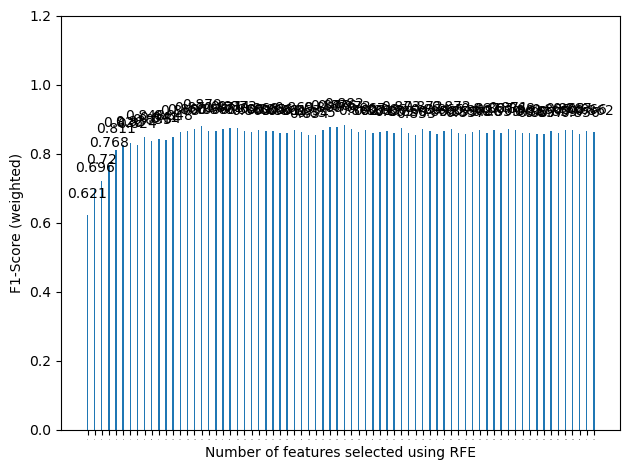

In [177]:
fig, ax = plt.subplots()

a = np.arange(1, 73)
b = rfe_f1_score_list

ax.bar(a, b, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 73))
ax.set_xticklabels(np.arange(1, 73), fontsize=1)

for i, v in enumerate(b):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [162]:
RFE_selector = RFE(estimator=model_1, n_features_to_select=21, step=10)
RFE_selector.fit(X_train, y_train)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train.columns[selected_features_mask]
selected_features

Index(['cap-diameter', 'cap-surface', 'cap-color', 'gill-color', 'stem-height',
       'stem-width', 'cap-shape_b', 'cap-shape_c', 'gill-attachment_a',
       'gill-attachment_d', 'gill-attachment_p', 'gill-spacing_c',
       'gill-spacing_d', 'stem-root_b', 'stem-surface_g', 'stem-surface_s',
       'stem-color_n', 'stem-color_w', 'veil-color_noise', 'ring-type_z',
       'season_w'],
      dtype='object')

In [191]:
X_7 = X[['cap-diameter', 'cap-surface', 'cap-color', 'gill-color', 'stem-height',
       'stem-width', 'cap-shape_b', 'cap-shape_c', 'gill-attachment_a',
       'gill-attachment_d', 'gill-attachment_p', 'gill-spacing_c',
       'gill-spacing_d', 'stem-root_b', 'stem-surface_g', 'stem-surface_s',
       'stem-color_n', 'stem-color_w', 'veil-color_noise', 'ring-type_z',
       'season_w']].copy()
X_7

cap-diameter  cap-surface  cap-color  gill-color  stem-height  \
0         0.679901     0.272727   0.454545    1.000000     0.631734   
1         0.793761     0.090909   1.000000    0.916667     0.718577   
2         0.148016     0.272727   0.454545    0.416667     0.352348   
3         0.490109     0.363636   0.545455    1.000000     0.597973   
4         0.726711     0.818182   0.181818    0.916667     0.838190   
...            ...          ...        ...         ...          ...   
9995      0.512713     0.818182   0.454545    1.000000     0.463900   
9996      0.437997     0.090909   1.000000    0.666667     0.598764   
9997      0.427534     0.818182   0.454545    0.416667     0.390484   
9998      0.518160     0.818182   0.454545    1.000000     0.460856   
9999      0.461537     0.818182   0.454545    0.166667     0.450586   

      stem-width  cap-shape_b  cap-shape_c  gill-attachment_a  \
0       0.707071          0.0          0.0                0.0   
1       0.786448          0.0          0.0                0.0   
2       0.140070          1.0          0.0                1.0   
3       0.450844          1.0          0.0                0.0   
4       0.584008          0.0          0.0                0.0   
...          ...          ...          ...                ...   
9995    0.477290          0.0          0.0                0.0   
9996    0.547529          0.0          1.0                0.0   
9997    0.322130          0.0          0.0                1.0   
9998    0.497329          0.0          0.0                0.0   
9999    0.671341          0.0          0.0                0.0   

      gill-attachment_d  gill-attachment_p  gill-spacing_c  gill-spacing_d  \
0                   0.0                1.0             1.0             0.0   
1                   0.0                0.0             1.0             0.0   
2                   0.0                0.0             1.0             0.0   
3                   0.0                0.0             1.0             0.0   
4                   0.0                0.0             1.0             0.0   
...                 ...                ...             ...             ...   
9995                1.0                0.0             1.0             0.0   
9996                0.0                0.0             1.0             0.0   
9997                0.0                0.0             0.0             1.0   
9998                1.0                0.0             1.0             0.0   
9999                0.0                0.0             0.0             0.0   

      stem-root_b  stem-surface_g  stem-surface_s  stem-color_n  stem-color_w  \
0             1.0             0.0             1.0           1.0           0.0   
1             1.0             0.0             1.0           0.0           1.0   
2             1.0             0.0             0.0           1.0           0.0   
3             1.0             0.0             1.0           0.0           0.0   
4             1.0             0.0             1.0           0.0           1.0   
...           ...             ...             ...           ...           ...   
9995          1.0             0.0             1.0           1.0           0.0   
9996          1.0             0.0             1.0           0.0           1.0   
9997          1.0             0.0             0.0           0.0           1.0   
9998          1.0             0.0             1.0           1.0           0.0   
9999          1.0             0.0             1.0           1.0           0.0   

      veil-color_noise  ring-type_z  season_w  
0                  0.0          0.0       0.0  
1                  0.0          0.0       0.0  
2                  0.0          0.0       0.0  
3                  0.0          0.0       0.0  
4                  0.0          0.0       0.0  
...                ...          ...       ...  
9995               0.0          0.0       1.0  
9996               0.0          0.0       0.0  
9997               0.0        

In [192]:
X_7.shape

(10000, 21)

In [193]:
X_train_4, X_valid_4, y_train_4, y_valid_4 = train_test_split(X_7,y, test_size = 0.2, random_state=42)

In [194]:
model_1.fit(X_train_4 ,y_train_4)
 
calculating_metrics(model_1, X_train_4, y_train_4, X_valid_4, y_valid)

TP   FP   FN    TN     AUC    GINI  accuracy  precission  recall  \
TRAIN  3774  276  613  3337  0.9584  0.9169    0.8889      0.9236  0.8448   
VAL     865   85  168   882  0.9476  0.8953    0.8735      0.9121  0.8400   

           f1  
TRAIN  0.8825  
VAL    0.8746

In [ ]:
RFE(21)
           TP	FP	  FN	  TN	   AUC	   GINI	   accuracy	  precission	recall	    f1
TRAIN	3779	271	  765	3185	0.9568	 0.9137	     0.8705	      0.9216	0.8063	0.8601
VAL	     868	82	  199	851  	0.9488	 0.8975	     0.8595	      0.9121	0.8105	0.8583

In [ ]:
Boruta(60)
          TP	FP	 FN	     TN	       AUC	   GINI	   accuracy	   precission	recall	    f1
TRAIN	3779	271	753	   3197	    0.9574	 0.9149	     0.8720	       0.9219	0.8094	0.8620
VAL	     869	81	196	    854	    0.9490	 0.8980	     0.8615	       0.9134	0.8133	0.8605


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B8.Recursive Feature Elimination with Cross Validation</p>

In [209]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=42)

In [210]:
from sklearn.feature_selection import RFECV
 
rfecv = RFECV(rf, cv=2)
rfecv.fit(X_train, y_train)
 
df_rfecv = pd.concat([pd.DataFrame(X_train.columns, columns=['feat']),
                    pd.DataFrame(rfecv.ranking_, columns=['rank'])
                   ], axis=1).sort_values(by='rank')
 
df_rfecv

feat  rank
0           cap-diameter     1
16             ring-type     1
14            veil-color     1
12            stem-color     1
11          stem-surface     1
10             stem-root     1
8            stem-height     1
9             stem-width     1
6           gill-spacing     1
5        gill-attachment     1
3              cap-color     1
2            cap-surface     1
1              cap-shape     1
7             gill-color     1
19                season     2
18               habitat     3
15              has-ring     4
17     spore-print-color     5
13             veil-type     6
4   does-bruise-or-bleed     7

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B9.K-best features</p>

In [152]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=42)

In [153]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# Oszacowanie ile parametrów najlepiej

In [170]:
from sklearn.metrics import f1_score

f1_score_list = []

for k in range(1, 19):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train, y_train)
    
    sel_X_train = selector.transform(X_train)
    sel_X_test = selector.transform(X_valid)
    
    model_1.fit(sel_X_train, y_train)
    kbest_preds = model_1.predict(sel_X_test)
    
    f1_score_kbest = round(f1_score(y_valid, kbest_preds, average='weighted'), 3)
    
    f1_score_list.append(f1_score_kbest)

In [171]:
b = f1_score_list
b

[0.606,
 0.674,
 0.729,
 0.743,
 0.759,
 0.799,
 0.816,
 0.855,
 0.872,
 0.849,
 0.85,
 0.83,
 0.848,
 0.839,
 0.826,
 0.843,
 0.841,
 0.839]

In [173]:
plt.rcParams["figure.figsize"] = (12,9)

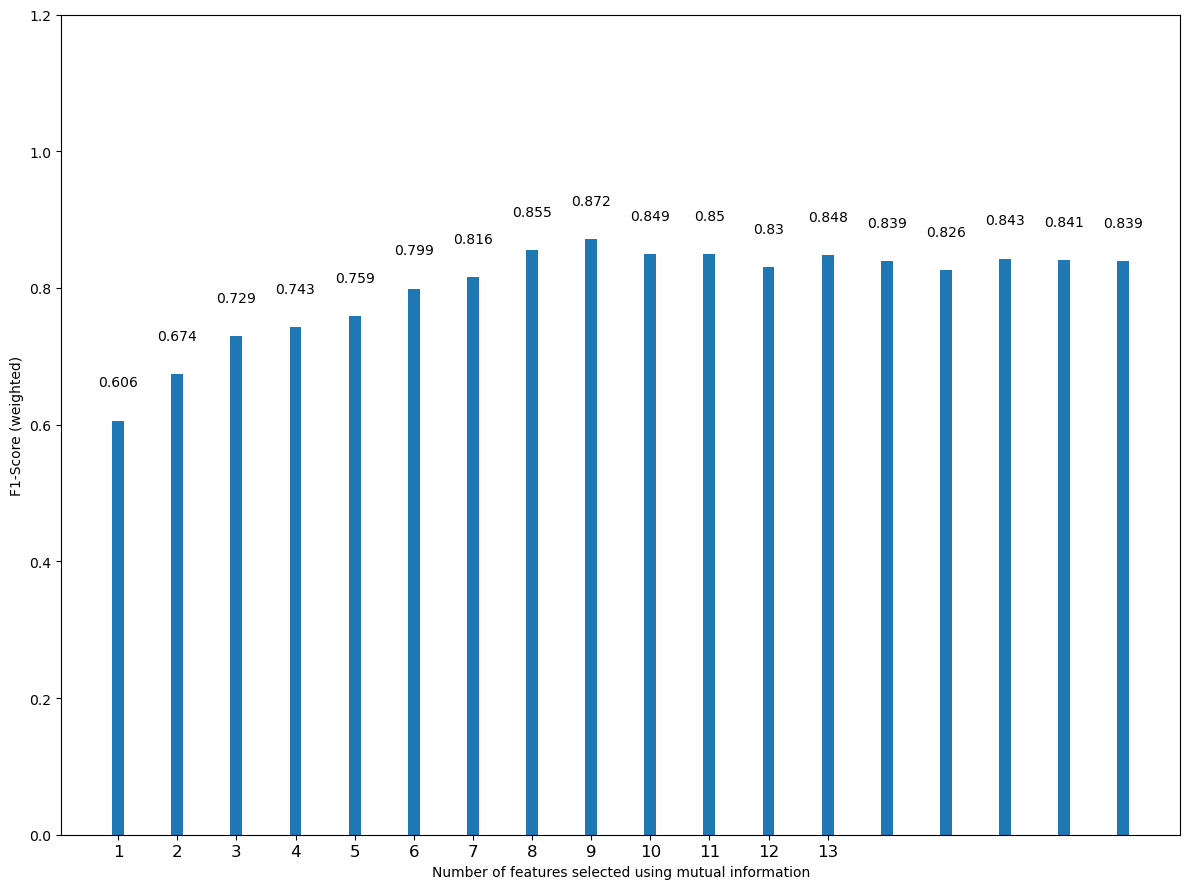

In [174]:
fig, ax = plt.subplots()

a = np.arange(1, 19)
b = f1_score_list

ax.bar(a, b, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 14))
ax.set_xticklabels(np.arange(1, 14), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [ ]:
# Oszacowanie które  parametry najlepsze dla wskazanej liczby

In [175]:
selector = SelectKBest(mutual_info_classif, k=9)
selector.fit(X_train, y_train)

SelectKBest(k=9,
            score_func=<function mutual_info_classif at 0x000001E7876BC220>)

In [176]:
Mutual_info_10 = [feat for feat in list(selector.get_support()*X_valid.columns) if feat !='']
Mutual_info_10

['cap-diameter',
 'cap-surface',
 'cap-color',
 'gill-attachment',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-color',
 'veil-color']

In [180]:
selector = SelectKBest(mutual_info_classif, k=3)
selector.fit(X_train, y_train)

selected_feature_mask = selector.get_support()
selected_features = X_train.columns[selected_feature_mask]
selected_features

Index(['cap-surface', 'stem-height', 'stem-width'], dtype='object')

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B10.Boruta</p>

In [178]:
X_train_10, X_test_10, y_train_10, y_test_10 = X_train.copy(), X_valid.copy(), y_train.copy(), y_valid.copy()

In [267]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_t,y, test_size = 0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 19]

In [271]:
# pip install Boruta

  Obtaining dependency information for Boruta from https://files.pythonhosted.org/packages/30/de/37bb80bba7fb7baa703b78fab37487b21b43fe4bb5d5a1ab09ecab9b76c6/Boruta-0.4.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/57.9 kB ? eta -:--:--
   ------- -------------------------------- 10.2/57.9 kB ? eta -:--:--
   --------------------------- ----------- 41.0/57.9 kB 653.6 kB/s eta 0:00:01
   --------------------------------------- 57.9/57.9 kB 611.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [179]:
from boruta import BorutaPy

boruta_selector = BorutaPy(model_1, random_state=42)
boruta_selector.fit(np.array(X_train_10), np.array(y_train_10))

sel_X_train_10 = boruta_selector.transform(np.array(X_train_10))
sel_X_test_10 = boruta_selector.transform(np.array(X_test_10))

model_1.fit(sel_X_train_10, y_train_10)

boruta_preds = model_1.predict(sel_X_test_10)

boruta_f1_score = round(f1_score(y_test_10, boruta_preds, average='weighted'), 3)

In [180]:
selected_features_mask = boruta_selector.support_

selected_features = X_train_10.columns[selected_features_mask]
selected_features

Index(['cap-diameter', 'cap-surface', 'cap-color', 'gill-color', 'stem-height',
       'stem-width', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x',
       'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e',
       'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s',
       'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d',
       'gill-spacing_f', 'stem-root_b', 'stem-root_noise', 'stem-root_r',
       'stem-root_s', 'stem-surface_g', 'stem-surface_i', 'stem-surface_k',
       'stem-surface_noise', 'stem-surface_s', 'stem-surface_t',
       'stem-surface_y', 'stem-color_e', 'stem-color_g', 'stem-color_n',
       'stem-color_p', 'stem-color_w', 'stem-color_y', 'veil-color_noise',
       'veil-color_w', 'veil-color_y', 'ring-type_e', 'ring-type_f',
       'ring-type_l', 'ring-type_p', 'ring-type_r', 'ring-type_z',
       'spore-print-color_k', 'spore-print-color_p', 'spore-print-color_w',
       '

In [181]:
len(selected_features)

60

In [195]:
X_10 = X[['cap-diameter', 'cap-surface', 'cap-color', 'gill-color', 'stem-height',
       'stem-width', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x',
       'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e',
       'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s',
       'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d',
       'gill-spacing_f', 'stem-root_b', 'stem-root_noise', 'stem-root_r',
       'stem-root_s', 'stem-surface_g', 'stem-surface_i', 'stem-surface_k',
       'stem-surface_noise', 'stem-surface_s', 'stem-surface_t',
       'stem-surface_y', 'stem-color_e', 'stem-color_g', 'stem-color_n',
       'stem-color_p', 'stem-color_w', 'stem-color_y', 'veil-color_noise',
       'veil-color_w', 'veil-color_y', 'ring-type_e', 'ring-type_f',
       'ring-type_l', 'ring-type_p', 'ring-type_r', 'ring-type_z',
       'spore-print-color_k', 'spore-print-color_p', 'spore-print-color_w',
       'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m', 'season_a',
       'season_s', 'season_u', 'season_w']].copy()
X_10

cap-diameter  cap-surface  cap-color  gill-color  stem-height  \
0         0.679901     0.272727   0.454545    1.000000     0.631734   
1         0.793761     0.090909   1.000000    0.916667     0.718577   
2         0.148016     0.272727   0.454545    0.416667     0.352348   
3         0.490109     0.363636   0.545455    1.000000     0.597973   
4         0.726711     0.818182   0.181818    0.916667     0.838190   
...            ...          ...        ...         ...          ...   
9995      0.512713     0.818182   0.454545    1.000000     0.463900   
9996      0.437997     0.090909   1.000000    0.666667     0.598764   
9997      0.427534     0.818182   0.454545    0.416667     0.390484   
9998      0.518160     0.818182   0.454545    1.000000     0.460856   
9999      0.461537     0.818182   0.454545    0.166667     0.450586   

      stem-width  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_o  \
0       0.707071          0.0          0.0          0.0          0.0   
1       0.786448          0.0          0.0          0.0          0.0   
2       0.140070          1.0          0.0          0.0          0.0   
3       0.450844          1.0          0.0          0.0          0.0   
4       0.584008          0.0          0.0          0.0          0.0   
...          ...          ...          ...          ...          ...   
9995    0.477290          0.0          0.0          1.0          0.0   
9996    0.547529          0.0          1.0          0.0          0.0   
9997    0.322130          0.0          0.0          0.0          0.0   
9998    0.497329          0.0          0.0          1.0          0.0   
9999    0.671341          0.0          0.0          0.0          1.0   

      cap-shape_p  cap-shape_s  cap-shape_x  gill-attachment_a  \
0             0.0          0.0          1.0                0.0   
1             0.0          0.0          1.0                0.0   
2             0.0          0.0          0.0                1.0   
3             0.0          0.0          0.0                0.0   
4             0.0          0.0          1.0                0.0   
...           ...          ...          ...                ...   
9995          0.0          0.0          0.0                0.0   
9996          0.0          0.0          0.0                0.0   
9997          0.0          0.0          1.0                1.0   
9998          0.0          0.0          0.0                0.0   
9999          0.0          0.0          0.0                0.0   

      gill-attachment_d  gill-attachment_e  gill-attachment_f  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                1.0                0.0   
4                   0.0                1.0                0.0   
...                 ...                ...                ...   
9995                1.0                0.0                0.0   
9996                0.0                0.0                0.0   
9997                0.0                0.0                0.0   
9998                1.0                0.0                0.0   
9999                0.0                0.0                1.0   

      gill-attachment_p  gill-attachment_s  gill-attachment_x  gill-spacing_c  \
0                   1.0                0.0                0.0             1.0   
1                   0.0                0.0                1.0             1.0   
2                   0.0                0.0                0.0             1.0   
3                   0.0                0.0                0.0             1.0   
4                   0.0                0.0                0.0             1.0   
...                 ...                ...                ...             ...   
9995                0.0                0.0                0.0             1.0   
9996                0.0                0.0                1.0     

In [196]:
X_10.shape

(10000, 60)

In [197]:
X_train_5, X_valid_5, y_train_5, y_valid_5 = train_test_split(X_10,y, test_size = 0.2, random_state=42)

In [198]:
model_1.fit(X_train_5 ,y_train_5)
 
calculating_metrics(model_1, X_train_5, y_train_5, X_valid_5, y_valid_5)

TP   FP   FN    TN     AUC    GINI  accuracy  precission  recall  \
TRAIN  3779  271  753  3197  0.9574  0.9149    0.8720      0.9219  0.8094   
VAL     869   81  196   854  0.9490  0.8980    0.8615      0.9134  0.8133   

           f1  
TRAIN  0.8620  
VAL    0.8605

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C10.Imbalanced Data</p>

Oversampling - SMOTE

In [199]:
class_counts = train["class"].value_counts(normalize=True)
class_counts

class
e    0.5
p    0.5
Name: proportion, dtype: float64

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

<p style="background-color: #EDE7F6; color: black; display:inline-block;padding:.6rem;border-radius:.25rem;">Split Data (train/test)</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Model Training</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Model Validation</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Model Evaluation</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">D.Model Tuning</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">E. Conclusions</p>

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">III.MODEL DEPLOYMENT</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">Result Submission</p>